# Inspecting the Provided Omdena Insurance Claim Data

In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
import os


import requests
from bs4 import BeautifulSoup

import warnings 
warnings.filterwarnings('ignore')

# Formatting
pd.set_option("display.max_columns", None)

In [192]:
# Path reference to make import statements concise
path = '/Users/samalainabayeva/Documents/Omdena/Omdena-Phoenix Sample Data.csv'

# Read in the data
df = pd.read_csv(path, encoding="Latin-1")
df.head()

City of incident State of incident       Type of Injury Serious Injury  \
0  New Smyrna Beach                FL                  NaN            NaN   
1     Coral Springs                FL                  NaN            NaN   
2      Lehigh Acres                FL  Other Injury / Pain            NaN   
3         Belleview                FL  Other Injury / Pain            NaN   
4               NaN                FL                  NaN            NaN   

  Other injury  Age at time of Injury Did the airbags deploy?  \
0          NaN                    NaN                     NaN   
1          NaN                    NaN                     NaN   
2          NaN                    NaN                     Yes   
3          NaN                    NaN                     Yes   
4          NaN                    NaN                     NaN   

  What type of accident was it? Did the accident involve a truck or bus?  \
0                           NaN                                      NaN   
1                           NaN                                      NaN   
2                     Multi Car                                       No   
3                     Multi Car                                      Yes   
4                           NaN                                      NaN   

               Type of Truck Involve Uber/Taxi/Car Service?  \
0                        NaN                            NaN   
1                        NaN                            NaN   
2                        NaN                             No   
3  Semi-tractor with trailer                             No   
4                        NaN                            NaN   

  Potential TBI Issues State of Injury  Catastrophic? Called 911?  \
0                  NaN             NaN              0         NaN   
1                  NaN             NaN              0         NaN   
2                   No             NaN              0         Yes   
3                  NaN             NaN              0         Yes   
4                  NaN             NaN              0         NaN   

   Net Attorney Fee  Total Bills  Total Coverage Positive MRI Finding  \
0           1152.51          NaN             NaN                  NaN   
1           2499.25          NaN             NaN                  NaN   
2          16666.67     30603.62         50000.0                  Yes   
3           9833.33     24253.94       3000000.0                  Yes   
4            610.88          NaN             NaN                  NaN   

  Life Care Plan Status Ortho/Pain/Neuro Eval Surgery Completed  \
0                   NaN                   NaN               NaN   
1                   NaN                   NaN               NaN   
2                   Yes                   Yes               NaN   
3                    No                    No                No   
4                   NaN                   NaN               NaN   

  Surgery and/or Injections Recommended Similar Prior Injury  \
0                                   NaN                  NaN   
1                                   NaN                  NaN   
2                                    No                   No   
3                                    No                   No   
4                                   NaN                  NaN   

  Injections Completed No Treatment Reason  TBI Confirmed   AGE  
0                  NaN                 NaN              0  65.0  
1                  NaN                 NaN              0  39.0  
2                  NaN                 NaN              0  41.0  
3                   No           Pain free              0  54.0  
4                  NaN                 NaN              0  61.0

In [193]:
df.shape

(56289, 28)

In [194]:
# Inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56289 entries, 0 to 56288
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   City of incident                          43668 non-null  object 
 1   State of incident                         51948 non-null  object 
 2   Type of Injury                            35605 non-null  object 
 3   Serious Injury                            10513 non-null  object 
 4   Other injury                              6 non-null      object 
 5   Age at time of Injury                     62 non-null     float64
 6   Did the airbags deploy?                   23558 non-null  object 
 7   What type of accident was it?             24595 non-null  object 
 8   Did the accident involve a truck or bus?  24958 non-null  object 
 9   Type of Truck                             526 non-null    object 
 10  Involve Uber/Taxi/Car Service?    

In [195]:
df.columns == list(df)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

<hr style="border: 2px solid blue">

### Duplicates in the data

In [196]:
# Checking the type of duplicates present in the data, they seem to be double entries
df[df.duplicated(keep=False)].sort_values(by = ["City of incident", "Net Attorney Fee", "AGE"])

City of incident State of incident                Type of Injury  \
44945          Atlanta                GA           Other Injury / Pain   
49703          Atlanta                GA           Other Injury / Pain   
6829           Atlanta                GA           Other Injury / Pain   
37650          Atlanta                GA           Other Injury / Pain   
2651     Bowling Green                KY  Tendon/Ligament Tear/Rupture   
...                ...               ...                           ...   
54199              NaN               NaN                           NaN   
1280               NaN               NaN                           NaN   
26275              NaN               NaN                           NaN   
24158              NaN               NaN                           NaN   
27386              NaN               NaN                           NaN   

      Serious Injury Other injury  Age at time of Injury  \
44945             No          NaN                    NaN   
49703             No          NaN                    NaN   
6829              No          NaN                    NaN   
37650             No          NaN                    NaN   
2651              No          NaN                    NaN   
...              ...          ...                    ...   
54199            NaN          NaN                    NaN   
1280             NaN          NaN                    NaN   
26275            NaN          NaN                    NaN   
24158            NaN          NaN                    NaN   
27386            NaN          NaN                    NaN   

      Did the airbags deploy? What type of accident was it?  \
44945                     NaN                           NaN   
49703                     NaN                           NaN   
6829                      NaN                           NaN   
37650                     NaN                           NaN   
2651                      NaN                           NaN   
...                       ...                           ...   
54199                     NaN                           NaN   
1280                      NaN                           NaN   
26275                     NaN                           NaN   
24158                     NaN                           NaN   
27386                     NaN                           NaN   

      Did the accident involve a truck or bus? Type of Truck  \
44945                                      NaN           NaN   
49703                                      NaN           NaN   
6829                                       NaN           NaN   
37650                                      NaN           NaN   
2651                                       NaN           NaN   
...                                        ...           ...   
54199                                      NaN           NaN   
1280                                       NaN           NaN   
26275                                      NaN           NaN   
24158                                      NaN           NaN   
27386                                      NaN           NaN   

      Involve Uber/Taxi/Car Service? Potential TBI Issues State of Injury  \
44945                            NaN                  NaN              GA   
49703                            NaN                  NaN              GA   
6829                             NaN                  NaN              GA   
37650                            NaN                  NaN              GA   
2651                             NaN                  NaN              KY   
...                              ...                  ...             ...   
54199                            NaN                  NaN             NaN   
1280                             NaN                  NaN             NaN   
26275                            NaN                  NaN             NaN   
24158                            NaN                  NaN             NaN   
27386                  

In [197]:
# Dropping the duplicate 1651 values
df = df.drop_duplicates()

In [198]:
# Inspecting the shape of the data after dropping the duplicates
df.shape

(55220, 28)

# Removing Rows w/o Target

In [199]:
# 27840 rows do not contain the target value, making them irrelevant
print("Nulls in the target columns:", df["Total Coverage"].isna().sum())
print()

# All nulls -> the data is rife with missing values
df.isna().sum()

Nulls in the target columns: 27840



City of incident                            11721
State of incident                            3912
Type of Injury                              19685
Serious Injury                              44758
Other injury                                55214
Age at time of Injury                       55158
Did the airbags deploy?                     31678
What type of accident was it?               30642
Did the accident involve a truck or bus?    30279
Type of Truck                               54694
Involve Uber/Taxi/Car Service?              31158
Potential TBI Issues                        36720
State of Injury                             47623
Catastrophic?                                   0
Called 911?                                 29815
Net Attorney Fee                                4
Total Bills                                 23590
Total Coverage                              27840
Positive MRI Finding                        30784
Life Care Plan Status                       41993


In [200]:
# Removing Rows without Target Values
df = df.dropna(subset=["Total Coverage"])

In [201]:
# 55220 - 27840 null target values
df.shape

(27380, 28)

In [202]:
# The data is still filled with holes
df.isna().sum()

City of incident                              325
State of incident                             626
Type of Injury                               1196
Serious Injury                              22749
Other injury                                27380
Age at time of Injury                       27351
Did the airbags deploy?                      4725
What type of accident was it?                3749
Did the accident involve a truck or bus?     3439
Type of Truck                               26899
Involve Uber/Taxi/Car Service?               4190
Potential TBI Issues                         9509
State of Injury                             27082
Catastrophic?                                   0
Called 911?                                  3113
Net Attorney Fee                                0
Total Bills                                   456
Total Coverage                                  0
Positive MRI Finding                         3897
Life Care Plan Status                       14760


### Serious Data Imbalance - 70.37 % of all values are from Florida, only 23 States Represented

In [203]:
# Cleaning the State Data based on State of incident, which had fewer nulls than State of Injury
df["State"] = df["State of incident"].str.upper()

# Aligning Formats to 2-Letter Postal Abbreviations
df["State"] = df["State"].replace({"FLORIDA":"FL", 
                         "KENTUCKY":"KY",
                         "GEORGIA":"GA",
                         "ALABAMA":"AL"})

In [204]:
# Proportion of Top Ten States in the Data (Heavily Imbalanced)
df["State"].value_counts(normalize=True)[:10]

State
FL    0.703708
GA    0.127757
TN    0.066869
KY    0.053637
MS    0.031061
AL    0.004934
IN    0.004448
AR    0.003177
PA    0.002616
SC    0.000449
Name: proportion, dtype: float64

<hr style="border:2px solid blue">

### String Similarity Scores, Consolidation of Columns

In [205]:
from fuzzywuzzy import fuzz, process

In [209]:
df["Type of Injury"].nunique()

780

In [207]:
# Recommend Filling Missing Values with "Missing"
df["Type of Injury"] = df["Type of Injury"].fillna("Missing")

In [210]:
df["Type of Injury"].nunique()

780

# BIG SCRIPT (attn Aadarsh)

In [214]:
### Script for Binning Type of Injury Column

# First consolidation - the backslash is not separated from 'Other Injury' with a space
df.loc[df["Type of Injury"] == "Other Injury/ Pain", "Type of Injury"] = "Other Injury / Pain"

# General Traumatic Brain Injury consolidation
df.loc[df["Type of Injury"] == "Other Injury / Pain; Traumatic Brain Injury.", "Type of Injury"] \
= "Other Injury / Pain; Traumatic Brain Injury"

# Removing LOC ("Loss of Consciousness") from the category's granularity
df.loc[df["Type of Injury"] == "Other Injury / Pain; Traumatic Brain Injury - w/LOC", "Type of Injury"] \
= "Other Injury / Pain; Traumatic Brain Injury"

# Handling Excessive spaces between words
df.loc[df["Type of Injury"] == "Other Injury / Pain; Traumatic  Brain  Injury", "Type of Injury"] \
= "Other Injury / Pain; Traumatic Brain Injury"

# Another Different Entry with Redundant Information
df.loc[df["Type of Injury"] == "Other Injury / Pain; Traumatic Brain Injury - w/LOC; Traumatic  Brain  Injury", "Type of Injury"]\
= "Other Injury / Pain; Traumatic Brain Injury"

# Same
df.loc[df["Type of Injury"] == "Other Injury / Pain; Traumatic Brain Injury - w/LOC; Traumatic Brain Injury.", "Type of Injury"]\
= "Other Injury / Pain; Traumatic Brain Injury"

# Same
df.loc[df["Type of Injury"] == "Other Injury / Pain; Traumatic  Brain  Injury; Traumatic  Brain  Injury", "Type of Injury"] \
= "Other Injury / Pain; Traumatic Brain Injury"


# ---- Handling Fatal Cases ----

# 124 Distinct Injuries resulting in Death

# Consolidate entries containing "Death" and "Traumatic Brain Injury"
df.loc[df["Type of Injury"].str.contains("(?=.*Death)(?=.*Traumatic Brain Injury)"), "Type of Injury"] = "Death; Traumatic Brain Injury"

# -------- Broken Bones -------
df.loc[df["Type of Injury"].str.contains("Traumatic Brain Injury.*Broken Bones"), "Type of Injury"]\
= "Other Injury / Pain; Traumatic Brain Injury; Broken Bones"

df.loc[df["Type of Injury"].str.contains("Other Injury.*Broken Bones"), "Type of Injury"]\
= "Other Injury / Pain; Traumatic Brain Injury; Broken Bones"

# ------- Ruptured Discs -> regular expressions for the "Other Pain" and "Traumatic Brain Injury" as superseding categories
df.loc[df["Type of Injury"].str.contains("(?=Other Injury / Pain)(?=.*Herniated/Bulging/Ruptured Disc)(?=.*Traumatic Brain Injury)"),\
"Type of Injury"] = "Other Injury / Pain; Traumatic Brain Injury; Herniated/Bulging/Ruptured Disc"

# ------ Ruptured Discs -> regular expressions for the "Other Pain" and "Traumatic Brain Injury" as superseding categories
df.loc[df["Type of Injury"].str.contains("(?=Other Injury / Pain)(?=.*Herniated/Bulging/Ruptured Disc)"),\
"Type of Injury"] = "Other Injury / Pain; Herniated/Bulging/Ruptured Disc"

# Capturing the last remaining values
df.loc[df["Type of Injury"].str.contains("Herniated/Bulging/Ruptured Disc"), "Type of Injury"]\
= "Other Injury / Pain; Herniated/Bulging/Ruptured Disc"

##### AT THIS POINT: Remaining un-consolidated values all represent less than 1% of total values #########

# -------- Tendon/Ligament -> Consolidating into the larger bin
df.loc[df["Type of Injury"] == "Tendon/Ligament Tear/Rupture", "Type of Injury"] = "Other Injury / Pain; Tendon/Ligament Tear/Rupture"

# ------------PTSD etc using the larger bin in existence
df.loc[df["Type of Injury"] == "Other Injury / Pain; Traumatic Brain Injury - w/LOC; Anxiety,PTSD,Depression,Stress", "Type of Injury"]\
= "Other Injury / Pain; Traumatic  Brain  Injury; Anxiety,PTSD,Depression,Stress"

df.loc[df["Type of Injury"] == "Other Injury / Pain; Traumatic Brain Injury.; Anxiety,PTSD,Depression,Stress", "Type of Injury"]\
= "Other Injury / Pain; Traumatic  Brain  Injury; Anxiety,PTSD,Depression,Stress"

# After these bins have been created, the top 20 Values account for 96.2% of all rows in the data.

# Binning all values not found in the top 20
exclusion_list = df["Type of Injury"].value_counts(normalize =True)[:20].index

# '~' accesses the complement - "Not In" the exclusion list
df.loc[~df["Type of Injury"].isin(exclusion_list), "Type of Injury"] = "Other Injury"

# 21 Bins of Values left, and the final bin contains roughly 3.8 % of all entries

In [215]:
df["Type of Injury"].nunique()

21

In [213]:
df["Type of Injury"].value_counts(normalize =True)

Type of Injury
Other Injury / Pain                                                                       0.665888
Other Injury / Pain; Traumatic Brain Injury                                               0.096457
Other Injury / Pain; Traumatic Brain Injury; Broken Bones                                 0.058108
Missing                                                                                   0.043682
Other Injury / Pain; Herniated/Bulging/Ruptured Disc                                      0.029985
                                                                                            ...   
Amputation/Loss of Limb; Permanent Scarring                                               0.000037
I was not hurt; Other Injury/ Pain                                                        0.000037
Blindness; Other Injury / Pain; Vision Impairment                                         0.000037
Other Injury / Pain; Concussion; Head trauma; Brief Loss of Consciousness; Memory loss    0.00

In [190]:
df["Type of Injury"].value_counts(normalize =True)

Type of Injury
Other Injury / Pain                                                              0.665888
Other Injury / Pain; Traumatic Brain Injury                                      0.096457
Other Injury / Pain; Traumatic Brain Injury; Broken Bones                        0.058108
Missing                                                                          0.043682
Other Injury                                                                     0.037765
Other Injury / Pain; Herniated/Bulging/Ruptured Disc                             0.029985
Other Injury / Pain; Anxiety,PTSD,Depression,Stress                              0.017750
Other Injury / Pain; Tendon/Ligament Tear/Rupture                                0.012016
Broken Bones - minor body part                                                   0.008108
Broken Bones - major body part                                                   0.006720
Other Injury / Pain; Traumatic  Brain  Injury; Anxiety,PTSD,Depression,Stress    0.00

SyntaxError: incomplete input (110426542.py, line 1)

### How Many Kinds of Traumatic Brain Injuries do We Need to Include?
I see "Broken Bones" as the next largest subcategory based on the value_counts() with 357 Entries

In [175]:
# Top 20 Values Account for 96% of the Data
exclusion list = df["Type of Injury"].value_counts(normalize =True)[:20].index

Index(['Other Injury / Pain', 'Other Injury / Pain; Traumatic Brain Injury',
       'Other Injury / Pain; Traumatic Brain Injury; Broken Bones', 'Missing',
       'Other Injury / Pain; Herniated/Bulging/Ruptured Disc',
       'Other Injury / Pain; Anxiety,PTSD,Depression,Stress',
       'Other Injury / Pain; Tendon/Ligament Tear/Rupture',
       'Broken Bones - minor body part', 'Broken Bones - major body part',
       'Other Injury / Pain; Traumatic  Brain  Injury; Anxiety,PTSD,Depression,Stress',
       'Death', 'Other Injury / Pain; Brief Loss of Consciousness',
       'Other Injury / Pain; Head trauma',
       'Other Injury / Pain; Burns - 1st degree',
       'Other Injury / Pain; Permanent Scarring',
       'Other Injury / Pain; Concussion',
       'Other Injury / Pain; Vision Impairment',
       'Other Injury / Pain; Spinal Cord', 'Death; Traumatic Brain Injury',
       'Other Injury / Pain; Brain/Major Organ damage'],
      dtype='object', name='Type of Injury')

In [155]:
df["Type of Injury"].nunique()

444

In [107]:
df.loc[df["Type of Injury"].str.contains("Traumatic Brain Injury.*Broken Bones"), "Type of Injury"]

(357,)

In [113]:
valid_entries = ["Other Injury / Pain; Traumatic Brain Injury", "Other Injury / Pain; Traumatic Brain Injury; Broken Bones"]
unique_entries = df["Type of Injury"].unique()

In [173]:
process.extract('Other Injury / Pain; Traumatic Brain Injury', unique_entries, limit=len(unique_entries))[:20]

[('Other Injury / Pain; Traumatic Brain Injury.', 100),
 ('Other Injury / Pain; Traumatic Brain Injury', 100),
 ('Other Injury / Pain; Traumatic  Brain  Injury', 98),
 ('Other Injury / Pain; Traumatic Brain Injury; Broken Bones', 95),
 ('Other Injury / Pain; Traumatic Brain Injury - w/LOC', 95),
 ('Other Injury / Pain; Vision Impairment; Traumatic Brain Injury.', 95),
 ('Other Injury / Pain; Vision Impairment; Traumatic  Brain  Injury', 95),
 ('Other Injury / Pain; Traumatic Brain Injury.; Depression', 95),
 ('Other Injury / Pain; Traumatic Brain Injury - w/LOC; Spinal Cord', 95),
 ('Other Injury / Pain; Permanent Scarring; Traumatic Brain Injury.', 95),
 ('Other Injury / Pain; Permanent Scarring; Traumatic Brain Injury', 95),
 ('Other Injury / Pain; Traumatic  Brain  Injury; Spinal Cord', 95),
 ('Other Injury / Pain; Traumatic Brain Injury - w/LOC; Anxiety', 95),
 ('Other Injury / Pain; Traumatic Brain Injury.; Spinal Cord', 95),
 ('Blindness; Other Injury / Pain; Traumatic Brain Inju

In [127]:
df["Type of Injury"].value_counts()[:20]

Type of Injury
Other Injury / Pain                                                              18232
Other Injury / Pain; Traumatic Brain Injury; Broken Bones                         1591
Missing                                                                           1196
Other Injury / Pain; Traumatic  Brain  Injury                                      871
Other Injury / Pain; Traumatic Brain Injury.                                       736
Other Injury / Pain; Herniated/Bulging/Ruptured Disc                               657
Other Injury / Pain; Traumatic Brain Injury - w/LOC                                634
Other Injury / Pain; Anxiety,PTSD,Depression,Stress                                486
Other Injury / Pain; Tendon/Ligament Tear/Rupture                                  237
Broken Bones - minor body part                                                     222
Broken Bones - major body part                                                     184
Other Injury / Pain; Traumat

In [31]:
process.extract("Other Injury / Pain", df.loc[df["Type of Injury"] != "Other Injury / Pain", "Type of Injury"], limit=10)

[('Other Injury / Pain; Anxiety', 95, 1894),
 ('Other Injury / Pain; Anxiety', 95, 3373),
 ('Other Injury / Pain; Anxiety', 95, 21759),
 ('Other Injury / Pain; Anxiety', 95, 22813),
 ('Other Injury / Pain; PTSD', 95, 24681),
 ('Other Injury / Pain; Anxiety', 95, 24753),
 ('Other Injury / Pain; Anxiety', 95, 26509),
 ('Other Injury / Pain; Anxiety', 95, 27679),
 ('Other Injury / Pain; Anxiety', 95, 27907),
 ('Other Injury / Pain; Anxiety', 95, 31088)]

(0.0, 0.05)

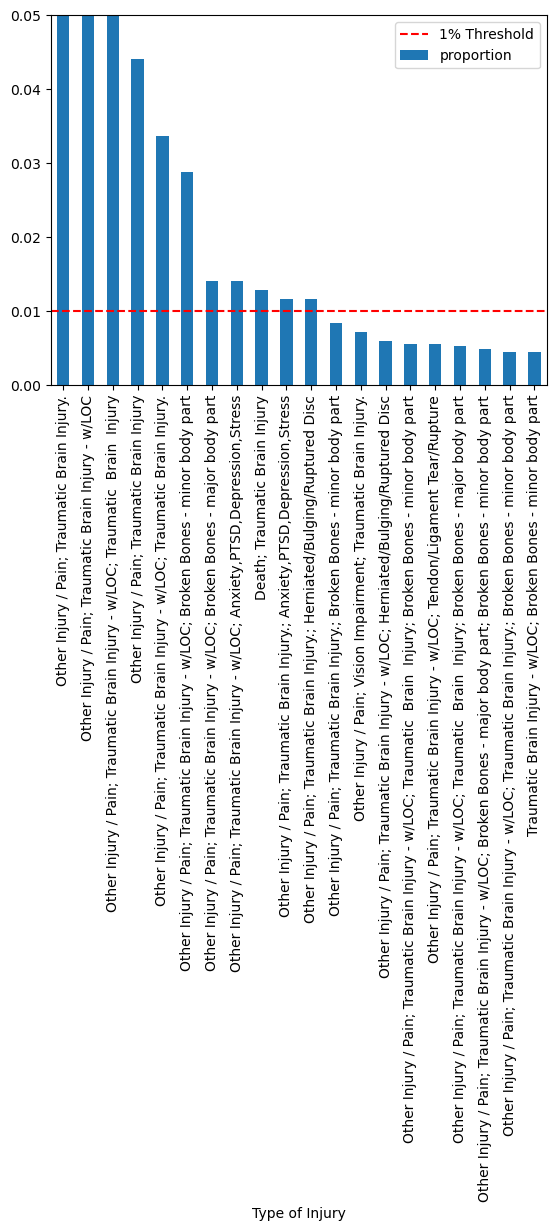

In [89]:
# 269 Unique Entries Contain "Traumatic Brain Injury"
df.loc[df["Type of Injury"].str.contains('Traumatic Brain Injury'), "Type of Injury"].value_counts(normalize=True)[:20].plot(kind="bar")
plt.axhline(.01, color="red", linestyle="--", label="1% Threshold")
plt.legend()
plt.ylim(0, .05)

In [87]:
# 124 Distinct Injuries resulting in Death
df.loc[df["Type of Injury"].str.contains("Death.*Traumatic Brain Injury"), "Type of Injury"] 
# = "Death; Traumatic Brain Injury"

2239     Death; Traumatic Brain Injury
2948     Death; Traumatic Brain Injury
8617     Death; Traumatic Brain Injury
9514     Death; Traumatic Brain Injury
10539    Death; Traumatic Brain Injury
12046    Death; Traumatic Brain Injury
15569    Death; Traumatic Brain Injury
17710    Death; Traumatic Brain Injury
19358    Death; Traumatic Brain Injury
20573    Death; Traumatic Brain Injury
23517    Death; Traumatic Brain Injury
25548    Death; Traumatic Brain Injury
27511    Death; Traumatic Brain Injury
28109    Death; Traumatic Brain Injury
28922    Death; Traumatic Brain Injury
29534    Death; Traumatic Brain Injury
33834    Death; Traumatic Brain Injury
33848    Death; Traumatic Brain Injury
34567    Death; Traumatic Brain Injury
35159    Death; Traumatic Brain Injury
35160    Death; Traumatic Brain Injury
36146    Death; Traumatic Brain Injury
37813    Death; Traumatic Brain Injury
39274    Death; Traumatic Brain Injury
42709    Death; Traumatic Brain Injury
43947    Death; Traumatic

In [80]:
# 124 Distinct Injuries resulting in Death
df.loc[df["Type of Injury"].str.contains("Traumatic Brain Injury.*Death"), "Type of Injury"] = "Death; Traumatic Brain Injury"

In [37]:
df["Type of Injury"].value_counts(dropna=False)[:20]

Type of Injury
Other Injury / Pain                                                                    18232
NaN                                                                                     1196
Other Injury / Pain; Traumatic  Brain  Injury                                            871
Other Injury / Pain; Traumatic Brain Injury.                                             736
Other Injury / Pain; Traumatic Brain Injury - w/LOC                                      634
Other Injury / Pain; Broken Bones - minor body part                                      600
Other Injury / Pain; Anxiety,PTSD,Depression,Stress                                      486
Other Injury / Pain; Herniated/Bulging/Ruptured Disc                                     475
Other Injury / Pain; Broken Bones - major body part                                      252
Other Injury / Pain; Tendon/Ligament Tear/Rupture                                        237
Broken Bones - minor body part                         

In [24]:
# 482 unique entries have only 1 occurrence
(df["Type of Injury"].value_counts()[df["Type of Injury"].value_counts() == 1]).shape

(482,)

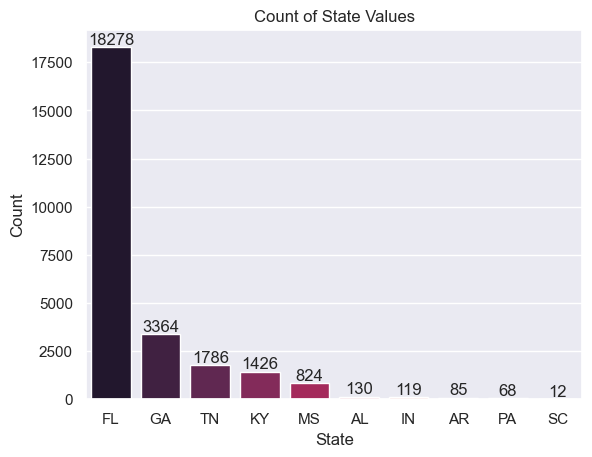

In [26]:
sns.set()
top_counts = 10
ax = None
col="State"
stat = 'count' #'percent', 'proportion', 'probability']
pal = sns.color_palette("rocket", n_colors=top_counts)
top_entries = df["State"].value_counts()[:top_counts].index
cp = sns.countplot(data=no_outliers[no_outliers["State"].isin(top_entries)], x=col, stat=stat, ax=ax, palette=pal, order=top_entries)
plt.title(f"{stat.title()} of {col.title()} Values")
plt.ylabel(f"{stat.title()}")
plt.xlabel(f"{col.title()}")


# ax.set_title(title, fontsize=16)
# ax.set_xlabel(xlabel)
# ax.set_ylabel(ylabel)
# if condition == True:
#     ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))
#     for bar in ax.containers:
#         ax.bar_label(bar, fmt='%.4f%%', labels=[f"{v * 100:.2f}%" for v in bar.datavalues])
# else:
if stat == "percent":
    for bar in cp.containers:
        cp.bar_label(bar, fmt='%.4f%%', labels=[f"{v:.2f}%" for v in bar.datavalues])
else:
    for bar in cp.containers:
        cp.bar_label(bar)
if ax is None:
    plt.show()
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center');

In [25]:
# Filtered DF for plotting functions
no_outliers = df[df["Total Coverage"] <= df["Total Coverage"].quantile(.975)].copy()

In [27]:

def plot_value_counts(df, col="State", top_counts=10, palette="rocket", title=None, xlabel=None, ylabel=None, stat="percent",\
                      figsize=(15,5), ax=None):
    """
    Function to plot the value counts of a categorical value either with or without titles and normalization

    Args
    -----------------
    df: DataFrame | pandas dataframe
    col: str |column_name from the specified dataframe
    top_counts: int | number of values to be included in the plot
    palette: sns.color_palette | default = "rocket", accepts any valid seaborn palette
    title: str | title of plot
    xlabel: str | label for the axis, usually the same as the column name (col)
    ylabel: str | label for the axis, typically either "Count" or "Percent"
    stat: string | "percent"/"count" if you want expressed as a Percentage of the Data, False if you want a raw count
    figsize: tuple | dimensions of the plot, (10, 5) by default
    
    Returns:
    -----------------
    matplotlib.Axes 
        countplot of a categorical variable's presence in the data either by "percent" or "count" stat-methods
    """

    pal = sns.color_palette(palette, n_colors=top_counts)
    top_entries = df[col].value_counts()[:top_counts].index
    if ax is None:
        plt.figure(figsize=figsize)
    cp = sns.countplot(data=df[df[col].isin(top_entries)], x=col, stat=stat, ax=ax, palette=pal, order=top_entries)
    cp.set_title(title, fontsize=16)
    cp.set_ylabel(ylabel)
    cp.set_xlabel(xlabel)
    
    if stat == "percent":
        for bar in cp.containers:
            cp.bar_label(bar, fmt='%.4f%%', labels=[f"{v:.2f}%" for v in bar.datavalues])
    else:
        for bar in cp.containers:
            cp.bar_label(bar)
    # ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
    
    if ax is None:
        plt.show();


def plot_boxenplots(df, top_entries=None, col="State", y="Total Coverage", \
                              legend=False, top_counts=10, ax=None, figsize=(16,12), palette="coolwarm_r"):
    """
    Args
    --------------
    df: pd.DataFrame
        data source 
    col: str
        name of a categorical column from the dataframe
    y: str
        target value, continuous numeric
    legend: bool
        whether to include a legend off to the right of the ax object
    top_counts: int
        number of "col" groups to include in plots
    top_entries: list
        list of string values to filter df and create the correct order of xticklabels
    ax: matplotlib.Axes
        default None, allows this function to be assigned to plt.subplots(n_rows/cols= >1....)
    figsize: tuple
        dimensions (length, height) of a plot
    palette: sns.palette 
        (coolwarm_r default), sets the color palette of the plot

    Returns
    ----------------
    matplotlib.Axes
        distribution plots in the boxenplot style to show distributions of a numeric variable aross groups
    """
    if ax is None:
        plt.figure(figsize=figsize)
    if top_entries is None:
        top_entries = df[col].value_counts()[:top_counts].index
    # Boxen Plot of Total Claim Amounts based on a Categorical Value
    g = sns.boxenplot(data = df[df[col].isin(top_entries)], x=col, y=y, hue=col, order=top_entries, palette=palette, \
                      legend=legend, showfliers=True, ax=ax)
    g.set(ylabel=f"{y.title()}", xlabel=f"{col.title()}", )
    g.set_title(f"{y.title()} Distributions by {col.title()} Groups", y=1, fontsize=16)
    if legend:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


def plot_point(df, col="State", y="Total Coverage", ax=None, figsize=(16,12), top_counts = 10, top_entries = None):
    """
    Args
    --------------
    df: pd.DataFrame
        dataframe used to generate the categorical analysis
    col:  string
        name of a column from the df argument
    y:  string
        target numeric value to analyze for each group in col
    ax: matplotlib Axes
        allows for this figure to be assigned to a specific row or column when calling plt.subplots(n_rows/cols= > 1...)
    figsize:  tuple
        dimensions of the ax object
    top_counts:  int
        number of groups to be included from col
    top_entries:  list
        name of the top "top_counts" values from col to use for formatting and filtering

    Returns
    ---------------
    matplotlib Axes plotting the pointplot of the specified col and y groups containing median and mean points with 95% ci's

    

    """
    if top_entries is None:
        top_entries = df[col].value_counts()[:top_counts].index
    if ax is None:
        plt.figure(figsize=figsize)
    _ = sns.pointplot(data=df[df[col].isin(top_entries)], x=col, y=y, estimator="median", \
                  errorbar="ci", linestyles="--", ax=ax, label="Median", alpha=.5, order=top_entries)
    
    _ = sns.pointplot(data=df[df[col].isin(top_entries)], x=col, y=y, estimator="mean", \
                  errorbar="ci", linestyles="--", ax=ax, label="Mean", alpha = .5, order=top_entries)
    _ = _.set_title(f"Median and Means of {y.title()} for {col.title()} Groups", fontsize=16)



# Categorical Plot of Total Claim Amounts based on the accident type
def plot_total_claim_by_group(df, col="State", y="Total Coverage", \
                              stat="count", legend=False, top_counts=10, axes=["count", "boxen", "point"], figsize=(16,12)):
    """
    This function builds off of plot_value_counts() to include an sns.catplot() of a given categorical feature to compare the distribution 
    of "Total Coverage" payouts. Due to the presence of outliers, I would recommend using the default df argument that excludes the
    largest 2.5% of values in the Total Coverage column

    Args
    ------------------
    df: pd.DataFrame 
        DataFrame source of distributions 
    col: str 
        name of the categorical column to compare group distributions
    y: str  
        default is "Total Coverage" but could be any continuous numeric value to plot its distribution
    stat: list
        ["count", "percent"], method of the countplot's presentation
    legend: bool
        determines whether a legend should be shown argument of the boxenplot creation
    top_counts: int
        number of groups to include from "col"
    axes: list
        ["count", "boxen", "point"] -> plots to be included in the figure
    figsize: tuple
        dimensions of the matplotlib.figure 

    Returns
    -----------------
    1 matplotlib.Figure and up to 3 different matplotlib.Axes, one with the quantitative counts of a categorical feature, 
    the other with the distributions of continuous numeric values grouped by unique categorical values in the feature column
    """
    
    fig, ax = plt.subplots(nrows=len(axes), figsize = figsize, gridspec_kw={"hspace":.4})
    # plt.subplots_adjust(hspace=0.)
    # Accessing the correct index values
    top_entries = df[col].value_counts()[:top_counts].index
    sns.set()
    # First function call
    if "count" in axes:
        plot_value_counts(df, col, top_counts=top_counts, stat=stat, xlabel=f"{col.title()}", \
                               title=f"Top-{top_counts} Counts of {col.title()}", ax=ax[axes.index("count")])
    
    
    # Boxen Plot of Total Claim Amounts based on a Categorical Value
    # Second Function Call
    if "boxen" in axes:
        plot_boxenplots(df=df, col=col, y=y, top_entries=top_entries, top_counts=top_counts, ax=ax[axes.index("boxen")])

    # 3rd Function Call
    if "point" in axes:
        plot_point(df=df, col=col, y=y, top_counts=top_counts, top_entries = top_entries, ax=ax[axes.index("point")])

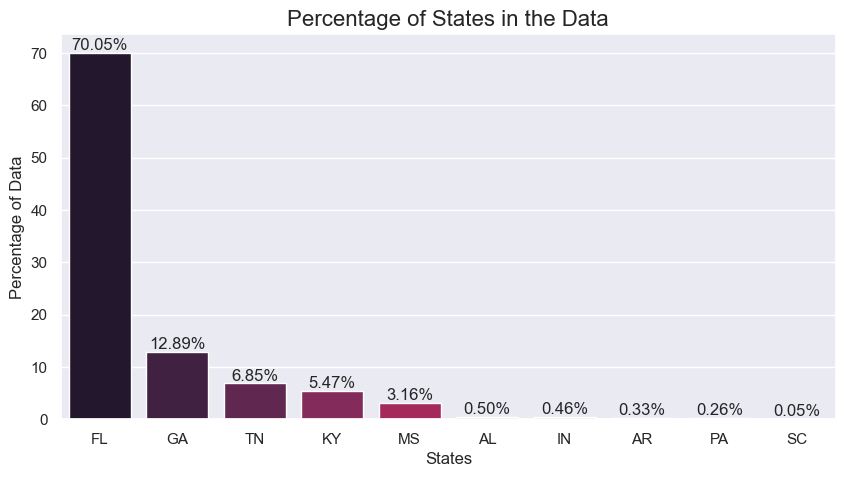

In [28]:
# Normalized Counts
plot_value_counts(df=no_outliers, col="State", title="Percentage of States in the Data", xlabel="States", \
                  ylabel="Percentage of Data", stat="percent", figsize=(10,5))

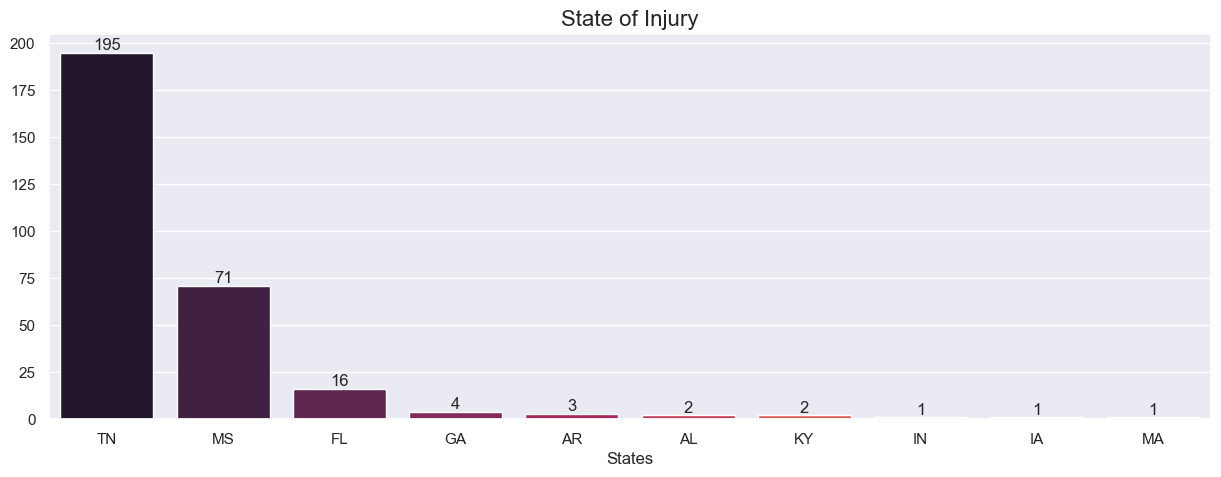

In [733]:
# Plotting the State of Injury without normalization column to illustrate the lack of valid values in the column 
plot_value_counts(df=no_outliers, col="State of Injury", stat="count", title="State of Injury", xlabel="States")

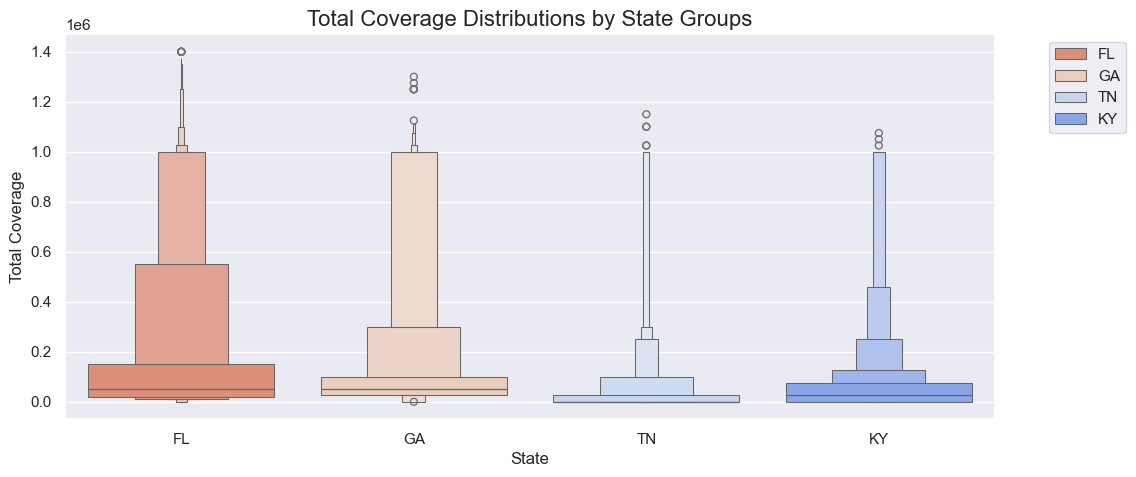

In [734]:
plot_boxenplots(df=no_outliers, figsize=(12,5), top_counts=4, legend=True)

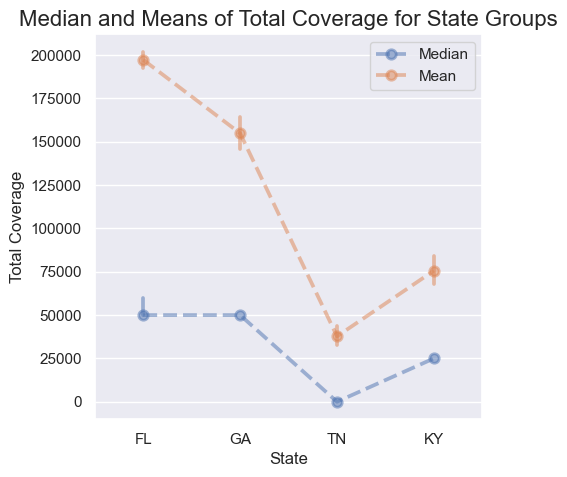

In [735]:
plot_point(df=no_outliers, figsize=(5,5), top_counts=4)

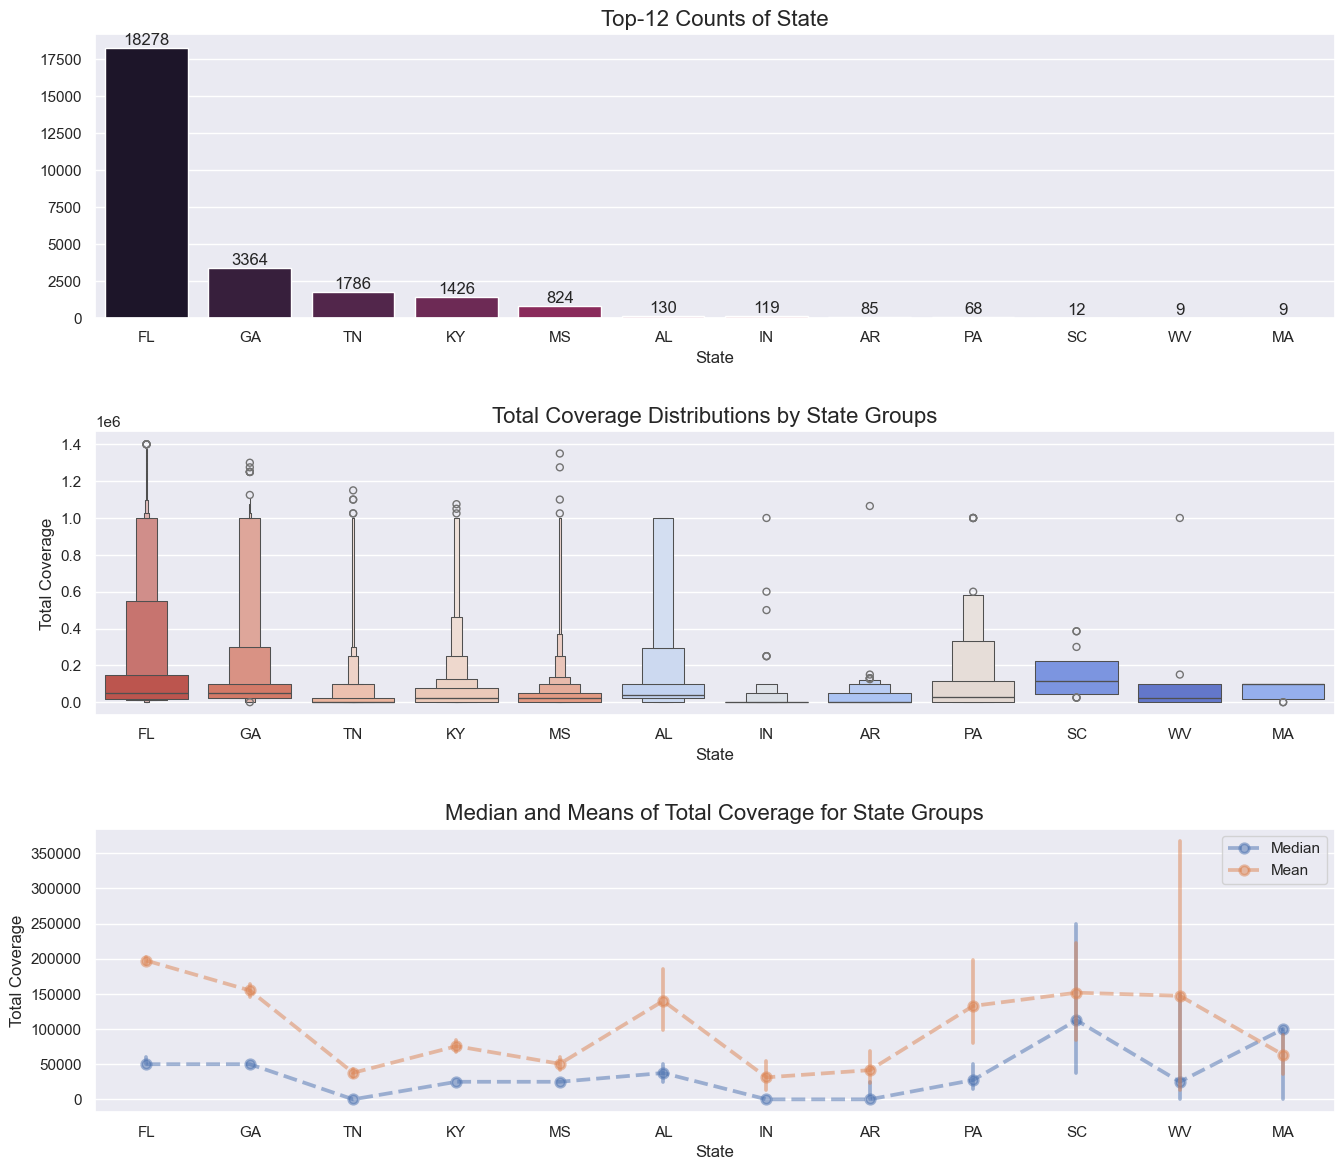

In [29]:
# Calling the combined function
plot_total_claim_by_group(df=no_outliers, col="State", y="Total Coverage", top_counts=12, figsize=(16,14));

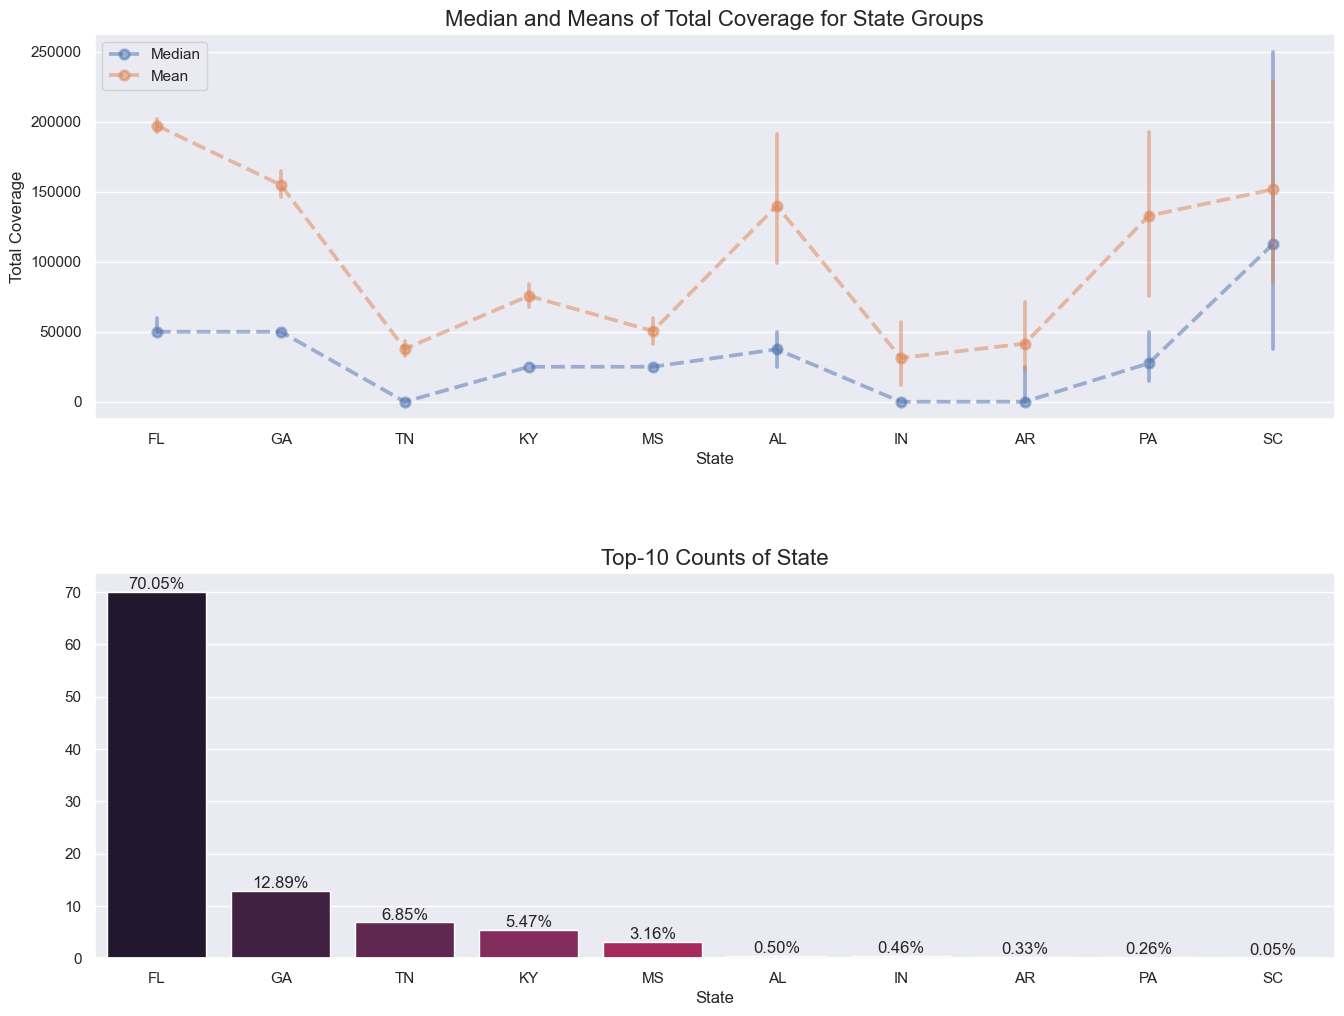

In [33]:
plot_total_claim_by_group(df=no_outliers, col="State", stat="percent", axes=["point", "count"], top_counts=10)

In [56]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
oe = OrdinalEncoder(unknown_value=-1 ,handle_unknown="use_encoded_value")


In [77]:
pd.DataFrame(oe.fit_transform(df[["Type of Injury"]]))[0].nunique()

779

In [80]:
df["Type of Injury"].value_counts().index.nunique()

779

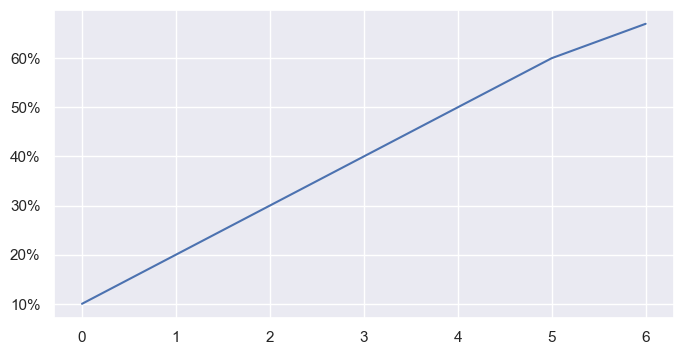

In [36]:
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(8,4))
xs = [0, 1, 2, 3, 4, 5, 6]
ys= [.1, .2, .3, .4, .5, .6, .67]
ax.plot(xs, ys)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

In [643]:
(df["State of Injury"] == df["State of incident"]).sum()

295

<hr style="border: 2px solid blue">

### Sometimes State of Injury and State of Incident are not the same

In [644]:
# There are only a select number of values in "State of Injury" that are not null
check = df[df["State of Injury"].notna()]

# Some of those not-null values do not align with the "State od incident" column, not sure what the meaning is
check[check["State of incident"] != check["State of Injury"]][["State of Injury", "State of incident"]]

State of Injury State of incident
13948              IA                TN
33038              TN                AR
35292              TN                GA

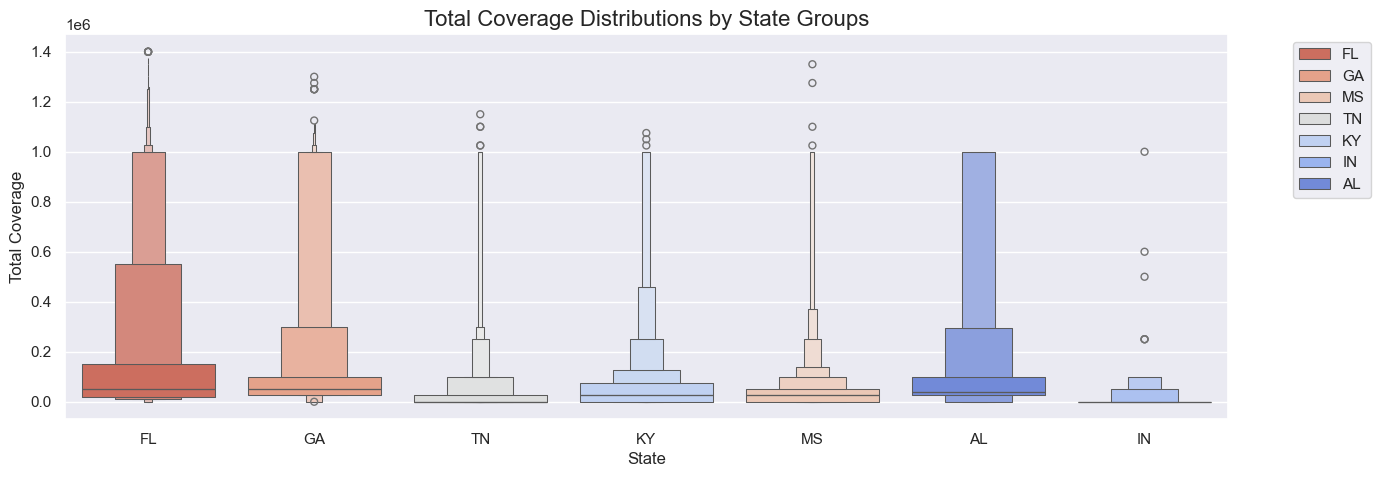

In [645]:
plot_boxenplots(df=no_outliers, legend=True, figsize=(15,5), top_counts=7)

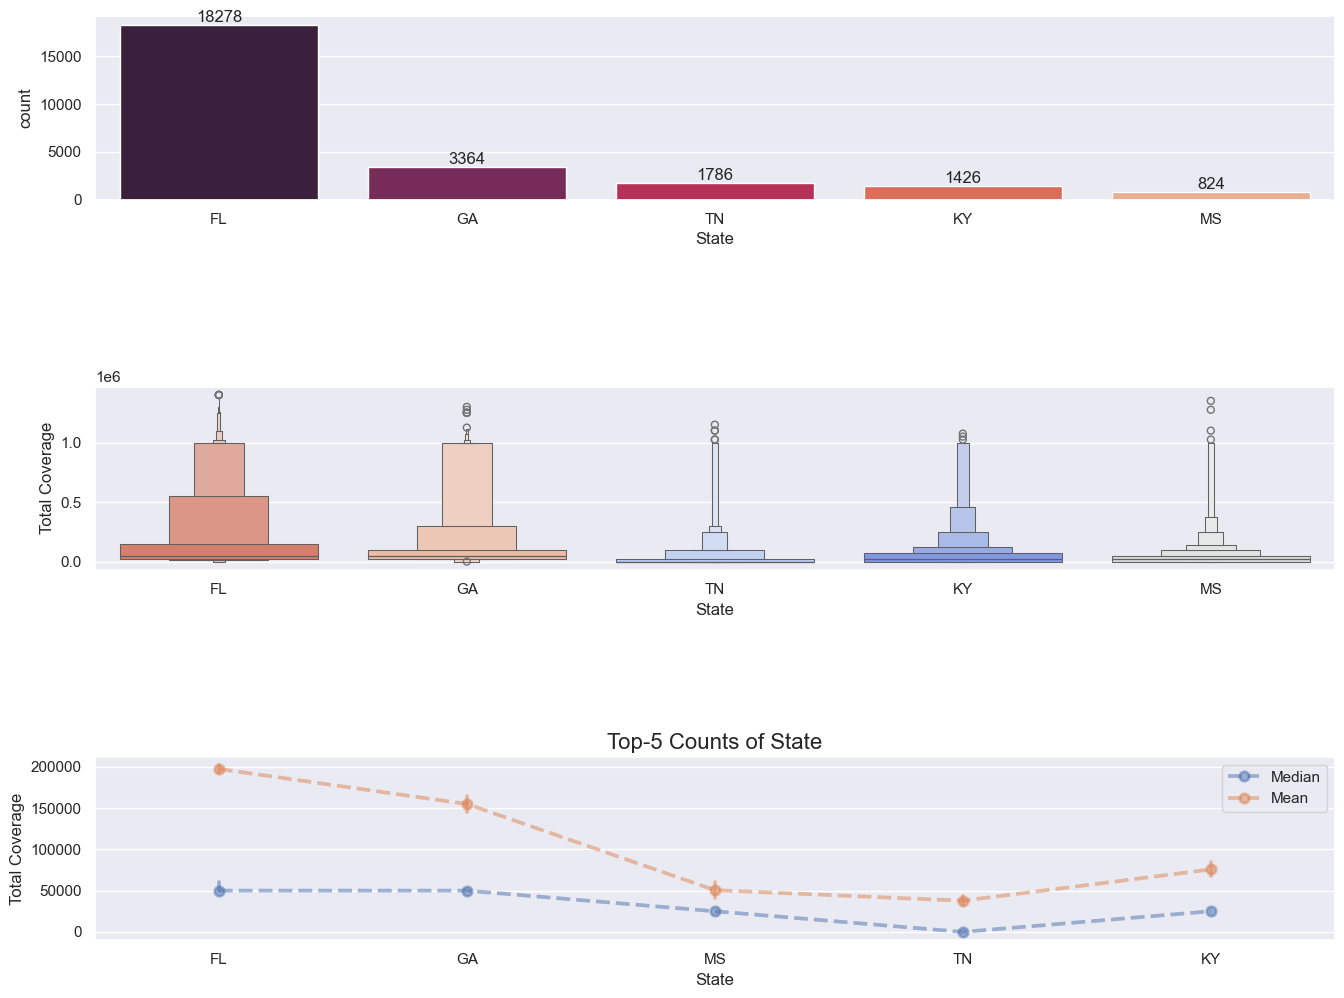

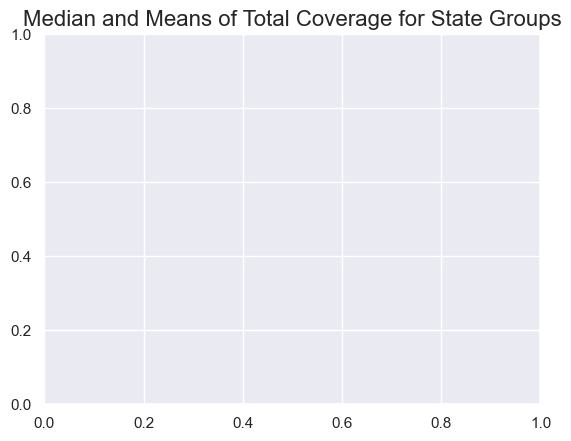

In [646]:
# Combined function
plot_total_claim_by_group(df=no_outliers, col="State", top_counts=5)

In [412]:
med_df = df[df["Total Coverage"] <= df["Total Coverage"].quantile(.975)]
medians = med_df[med_df["State"].isin(med_df["State"].value_counts()[:10].index)].groupby("State")["Total Coverage"].agg(["median"])
medians

median
State          
AL      37500.0
AR         50.0
FL      50000.0
GA      50000.0
IN          0.0
KY      25000.0
MS      25000.0
PA      27500.0
SC     112500.0
TN          0.0

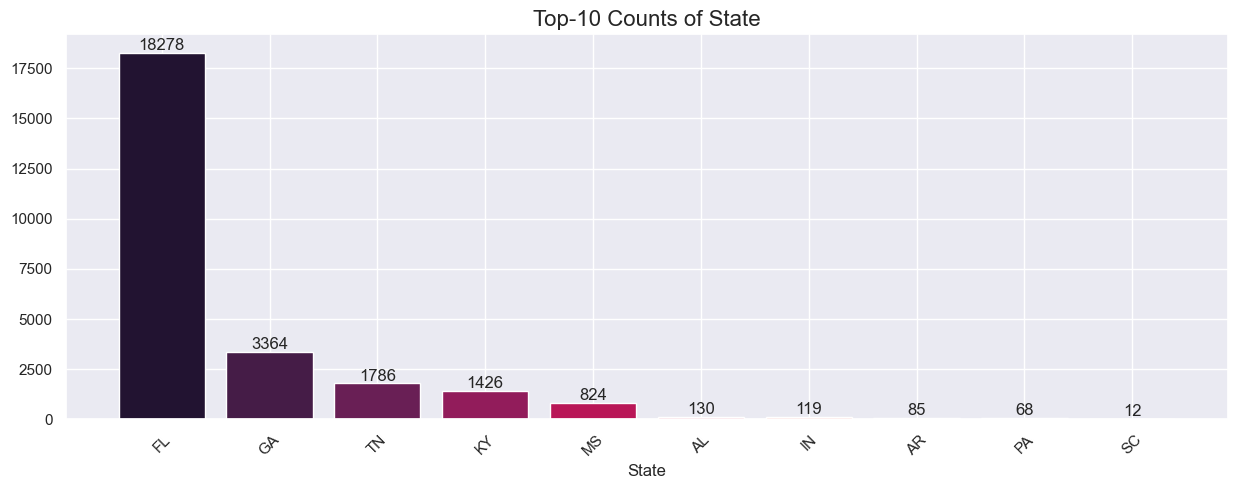

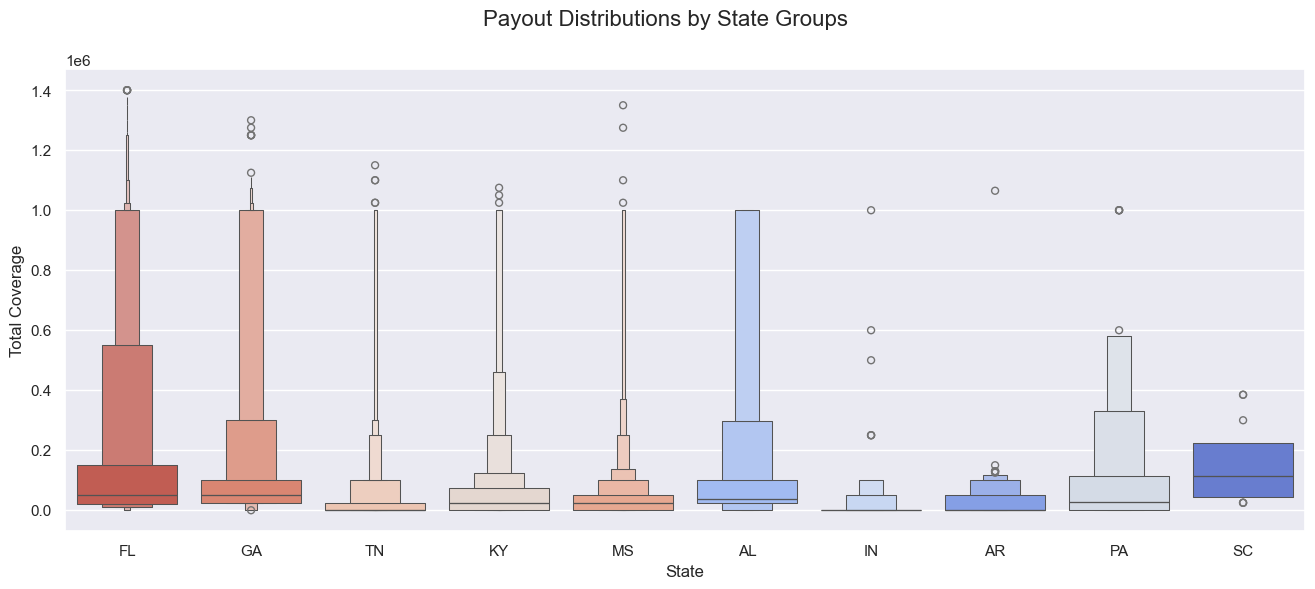

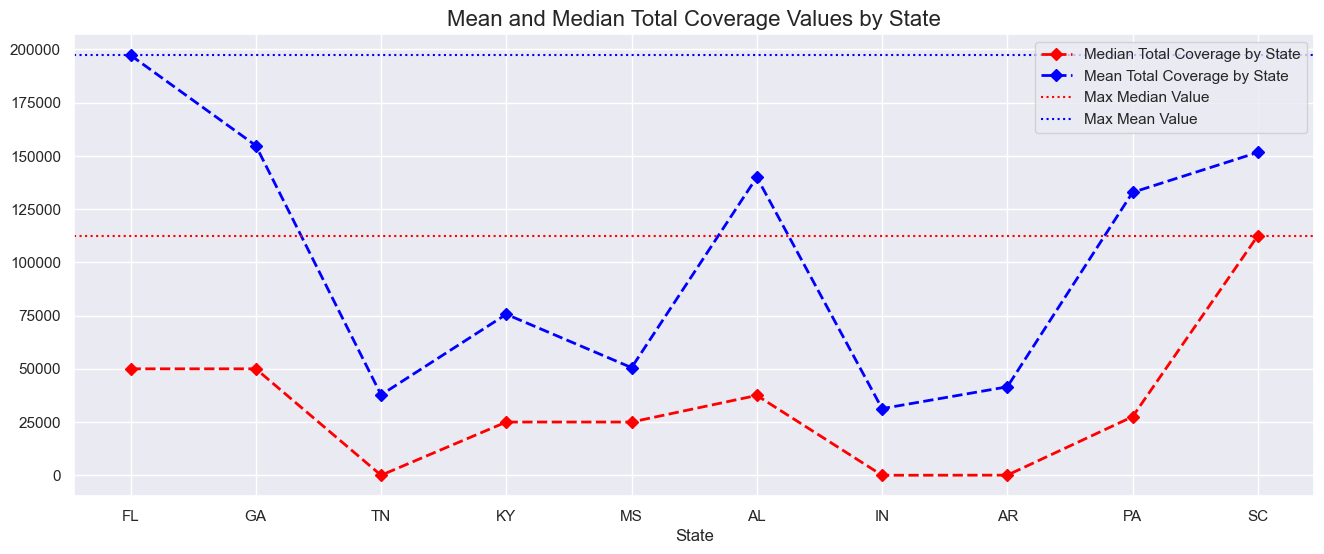

In [413]:
# Visualizing Payout Values by State
plot_total_claim_by_group(df= no_outliers, col = "State", legend=False);

(0.0, 200000.0)

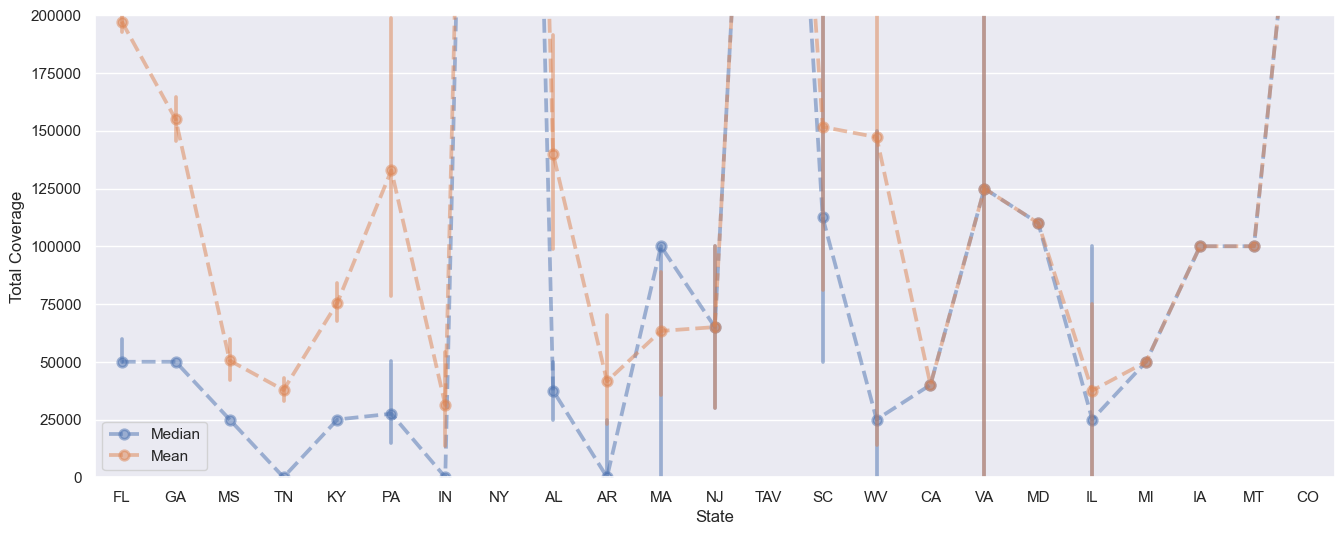

In [459]:
fig, ax3 = plt.subplots(figsize=(16,6))
sns.pointplot(data=df[df["Total Coverage"] <= df["Total Coverage"].quantile(.975)], x="State", y="Total Coverage", estimator="median", \
              errorbar="ci", linestyles="--", ax=ax3, label="Median", alpha=.5)


sns.pointplot(data=df[df["Total Coverage"] <= df["Total Coverage"].quantile(.975)], x="State", y="Total Coverage", estimator="mean", \
              errorbar="ci", linestyles="--", ax=ax3, label="Mean", alpha = .5)
ax3.set_ylim(0, 200_000)
# medians["median"].plot(kind="line", color="red", linewidth = 2, linestyle = "--", marker="D", ax=ax3, \
#                        label=f"Median {y.title()} by {col.title()}")
# medians["mean"].plot(kind="line", color="blue", linewidth = 2, linestyle = "--", marker="D", ax=ax3,\
#                     label=f"Mean {y.title()} by {col.title()}")
# ax3.set_xticks(range(10))
# ax3.set_xticklabels(top_entries)
# ax3.axhline(medians["median"].max(), color="red", label="Max Median Value", linestyle=":")
# ax3.axhline(medians["mean"].max(), color="blue", label="Max Mean Value", linestyle=":")
# ax3.set_title(f"Mean and Median {y.title()} Values by {col.title()}", fontsize=16)
# ax3.legend()

In [419]:
df.head(3)

City of incident State of incident       Type of Injury Serious Injury  \
2     Lehigh Acres                FL  Other Injury / Pain            NaN   
3        Belleview                FL  Other Injury / Pain            NaN   
6         Lakeland                FL  Other Injury / Pain             No   

  Other injury  Age at time of Injury Did the airbags deploy?  \
2          NaN                    NaN                     Yes   
3          NaN                    NaN                     Yes   
6          NaN                    NaN                      No   

  What type of accident was it? Did the accident involve a truck or bus?  \
2                     Multi Car                                       No   
3                     Multi Car                                      Yes   
6                     Multi Car                                       No   

               Type of Truck Involve Uber/Taxi/Car Service?  \
2                        NaN                             No   
3  Semi-tractor with trailer                             No   
6                        NaN                             No   

  Potential TBI Issues State of Injury  Catastrophic? Called 911?  \
2                   No             NaN              0         Yes   
3                  NaN             NaN              0         Yes   
6                   No             NaN              0         Yes   

   Net Attorney Fee  Total Bills  Total Coverage Positive MRI Finding  \
2          16666.67     30603.62         50000.0                  Yes   
3           9833.33     24253.94       3000000.0                  Yes   
6           2666.66     19342.00         50000.0                  Yes   

  Life Care Plan Status Ortho/Pain/Neuro Eval Surgery Completed  \
2                   Yes                   Yes               NaN   
3                    No                    No                No   
6                   NaN                    No                No   

  Surgery and/or Injections Recommended Similar Prior Injury  \
2                                    No                   No   
3                                    No                   No   
6                                    No                   No   

  Injections Completed No Treatment Reason  TBI Confirmed   AGE State  
2                  NaN                 NaN              0  41.0    FL  
3                   No           Pain free              0  54.0    FL  
6                   No               Other              0  20.0    FL

In [432]:
df.shape

(27380, 29)

In [433]:
(df["Net Attorney Fee"] > 0).sum()

27318

In [434]:
df["Net Attorney Fee"].describe()

count    2.738000e+04
mean     1.563598e+04
std      4.451335e+04
min     -1.141620e+04
25%      3.333330e+03
50%      6.666670e+03
75%      1.400000e+04
max      2.733333e+06
Name: Net Attorney Fee, dtype: float64

In [436]:
df["Net Attorney Fee"].sort_values()[:20]

22324   -11416.20
53241    -8333.33
43985    -4568.96
18100    -2298.00
4991     -1825.30
11051    -1583.33
7155      -583.33
40712     -500.00
22042     -418.44
55941     -291.16
54234     -188.10
20711      -58.35
41814       -0.63
7575         0.00
7797         0.00
44701        0.00
45184        0.00
53594        0.00
49496        0.00
52634        0.00
Name: Net Attorney Fee, dtype: float64

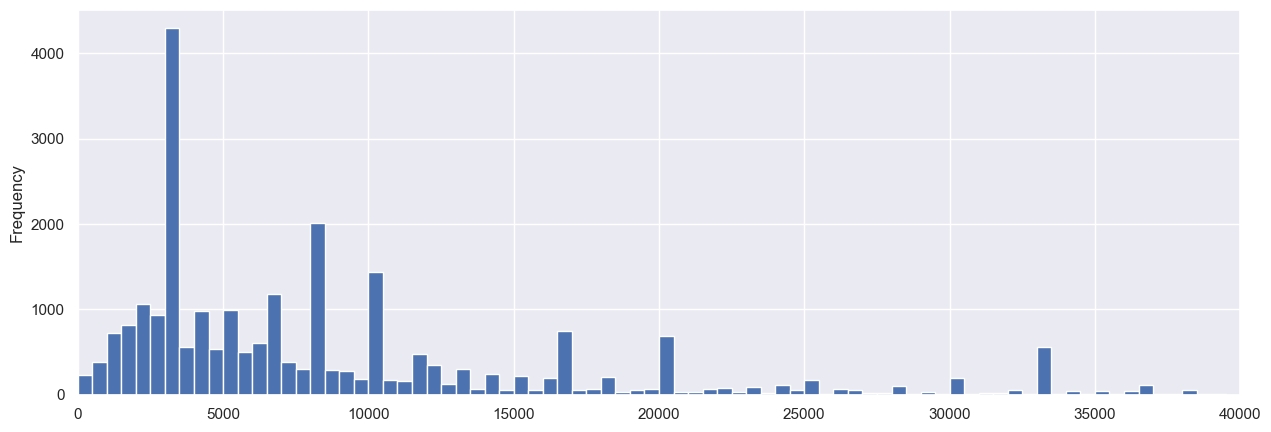

In [431]:
fig, ax = plt.subplots(figsize=(15,5))
df["Net Attorney Fee"].plot(kind="hist", ax=ax, bins=np.arange(0, 40000, 500))
ax.set_xlim(0, 40000);

<Axes: xlabel='Total Coverage', ylabel='Density'>

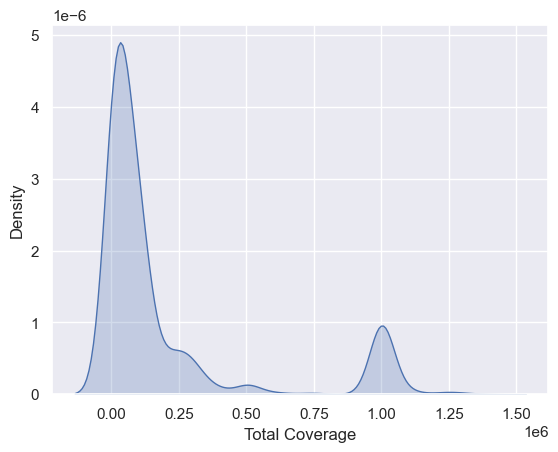

In [416]:
sns.kdeplot(data = df[df["Total Coverage"] <= df["Total Coverage"].quantile(.975)].query("State == 'FL'"), x= "Total Coverage", fill=True)

In [418]:
1e-6 == .000001

True

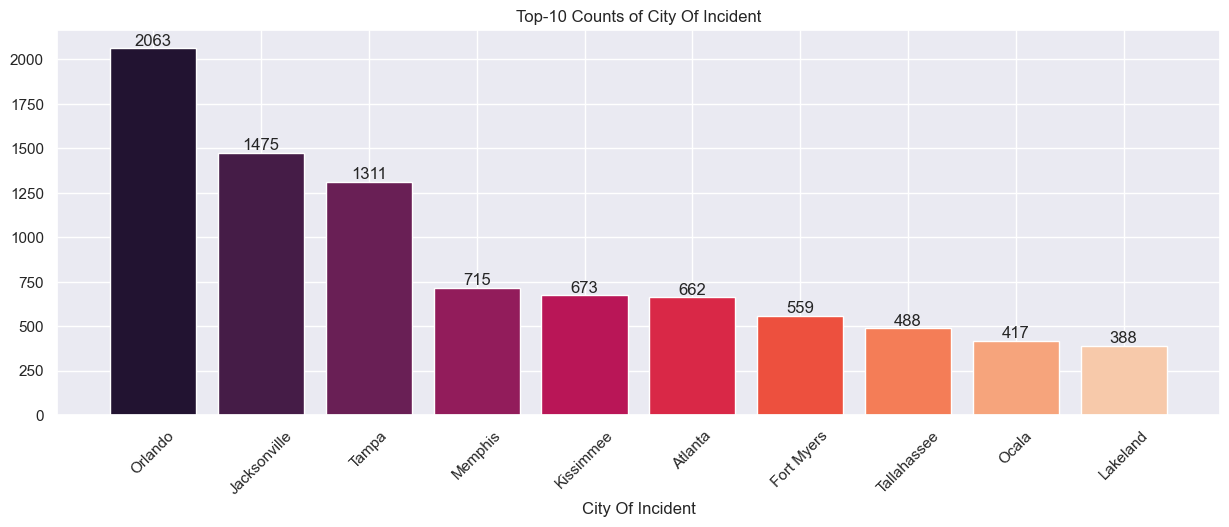

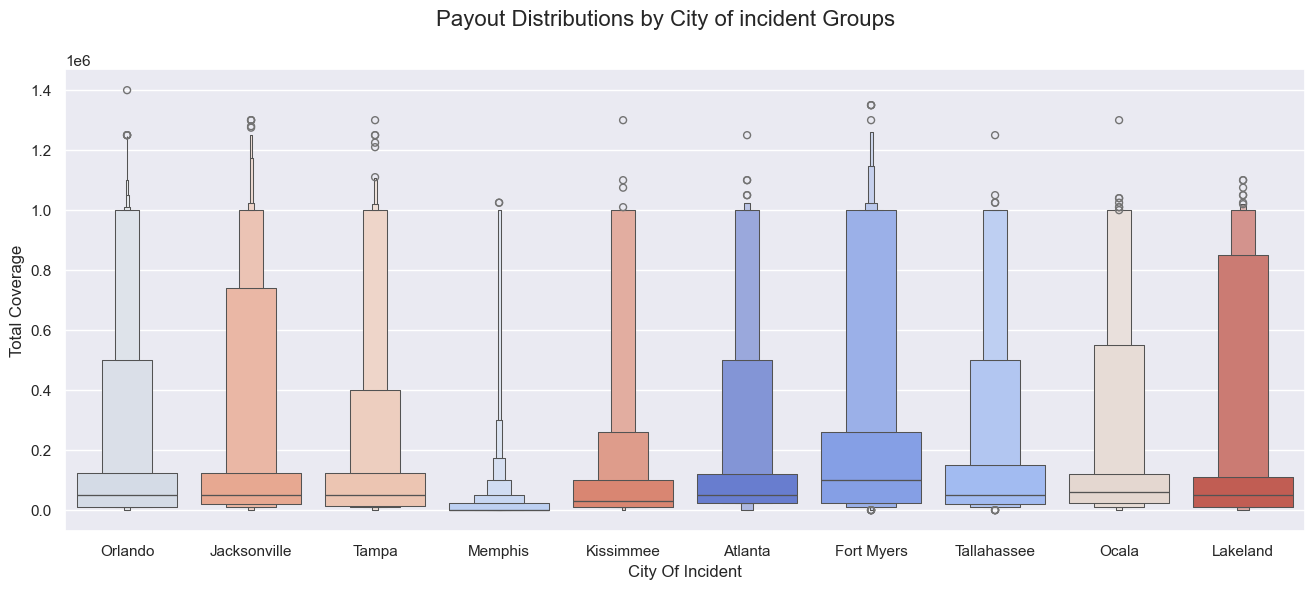

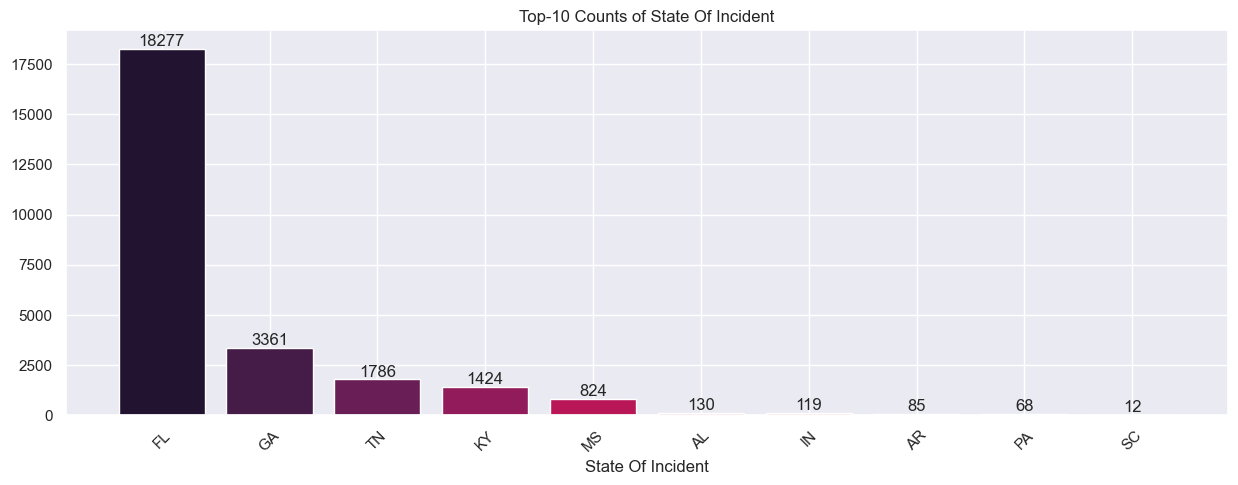

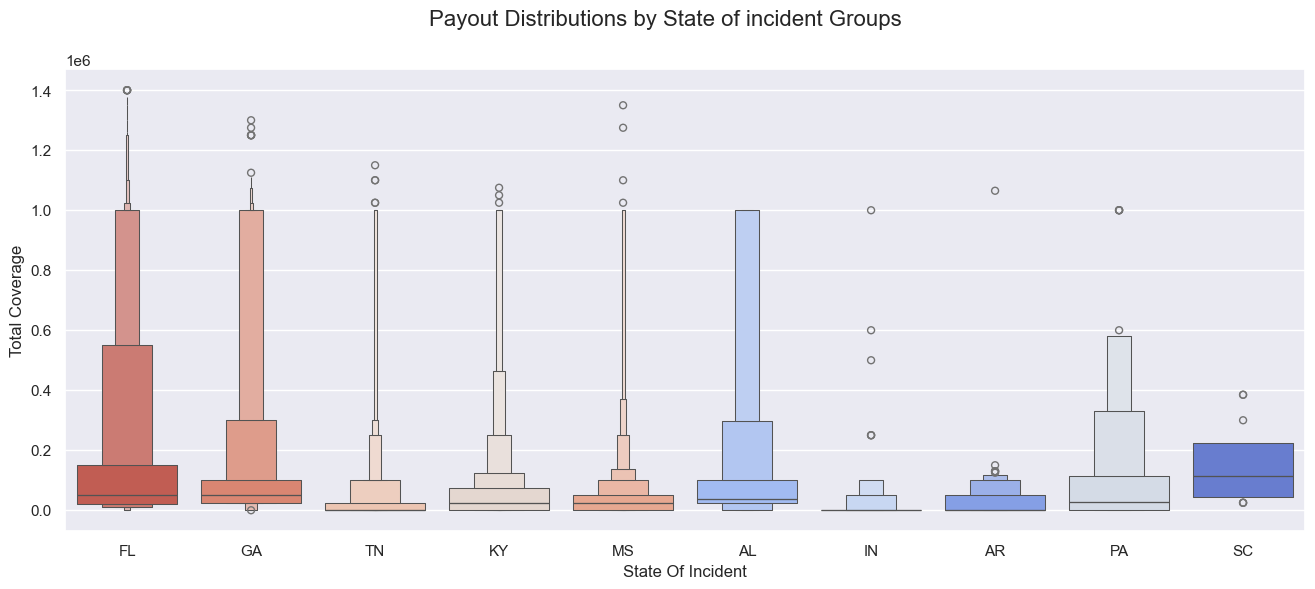

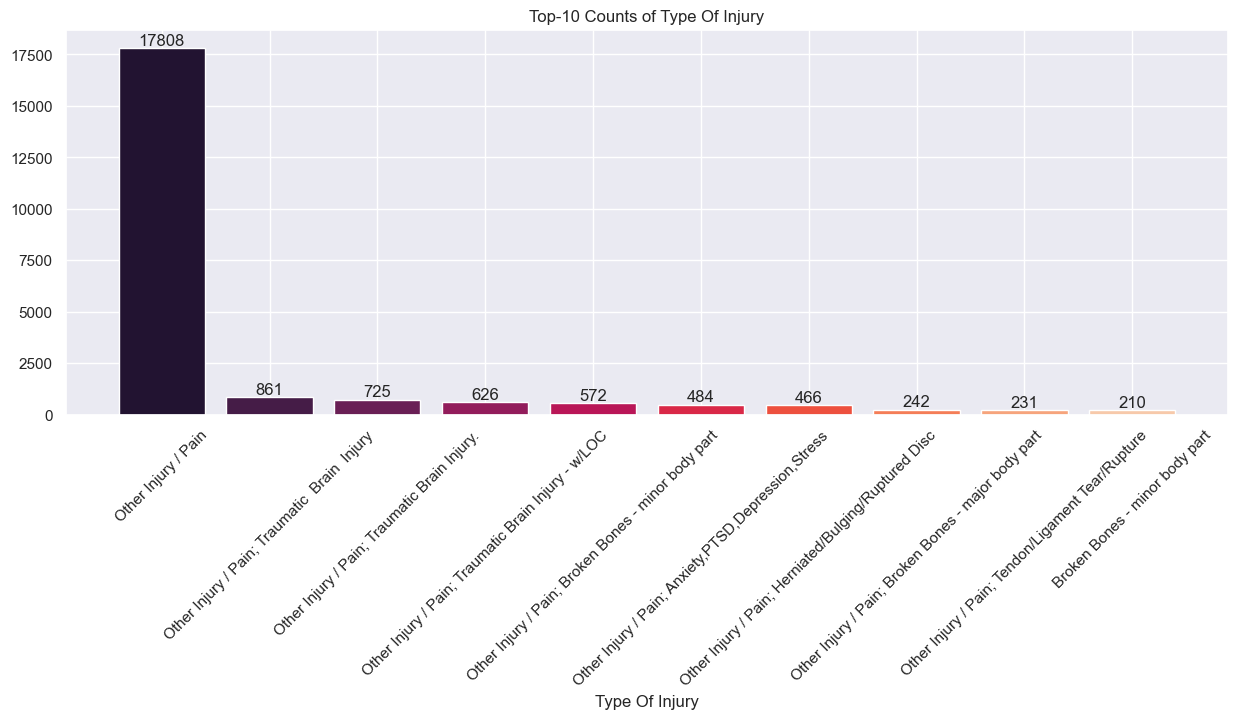

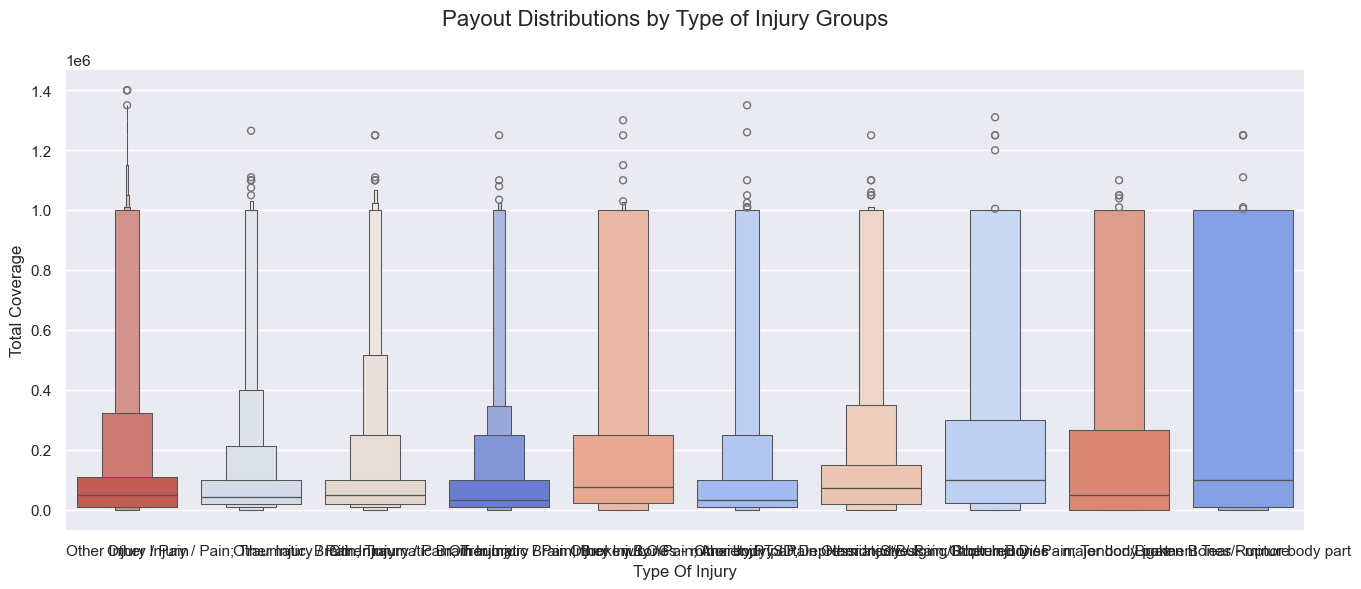

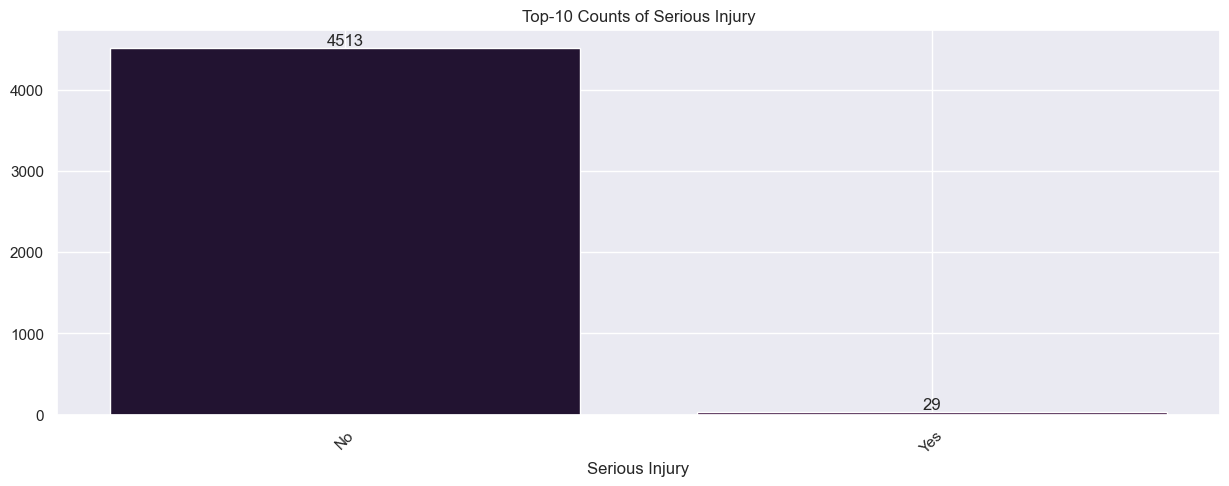

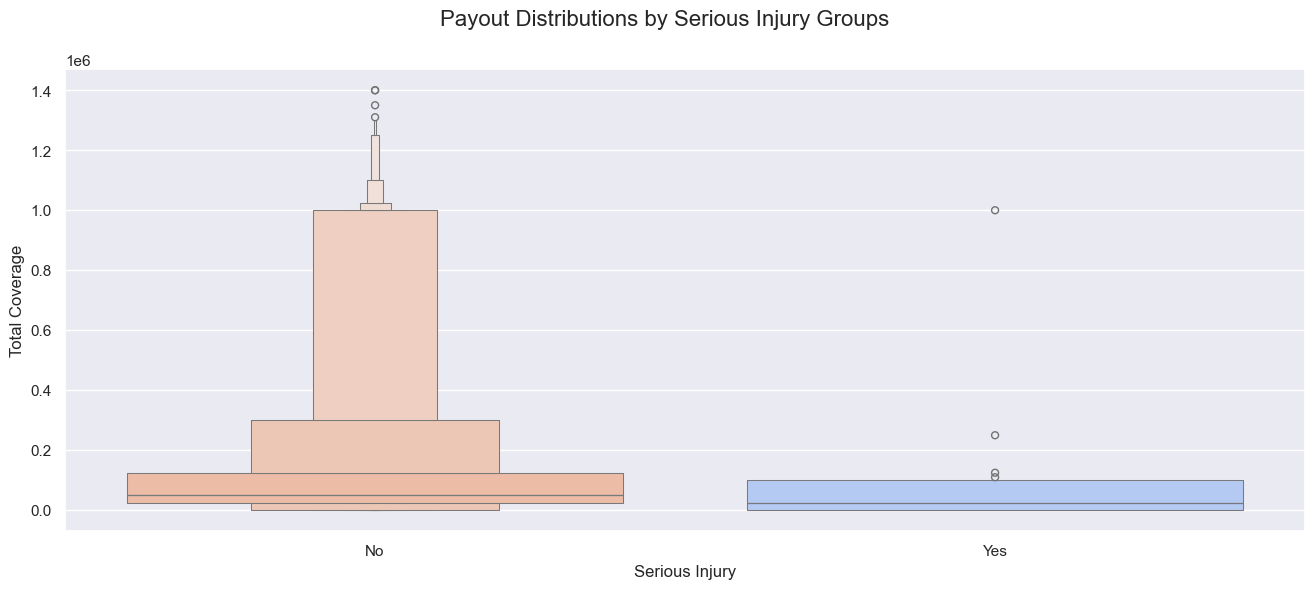

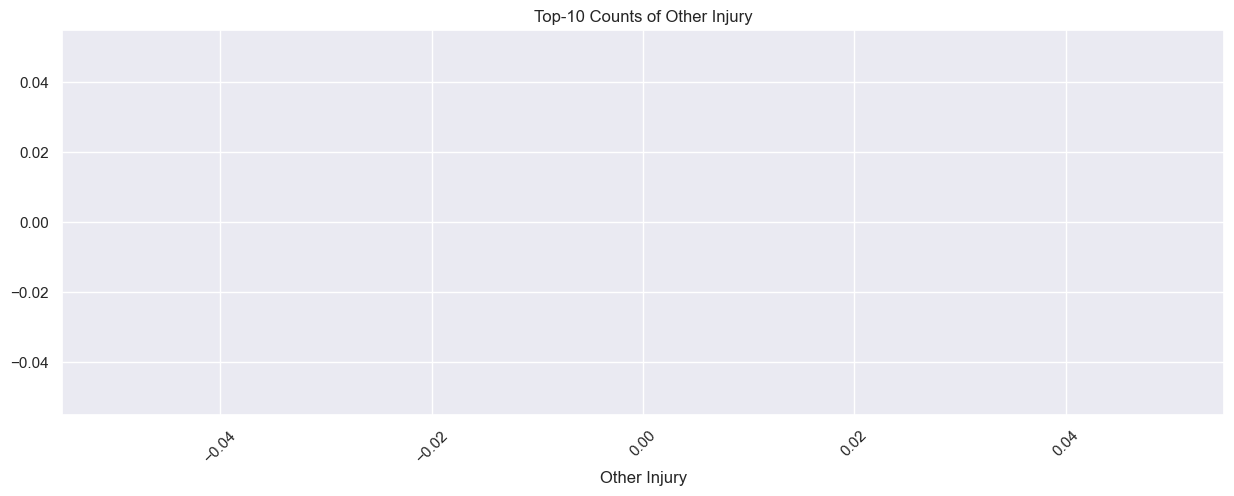

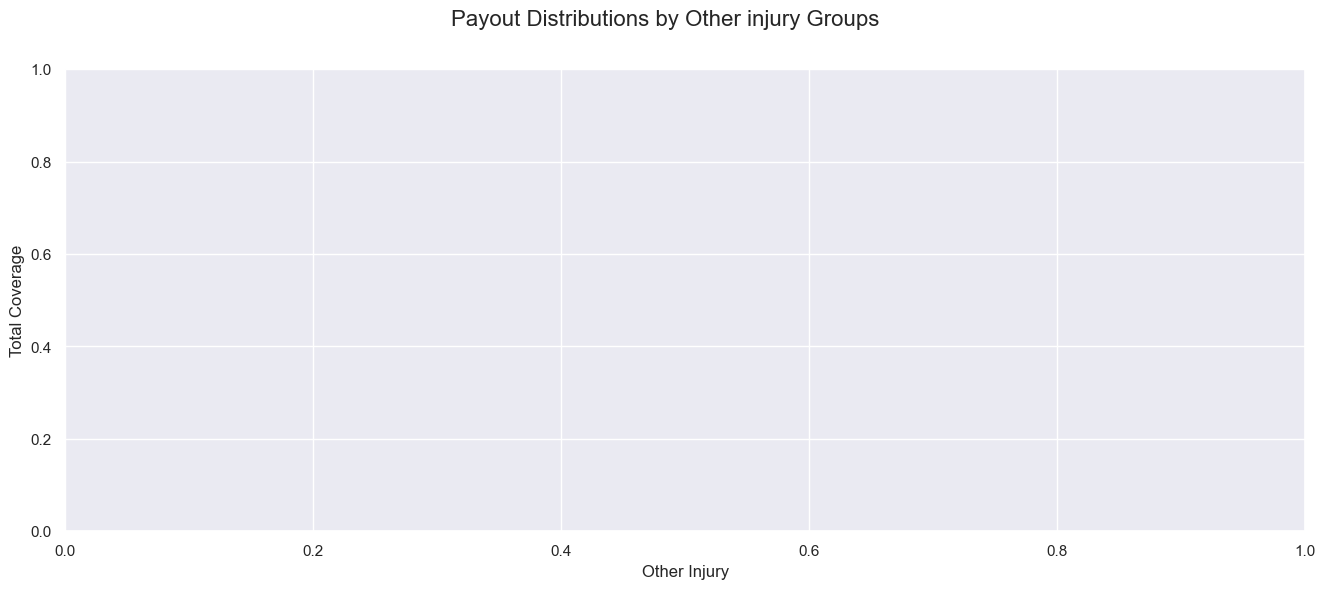

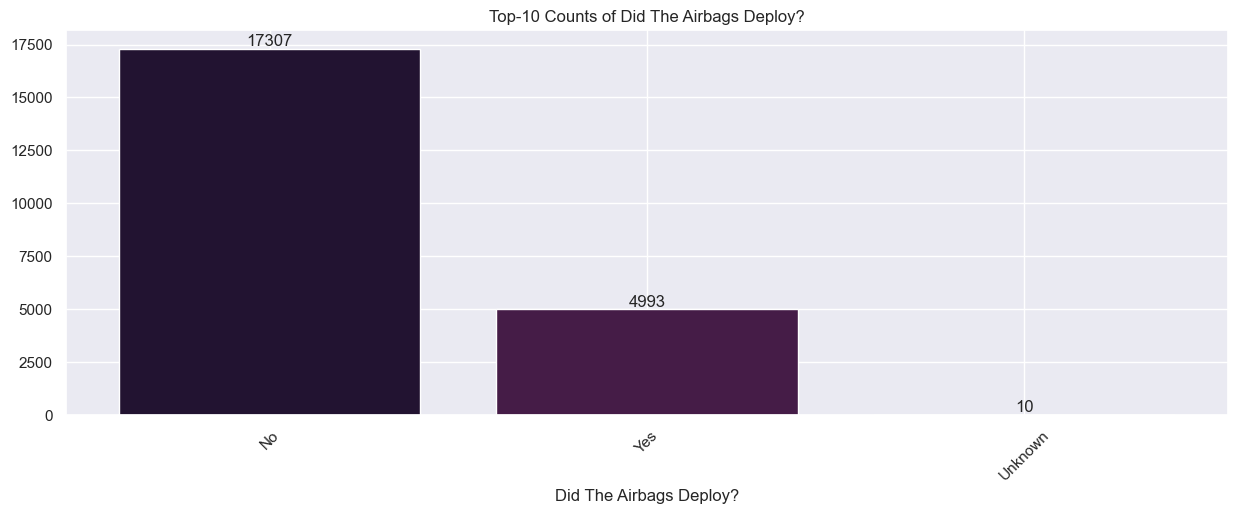

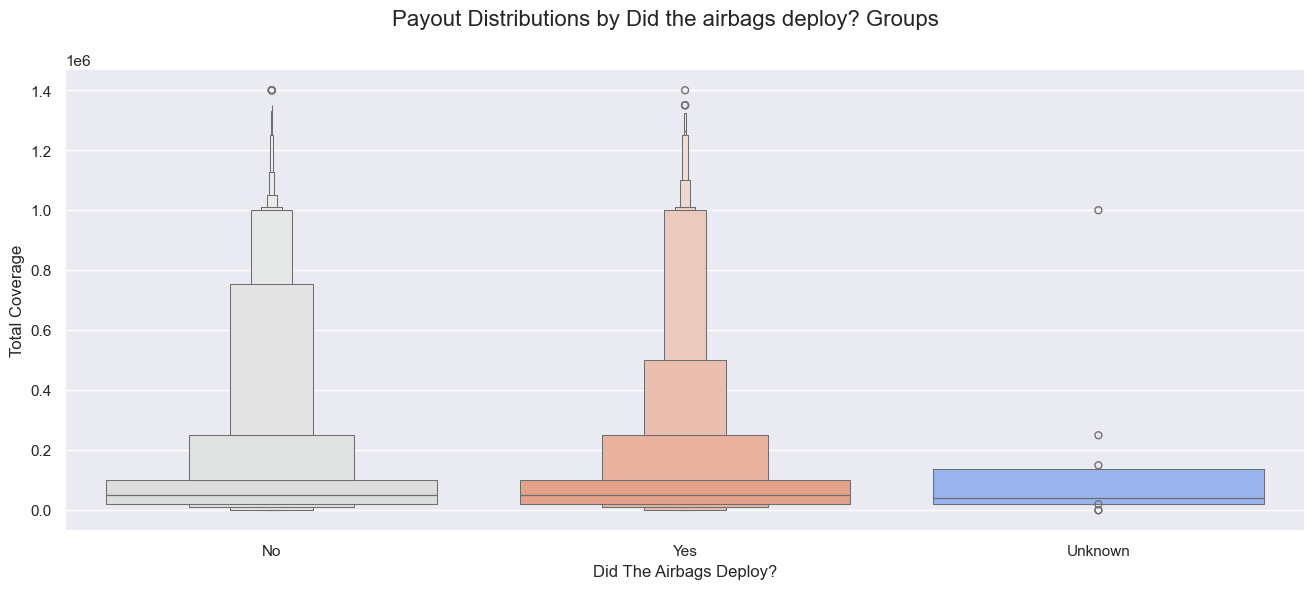

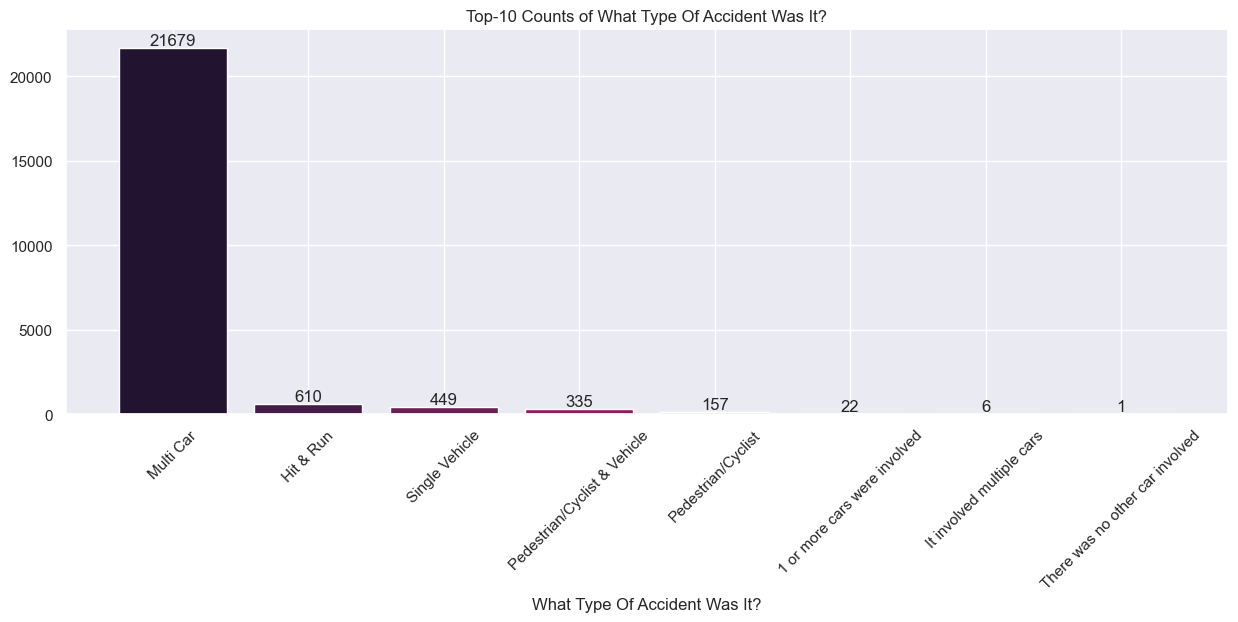

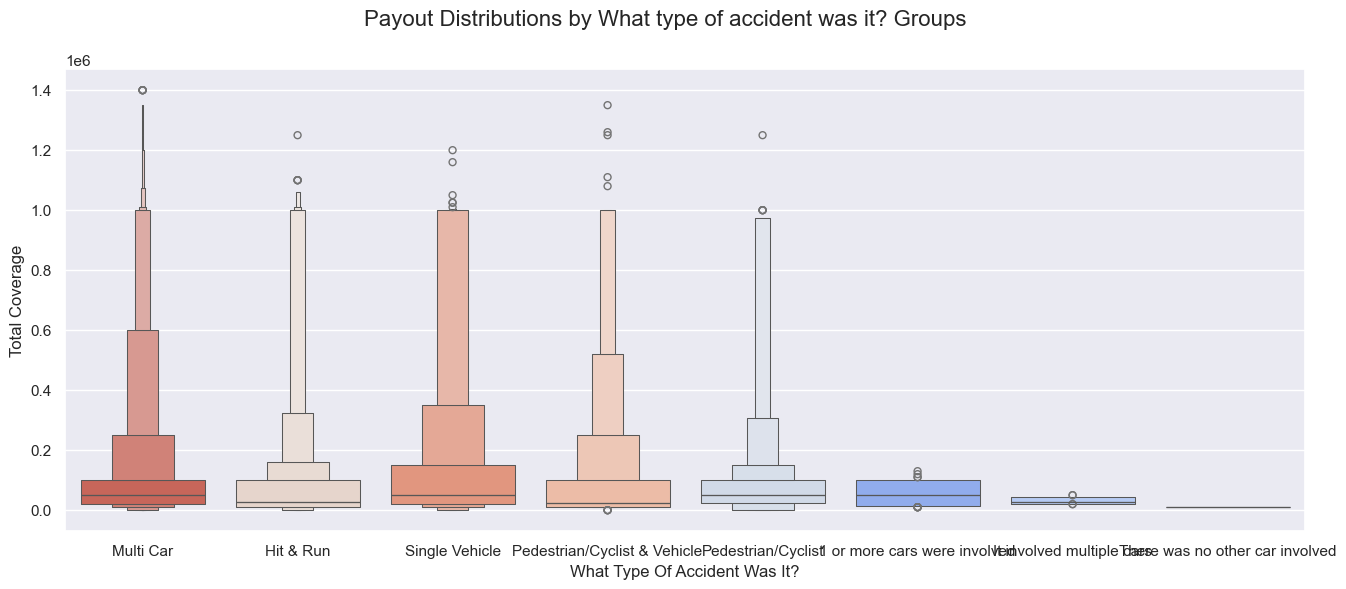

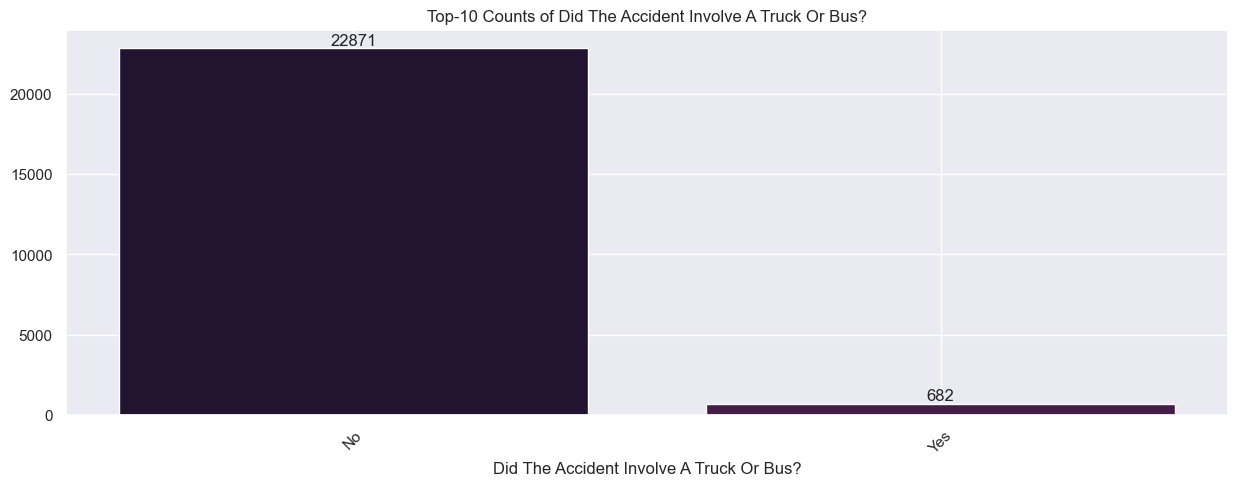

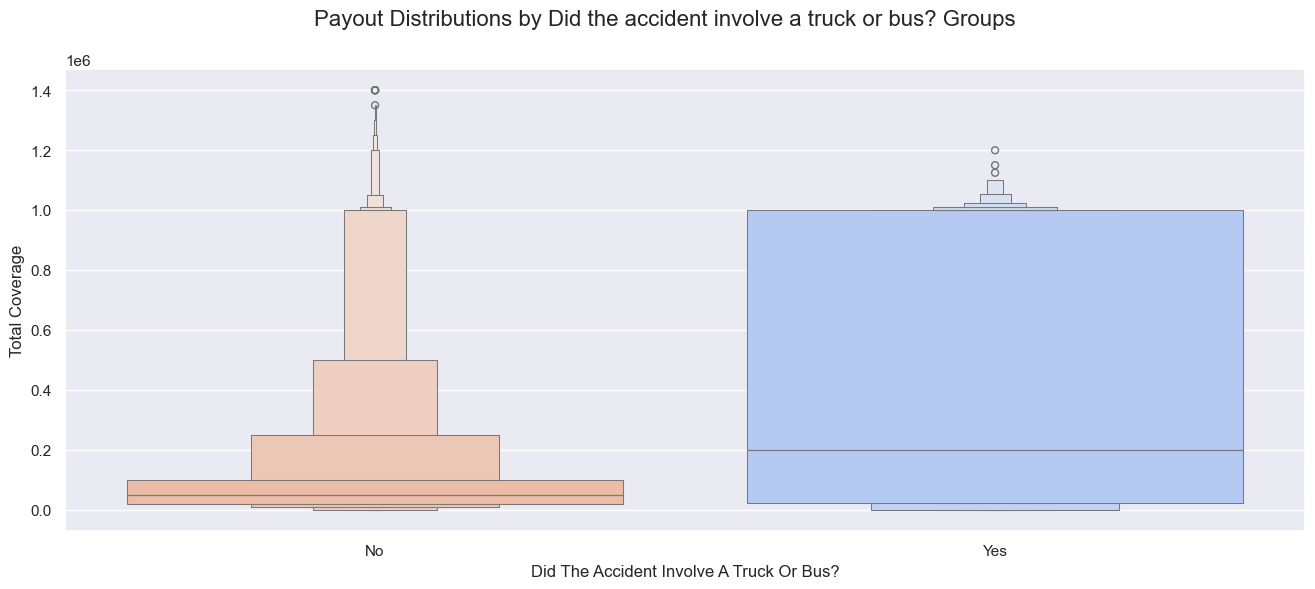

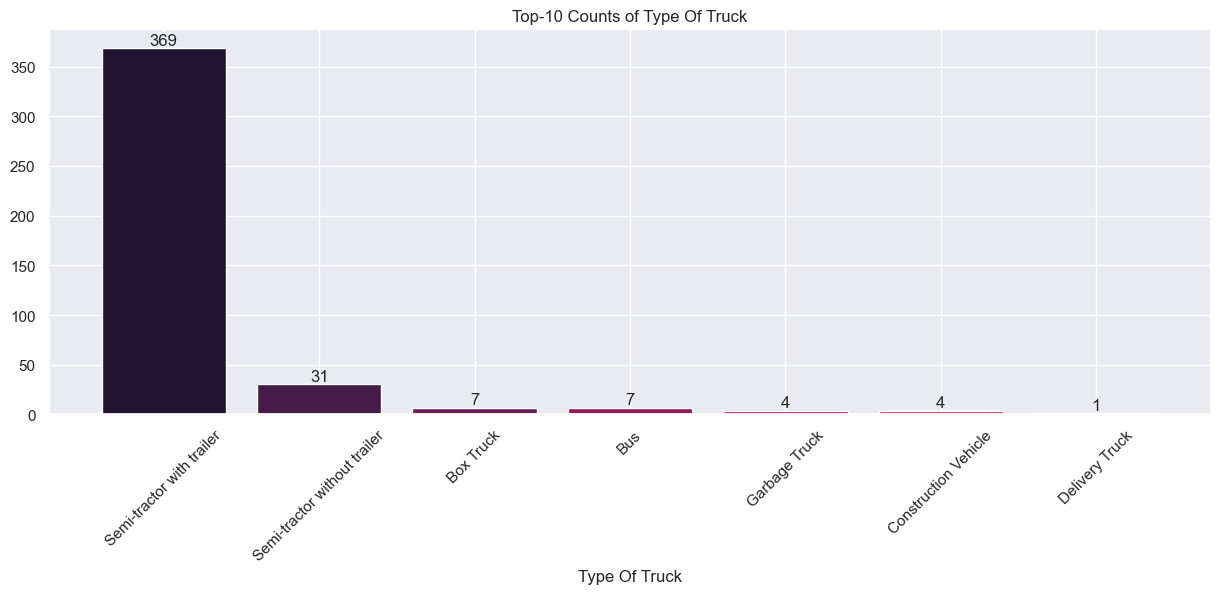

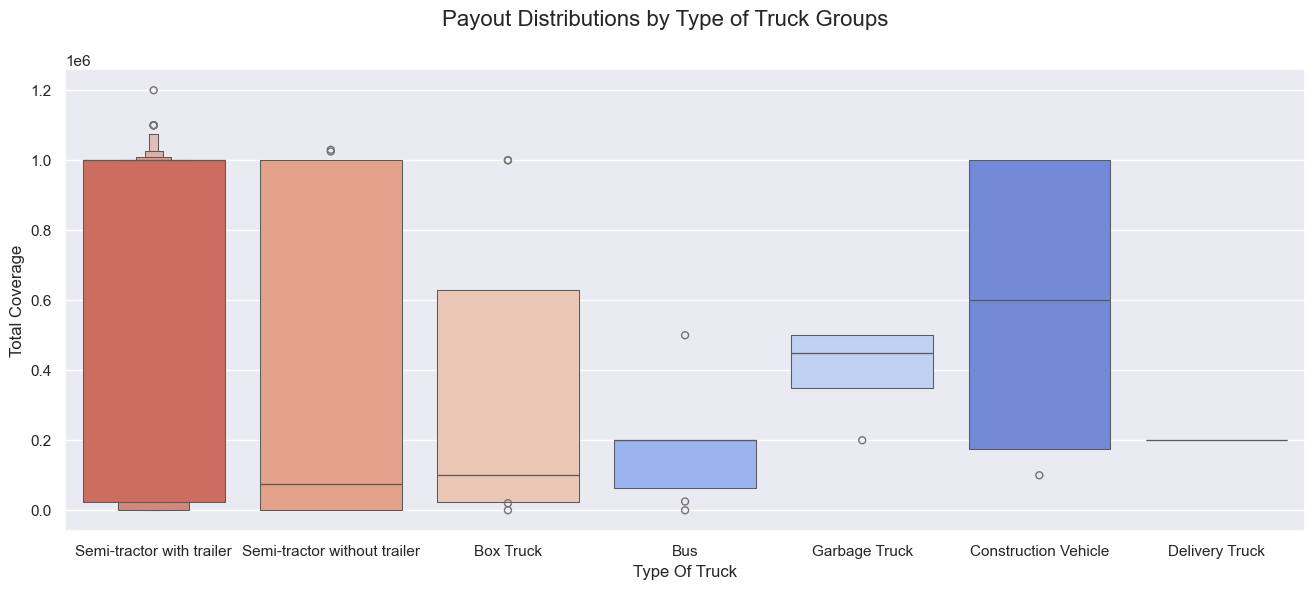

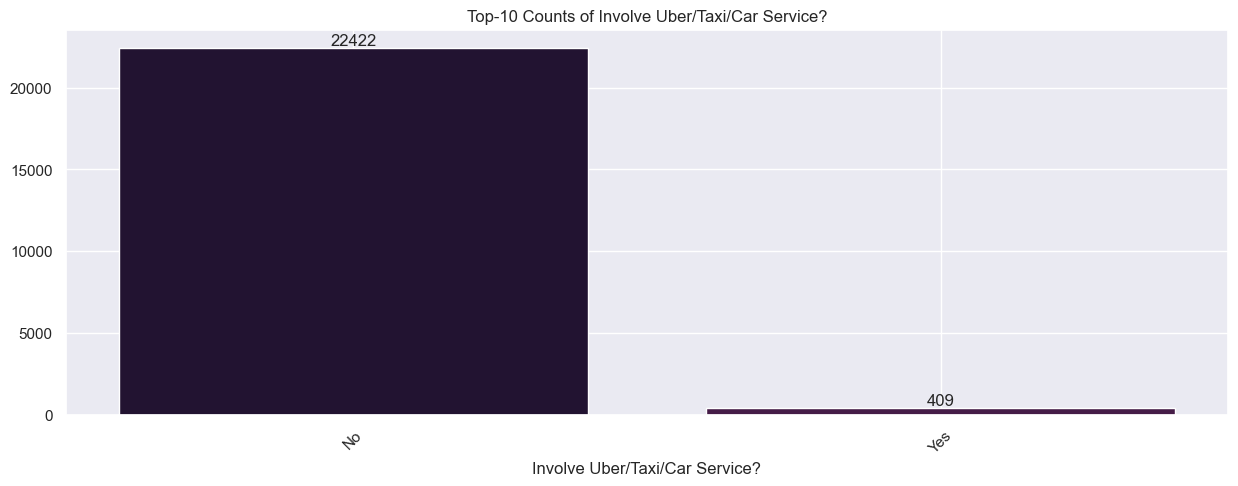

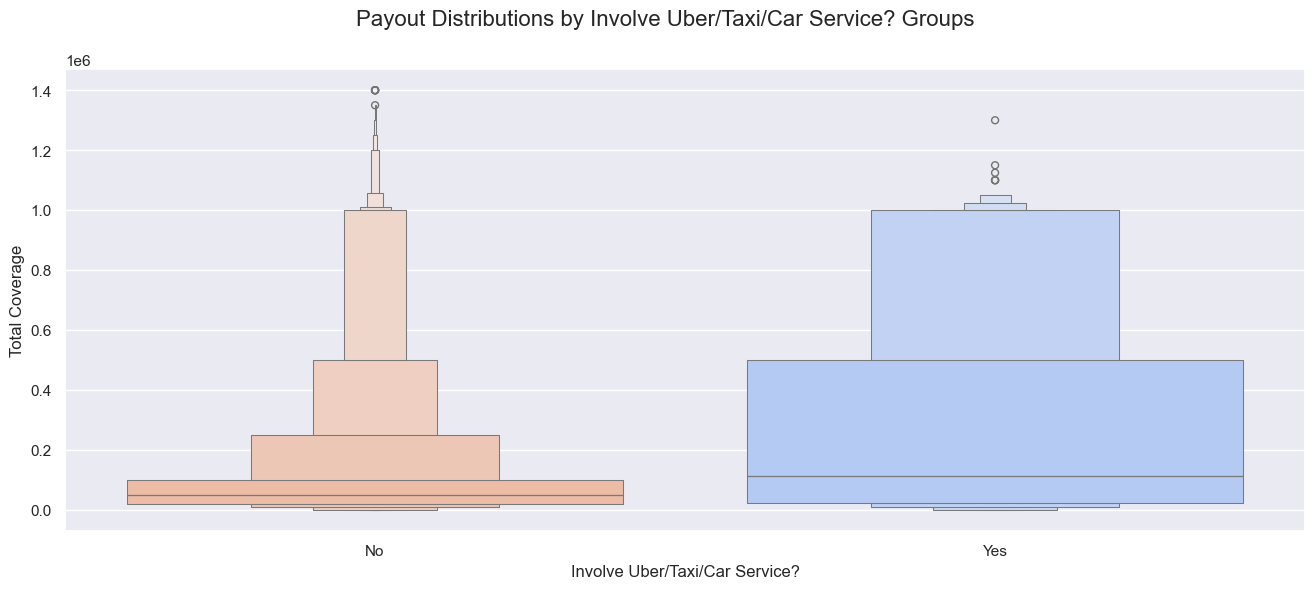

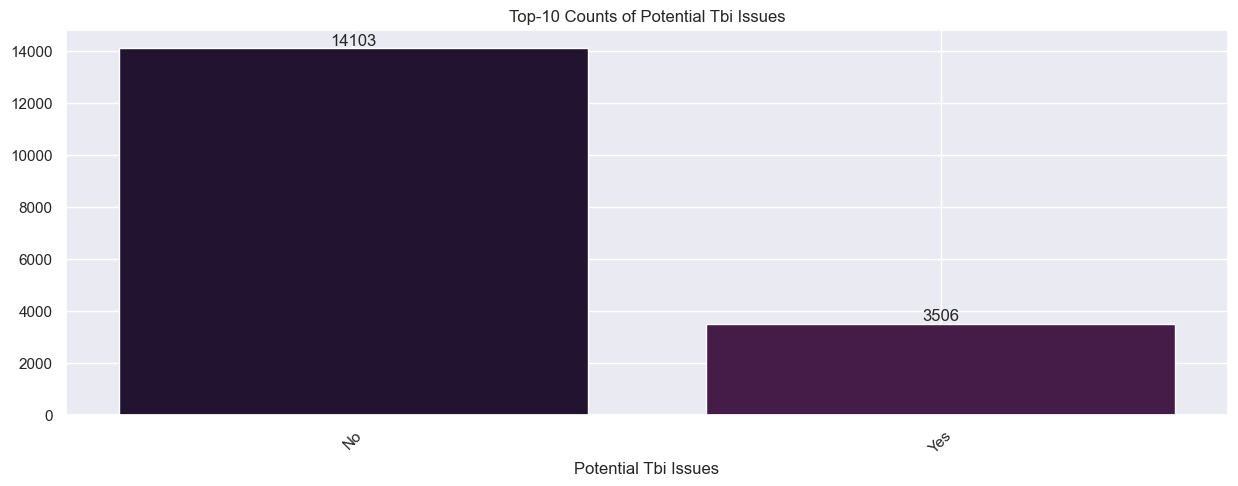

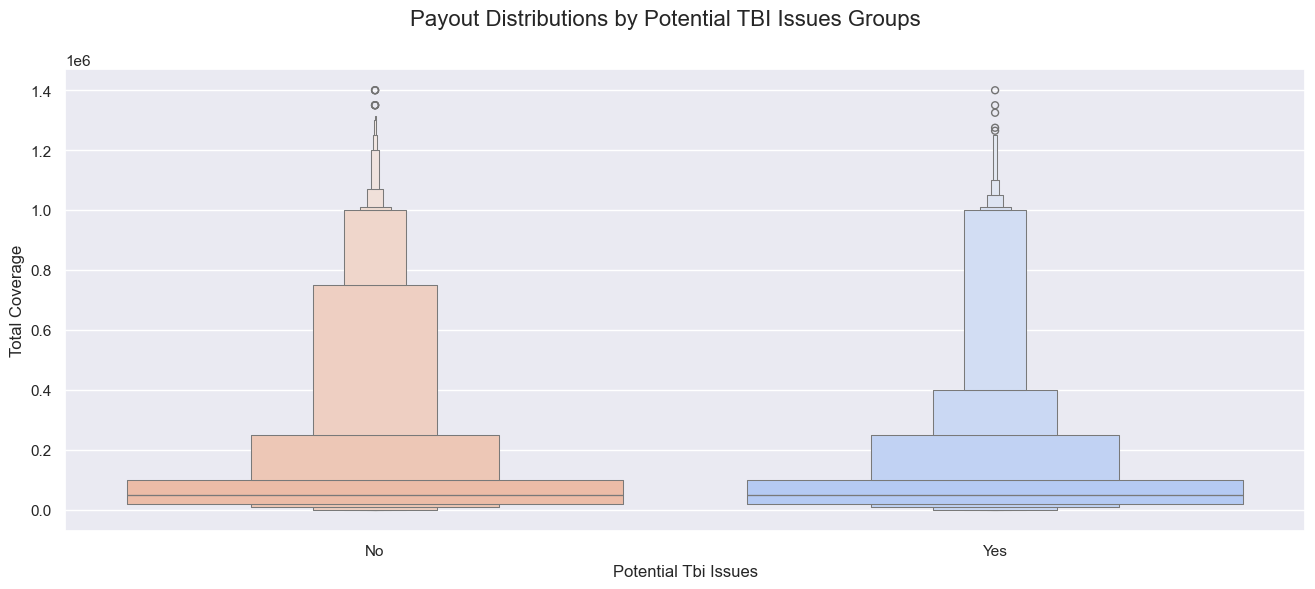

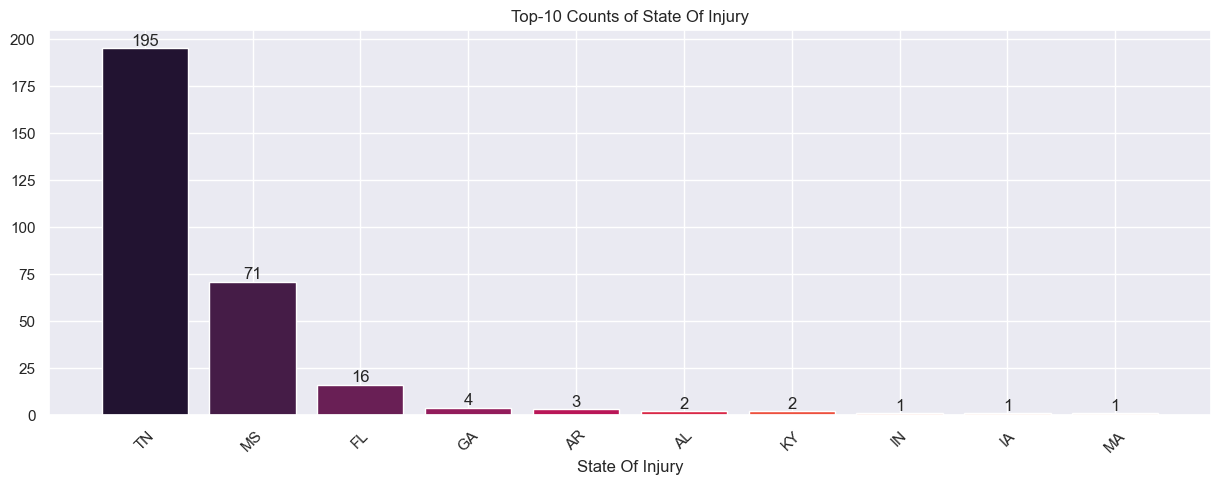

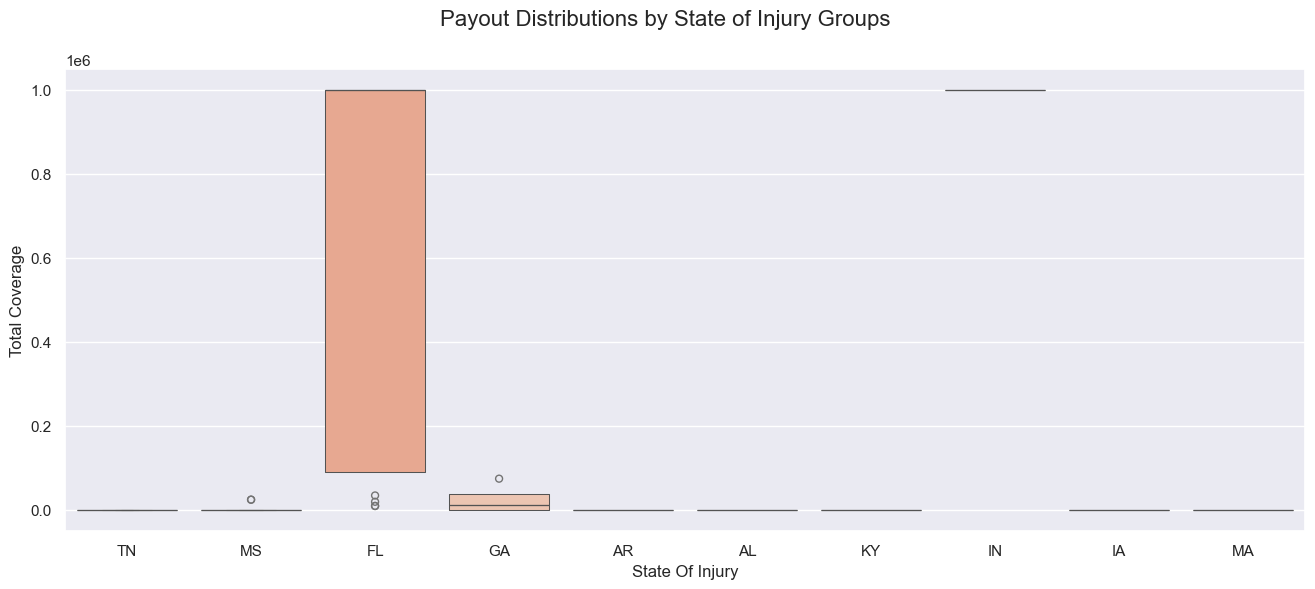

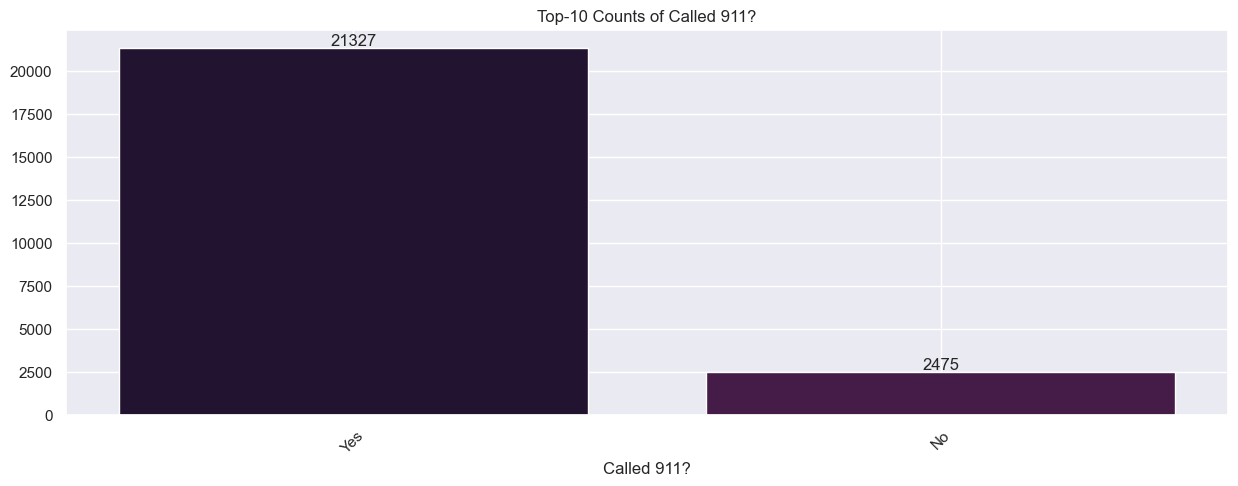

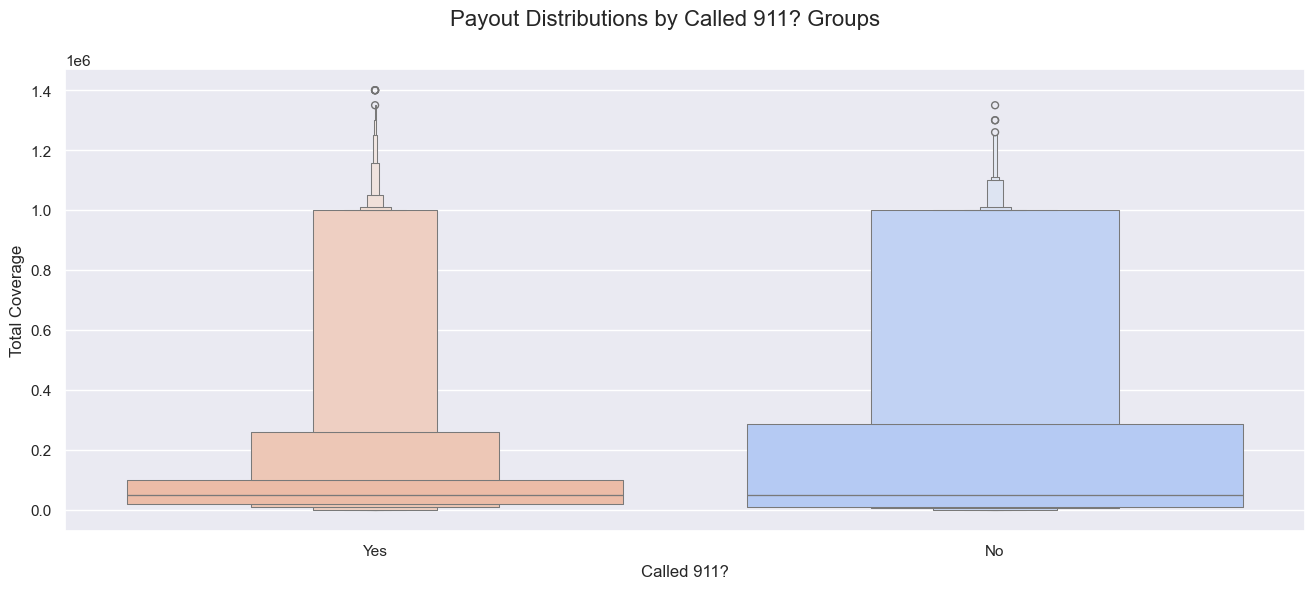

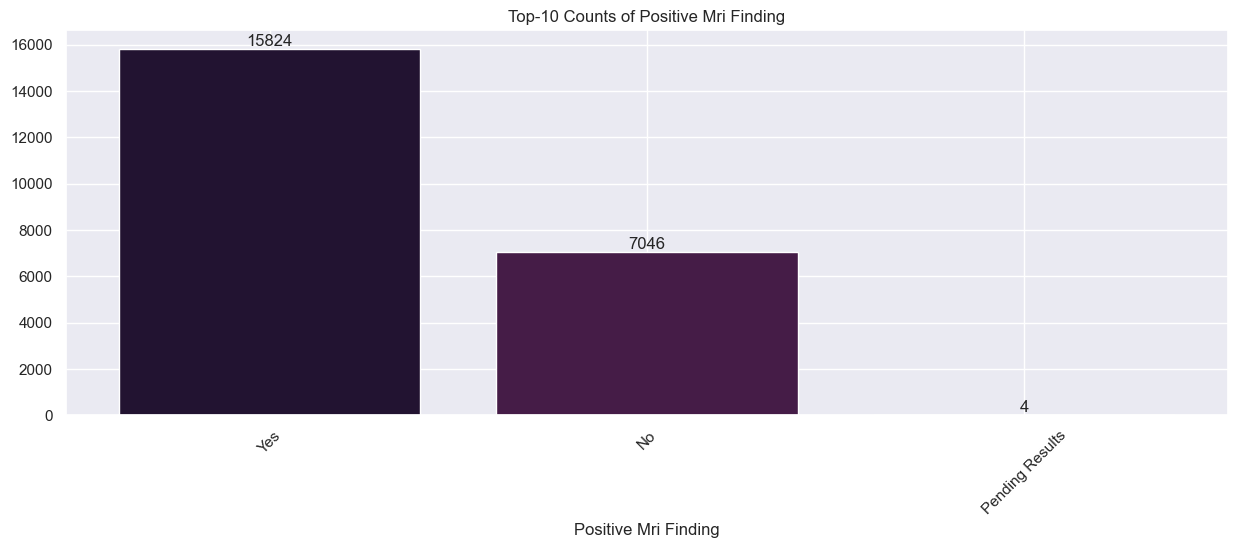

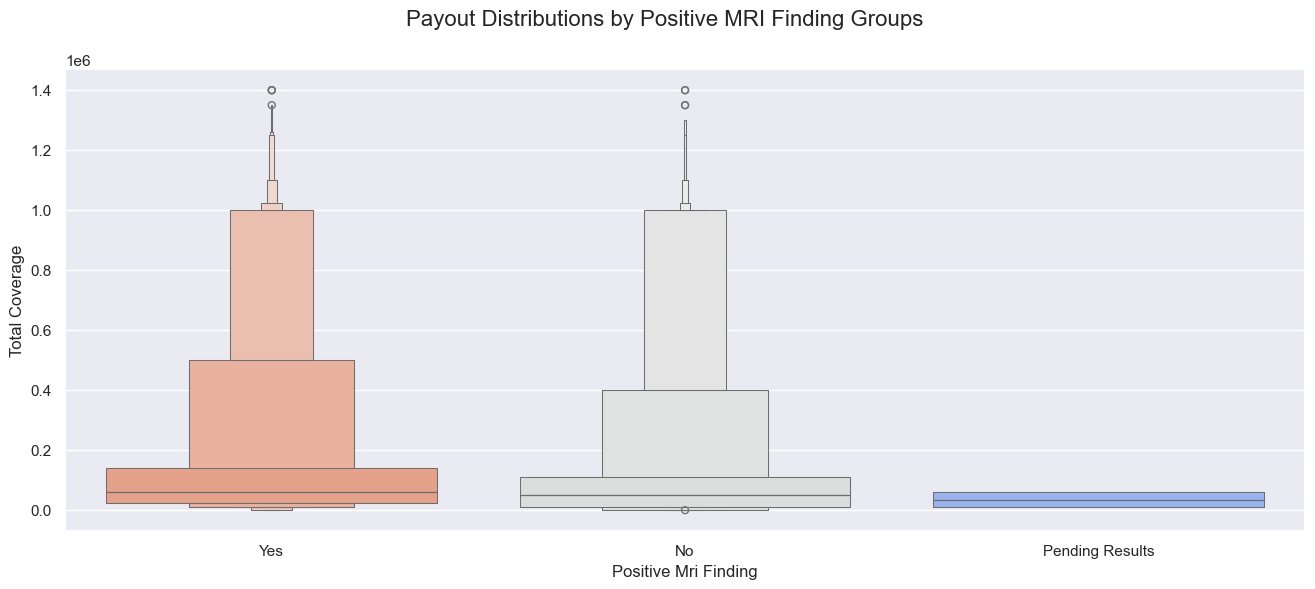

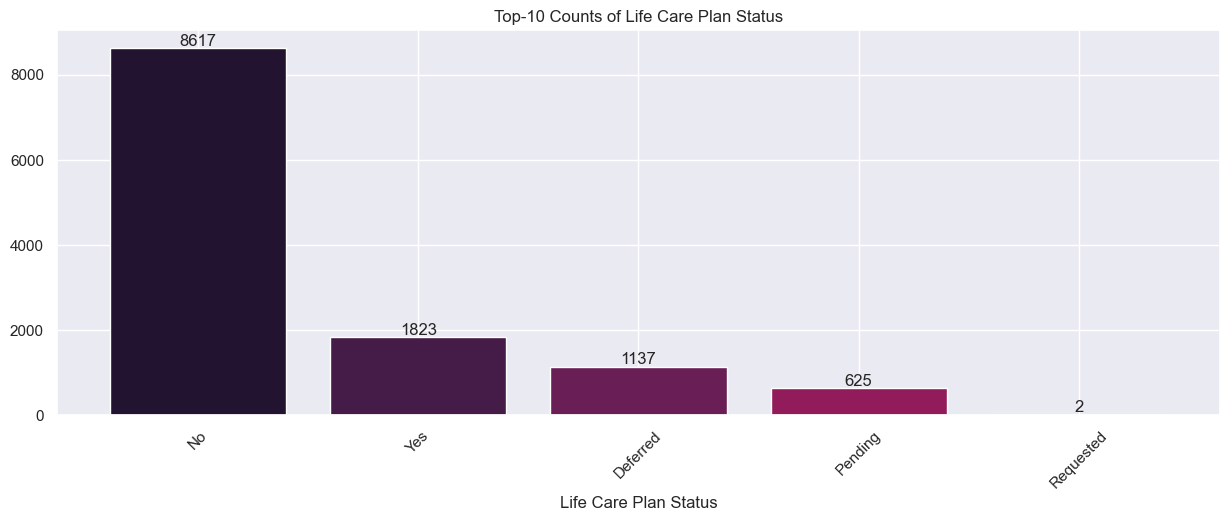

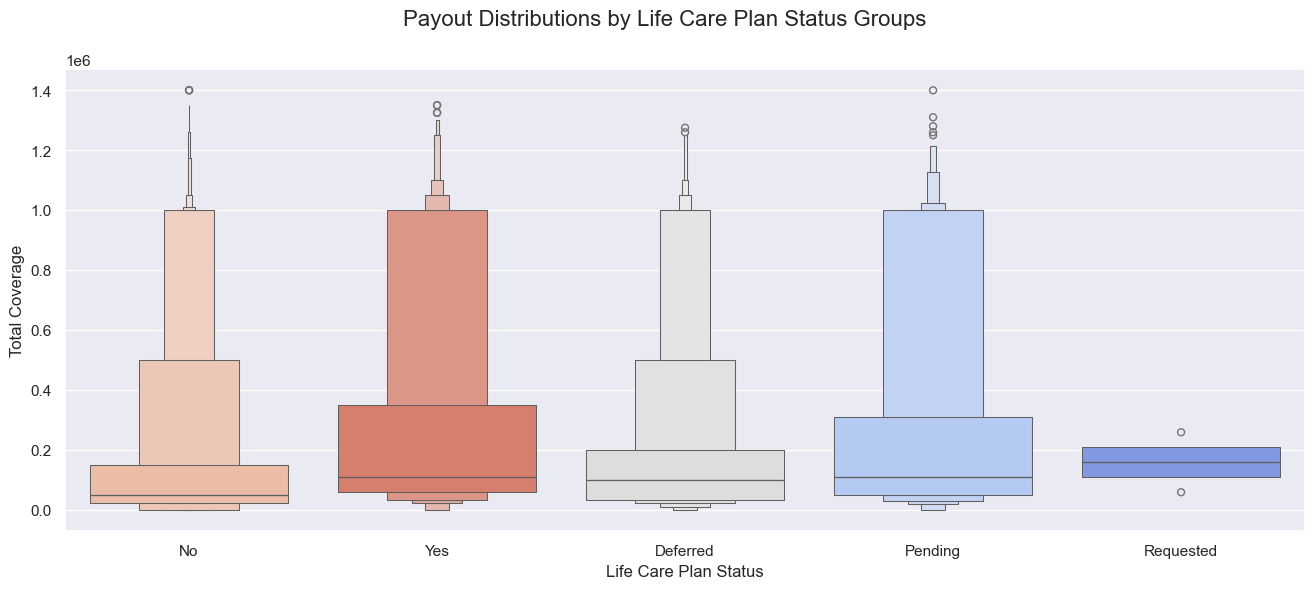

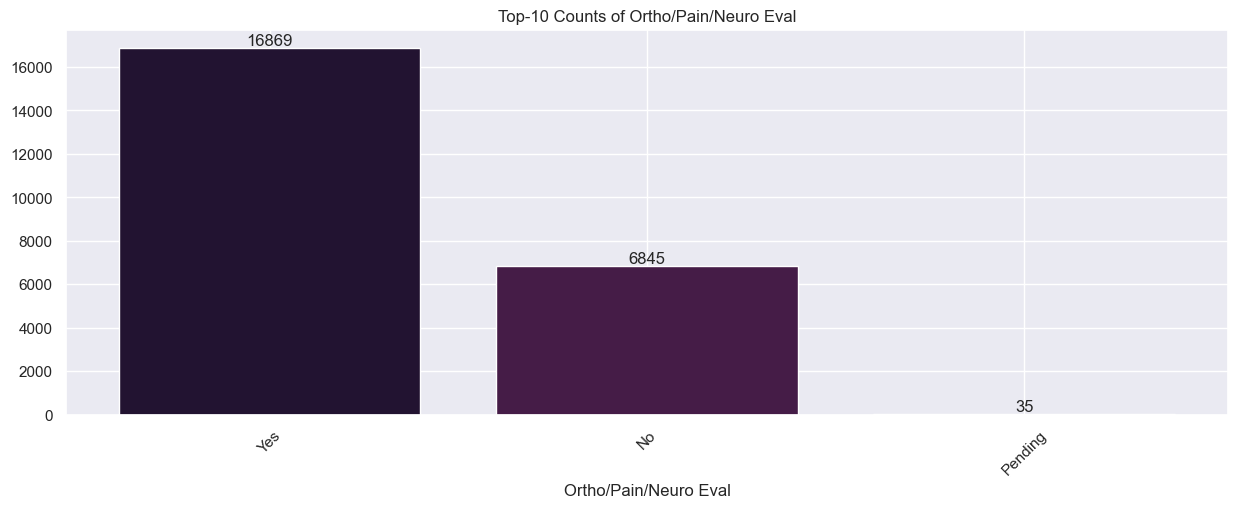

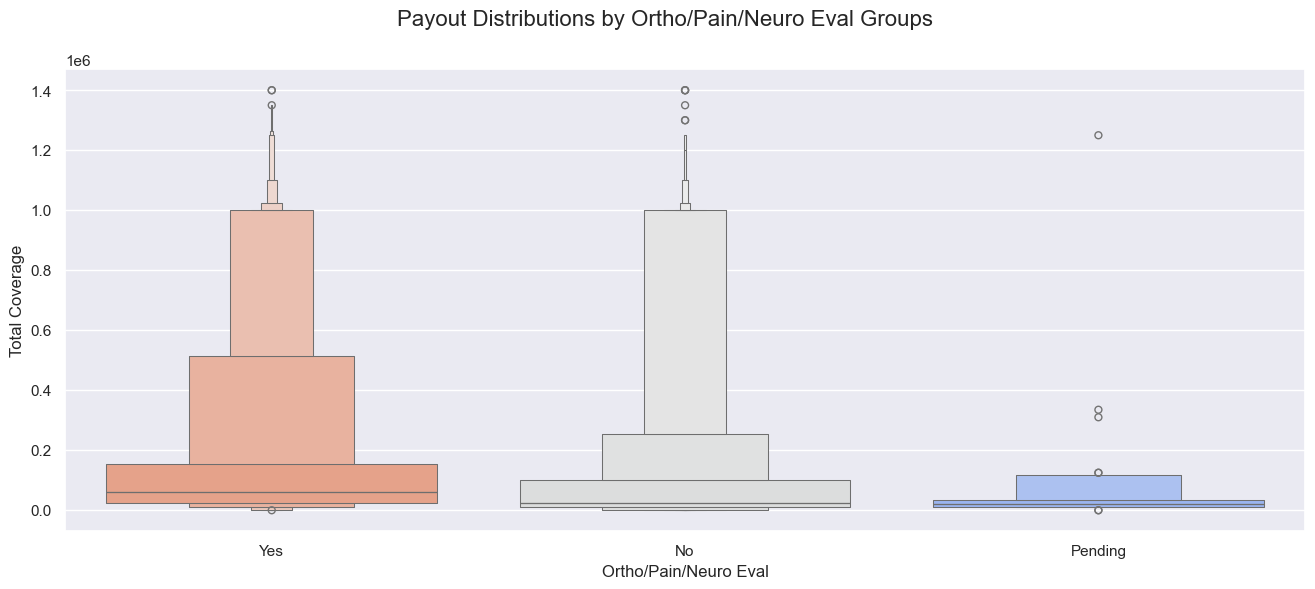

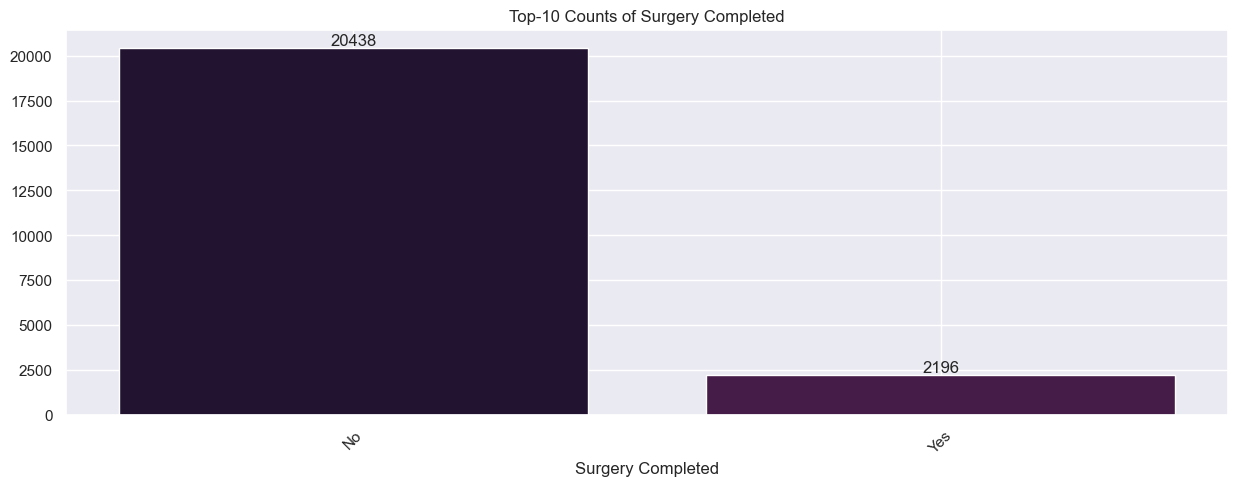

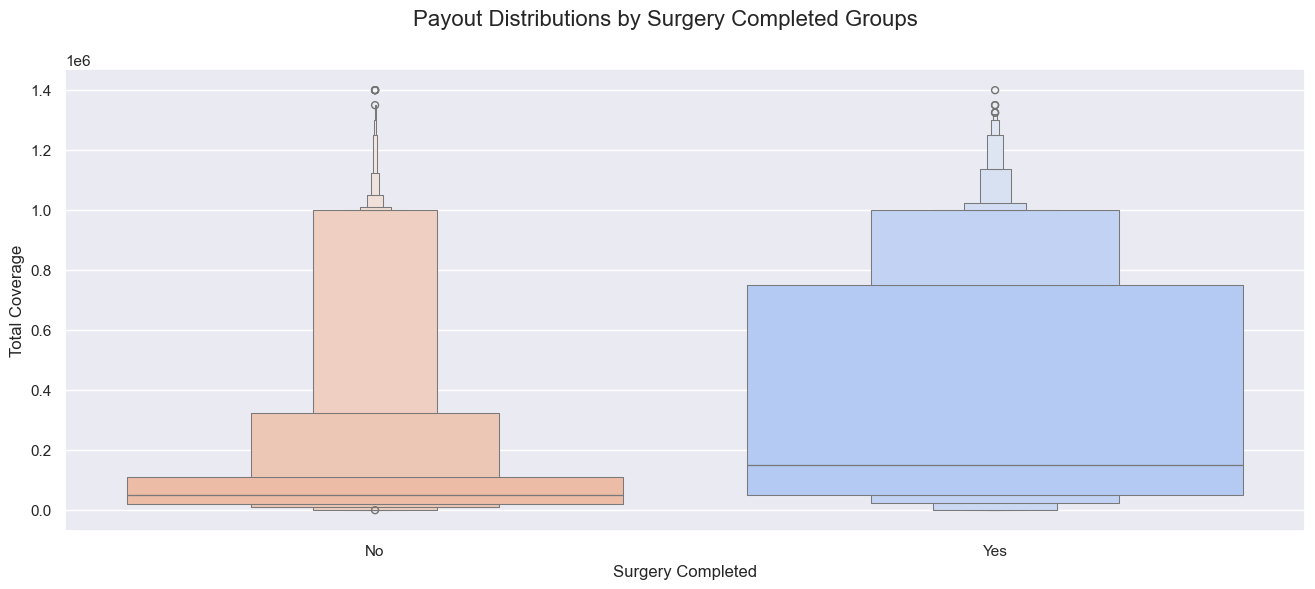

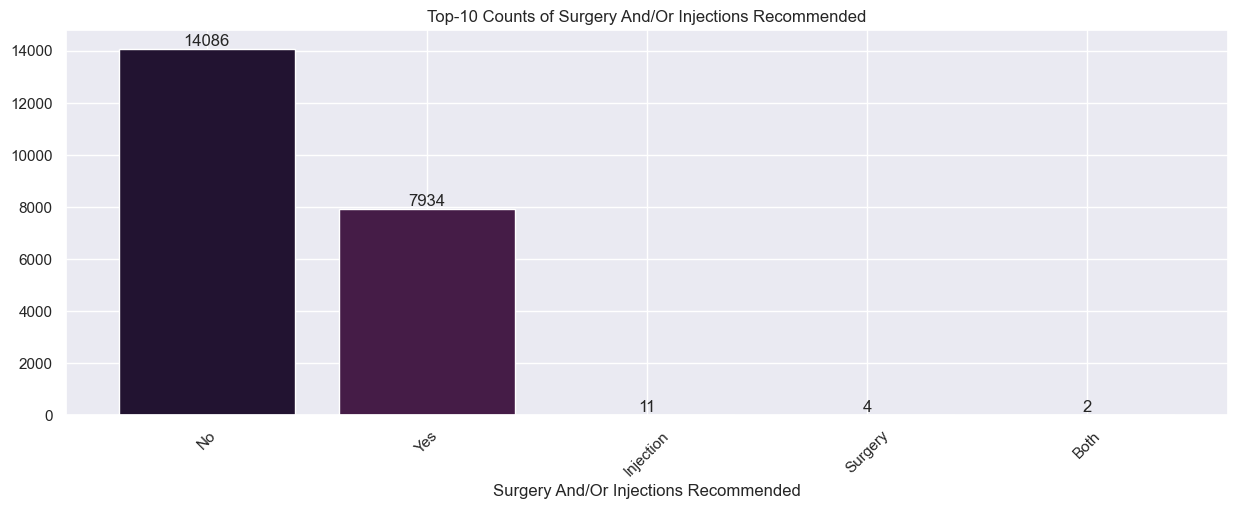

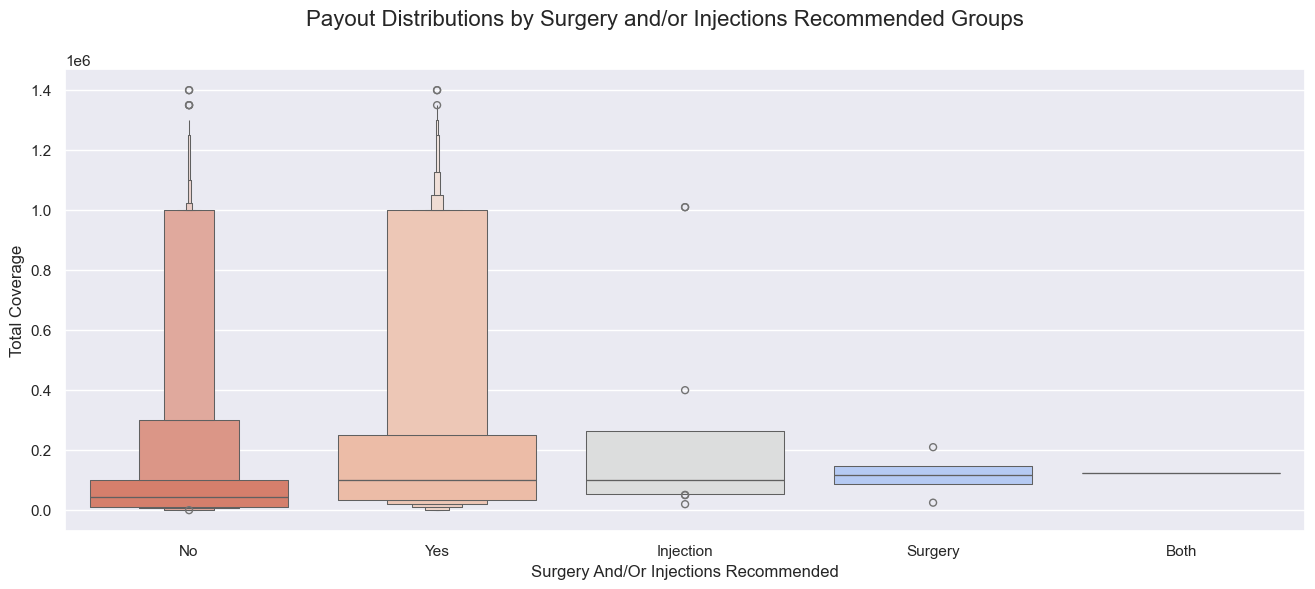

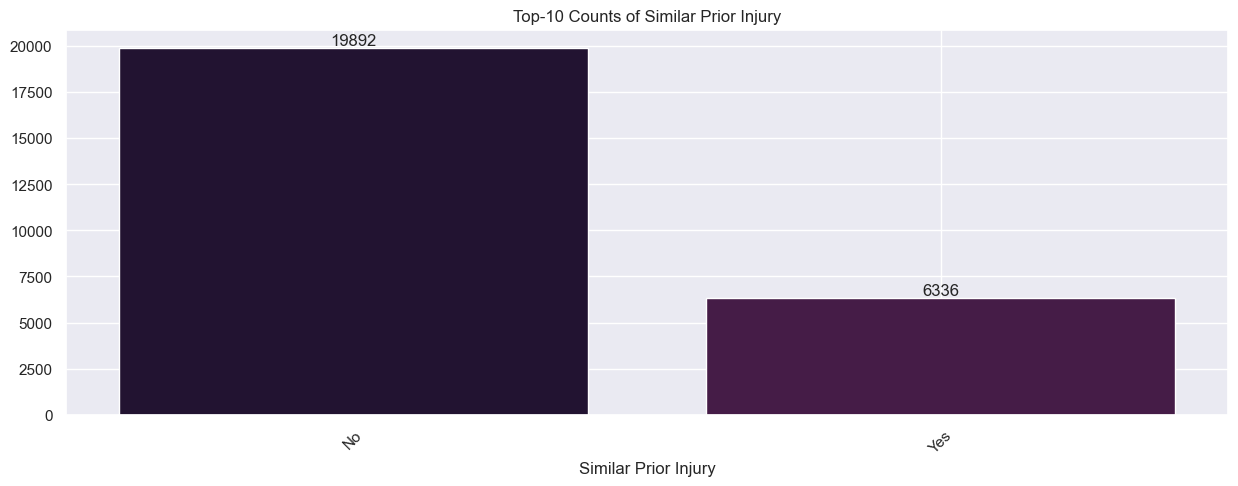

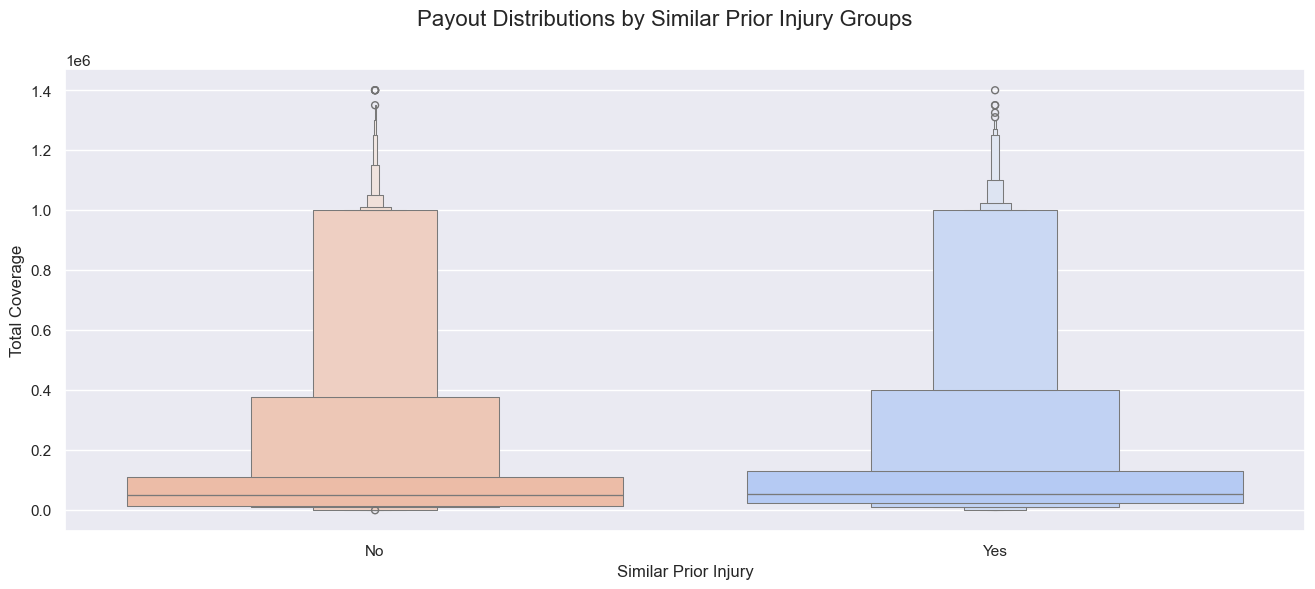

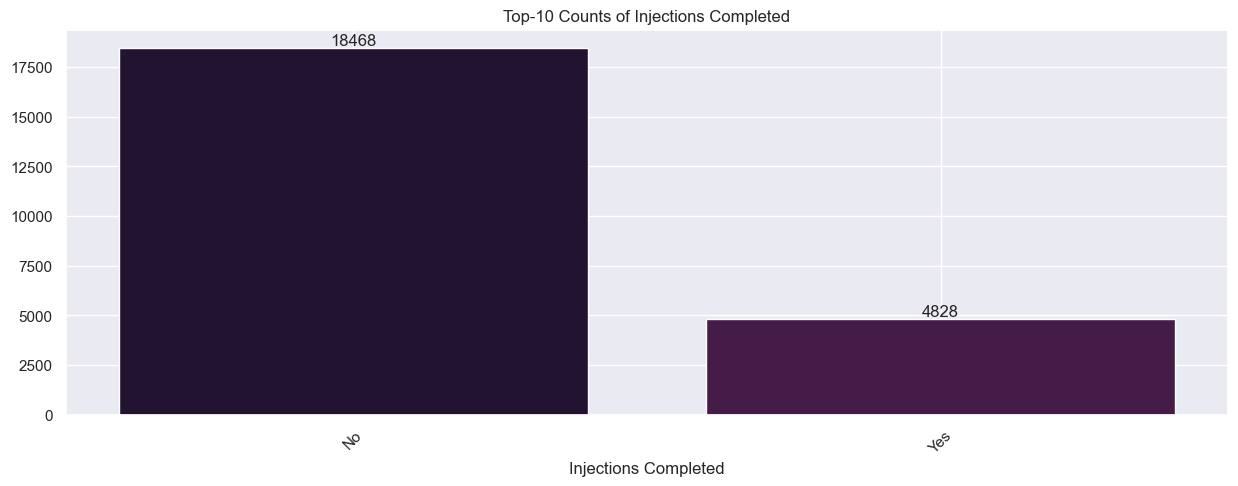

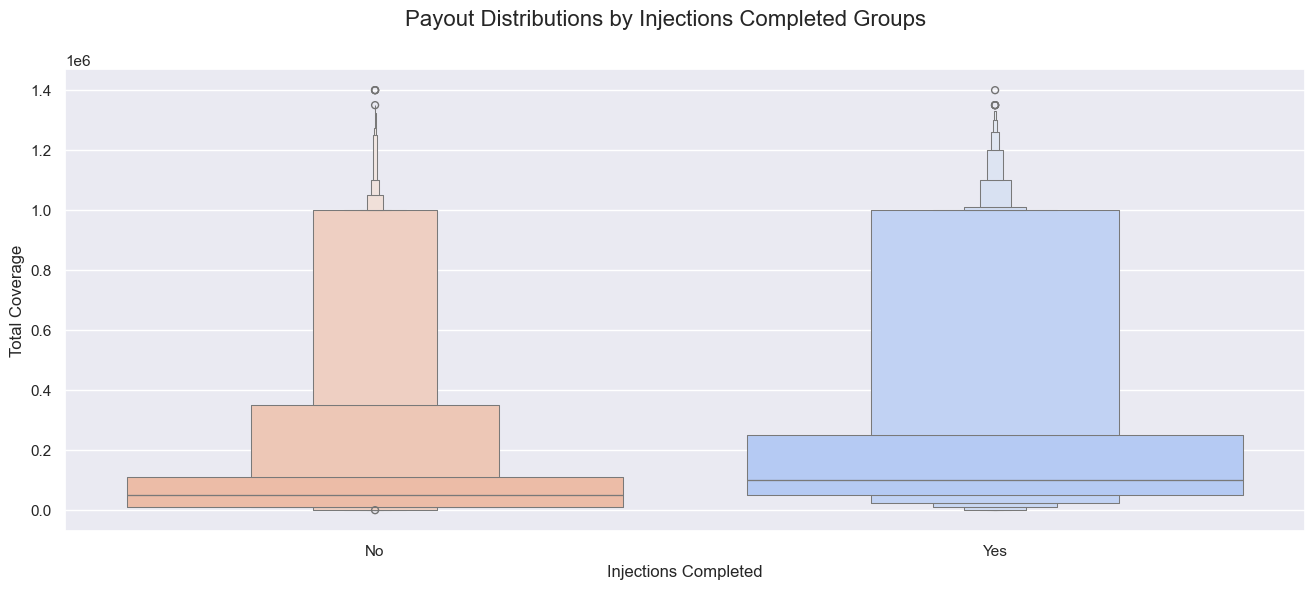

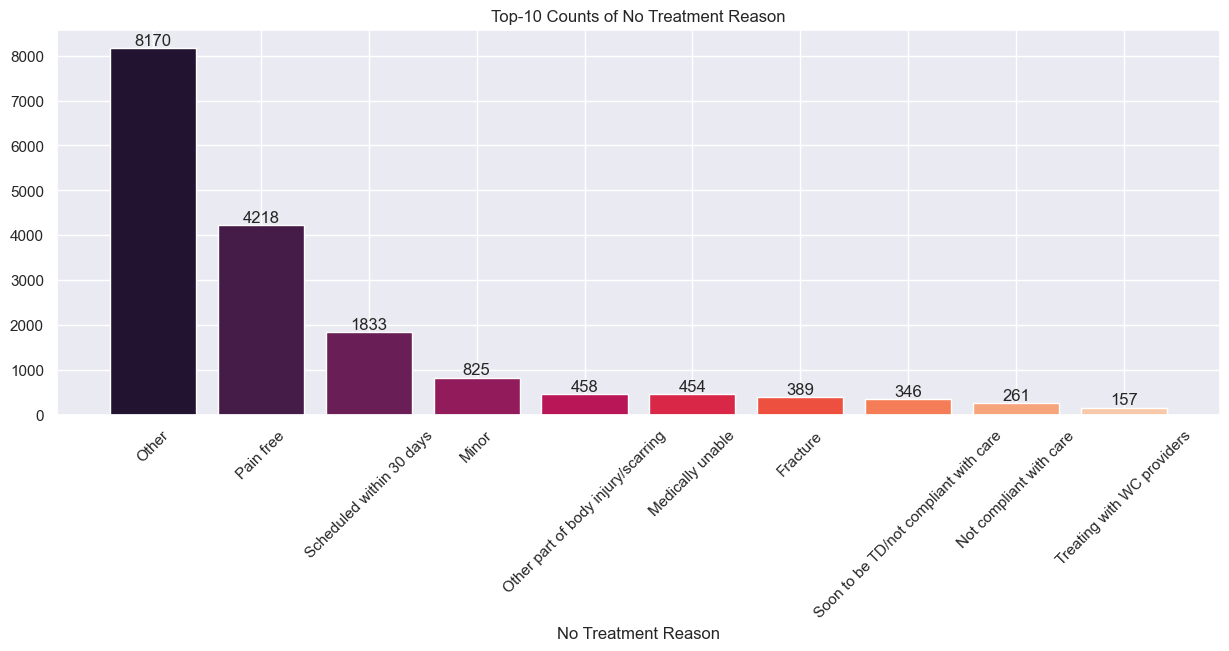

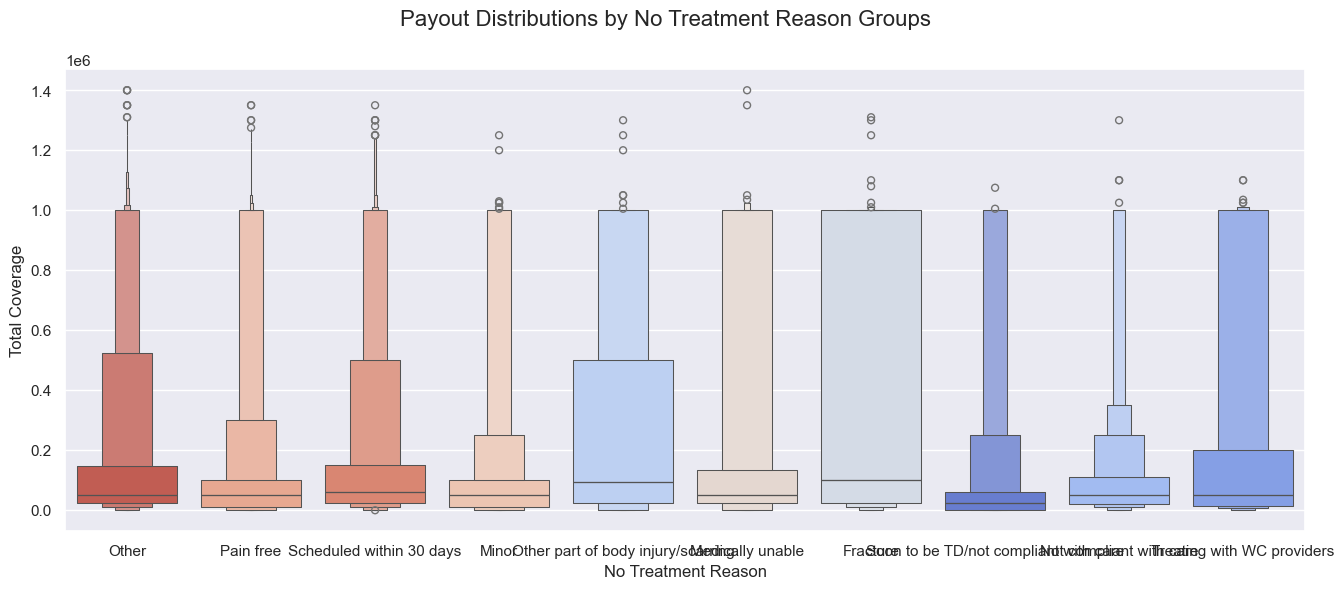

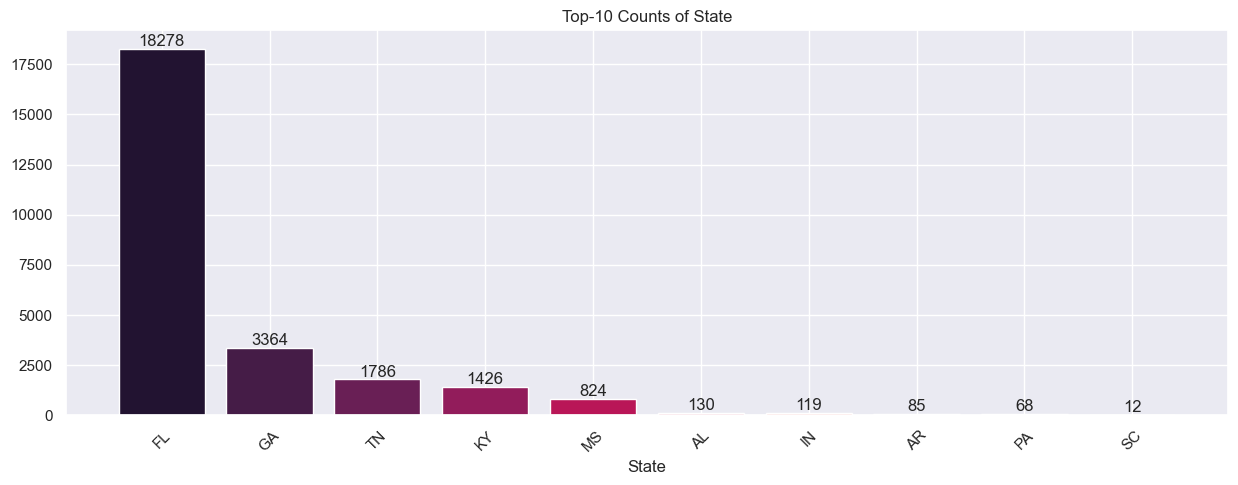

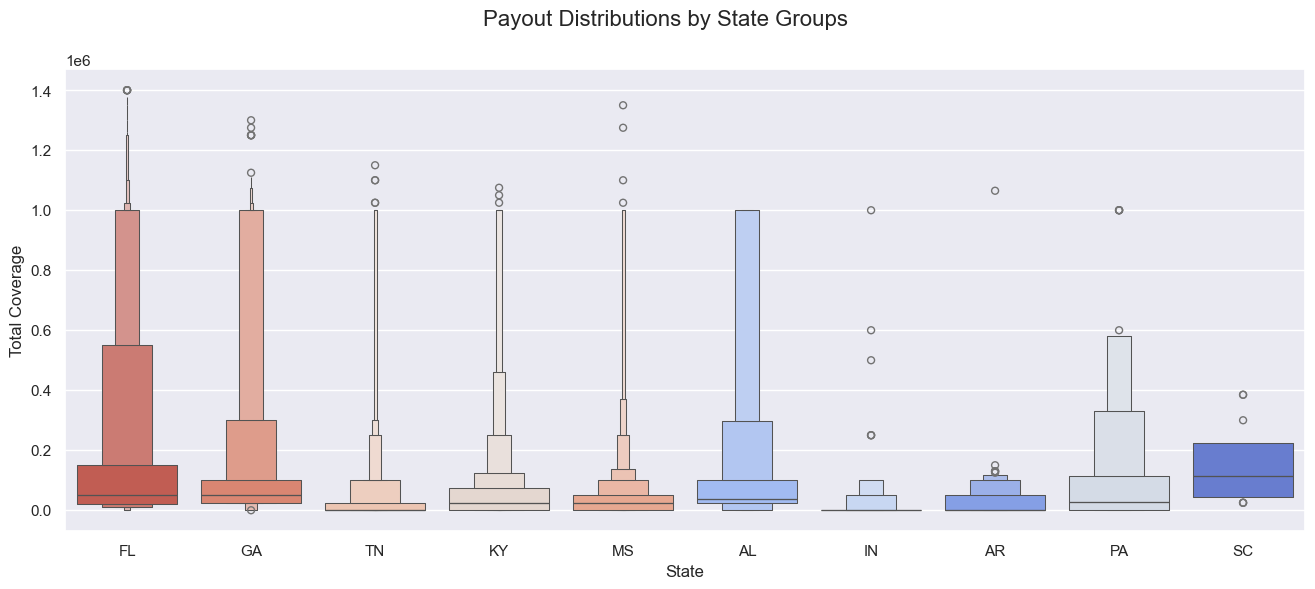

In [313]:
for col in df.select_dtypes(exclude=np.number).columns:
    plot_total_claim_by_group(col=col)

### Plotting all of the Categorical Features Proportions in the Data

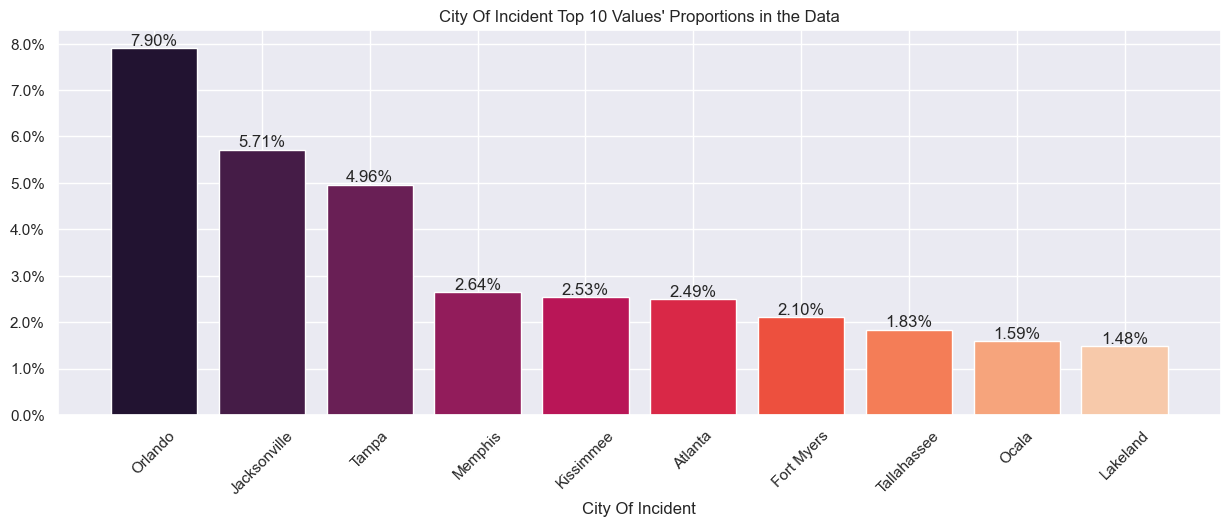

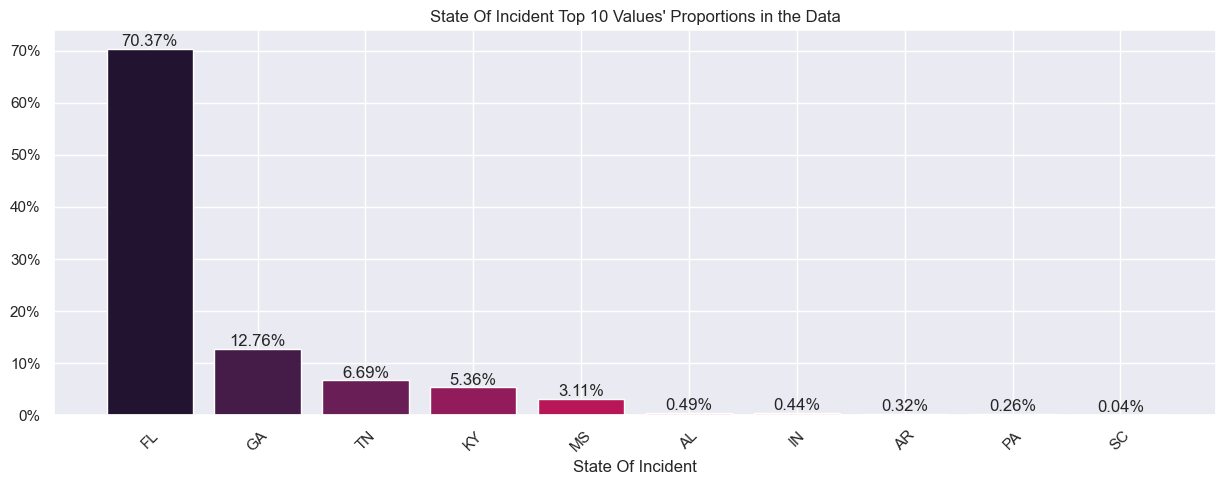

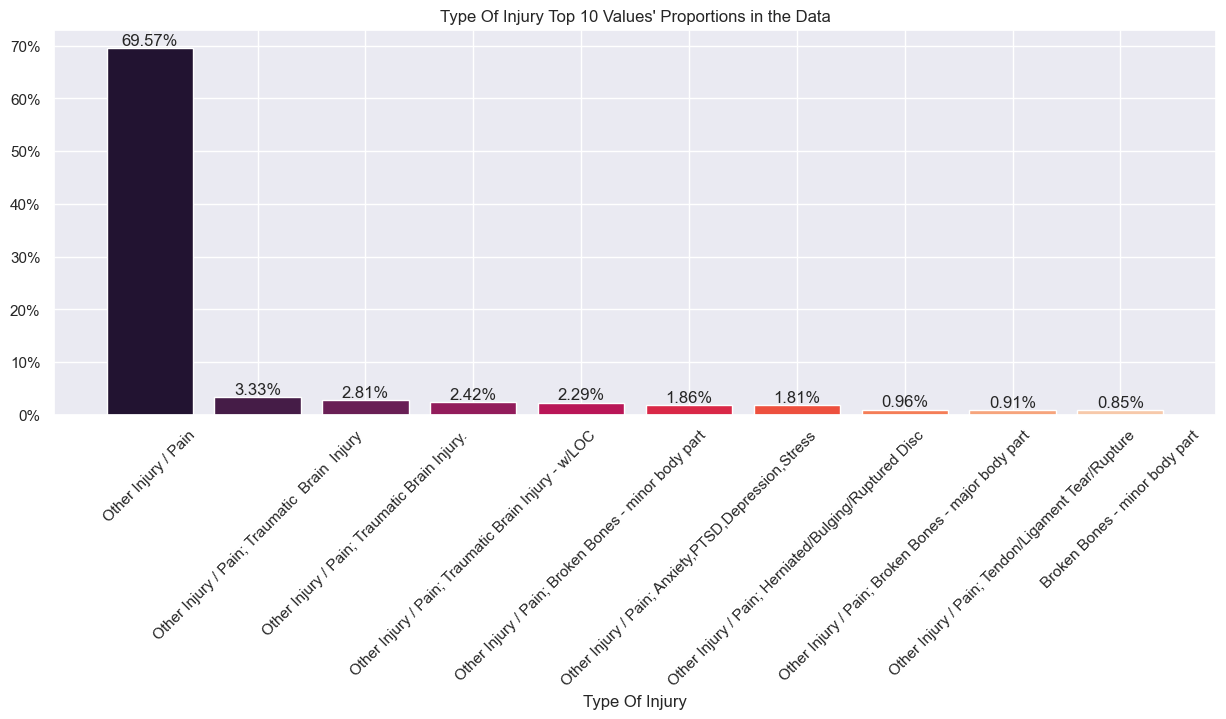

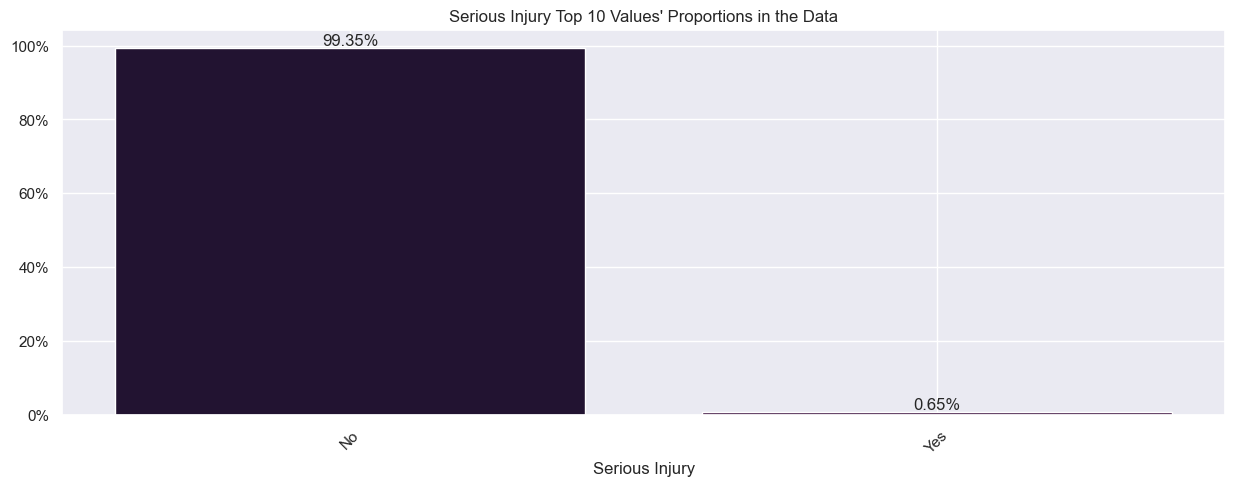

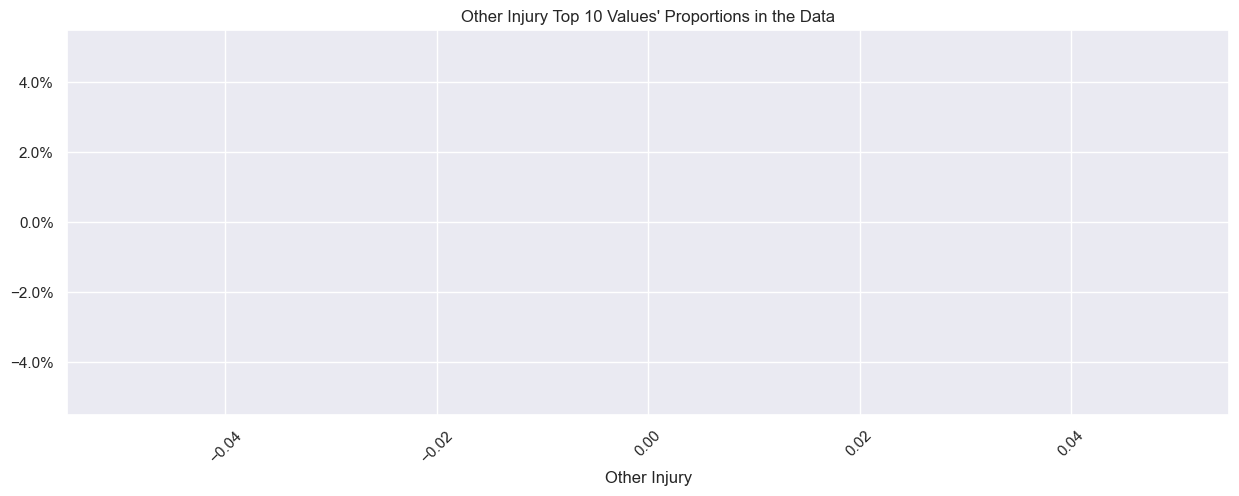

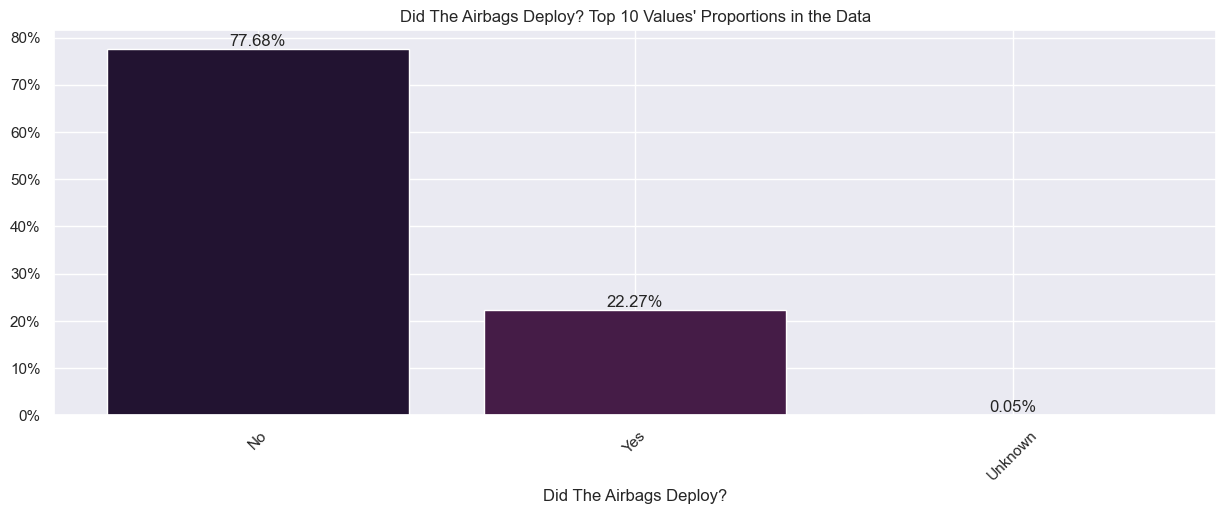

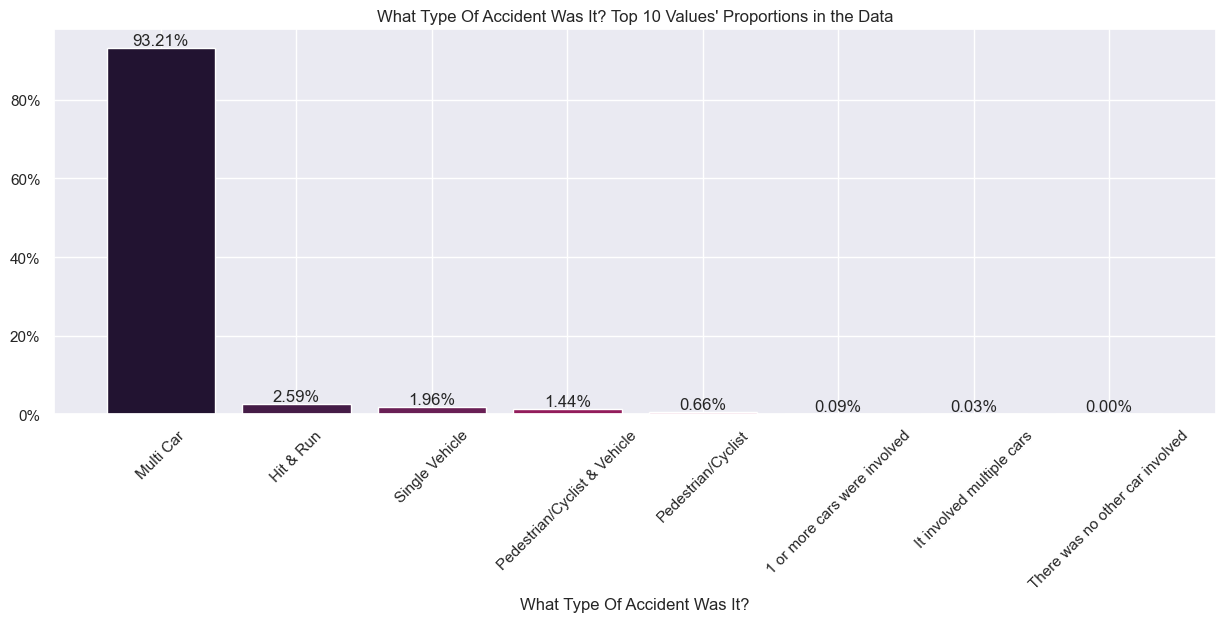

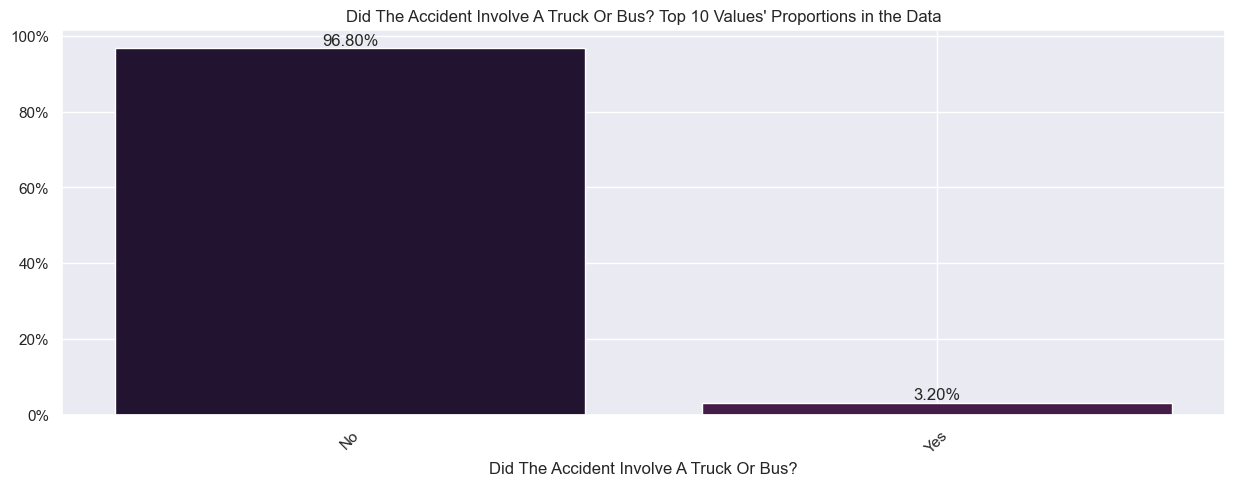

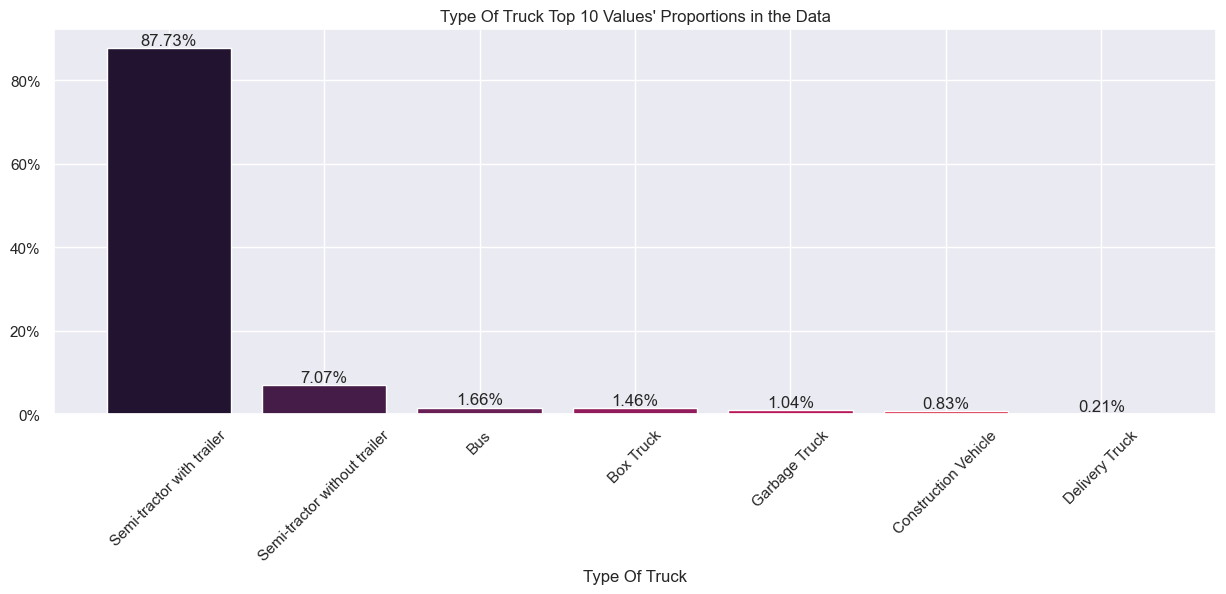

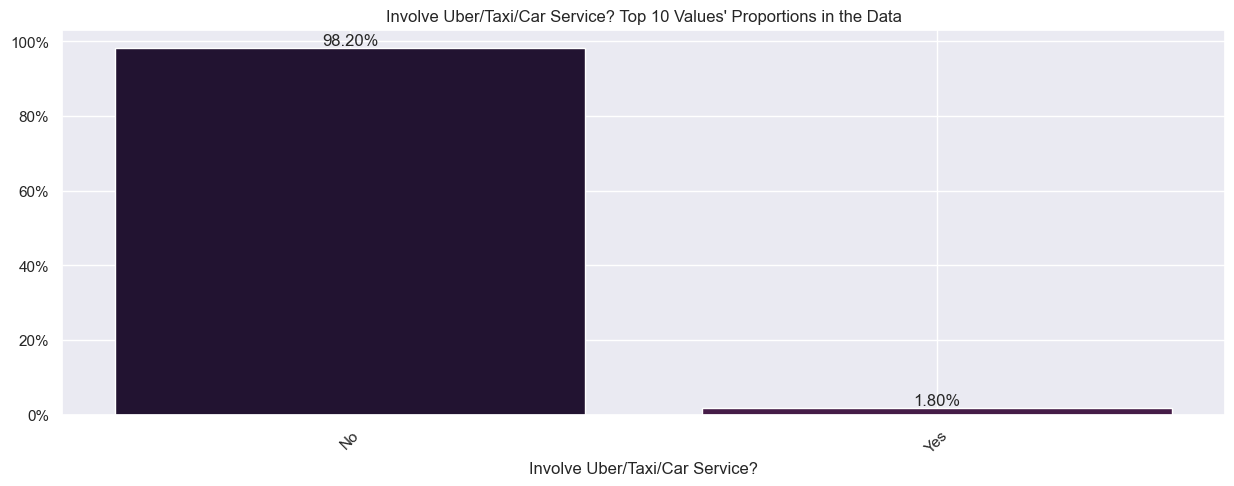

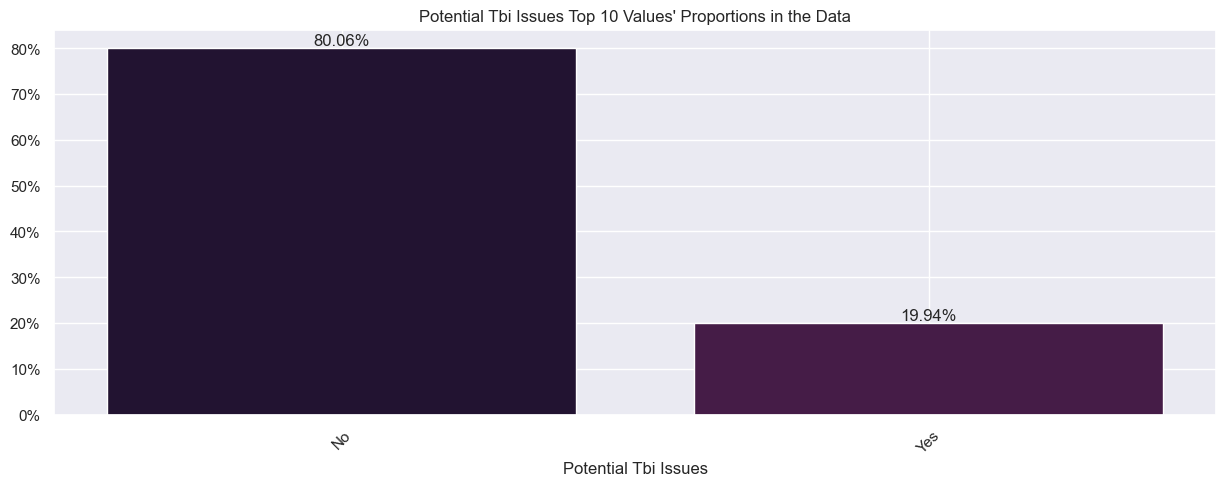

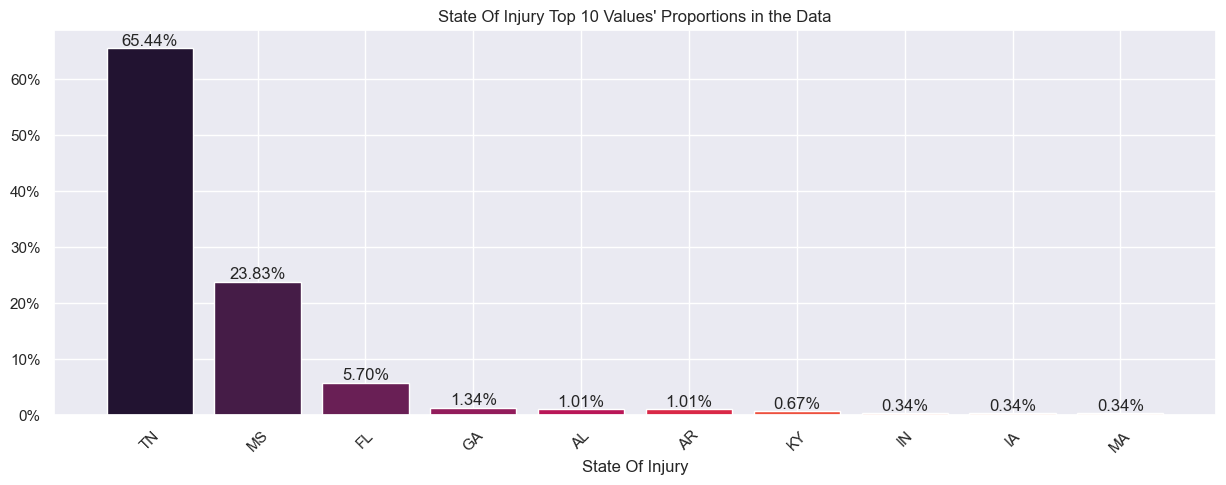

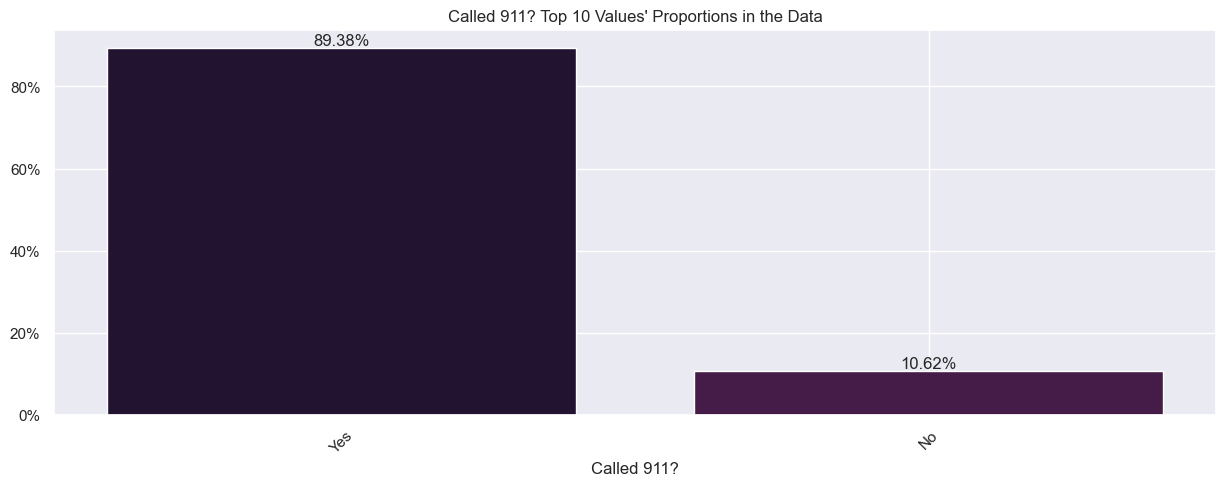

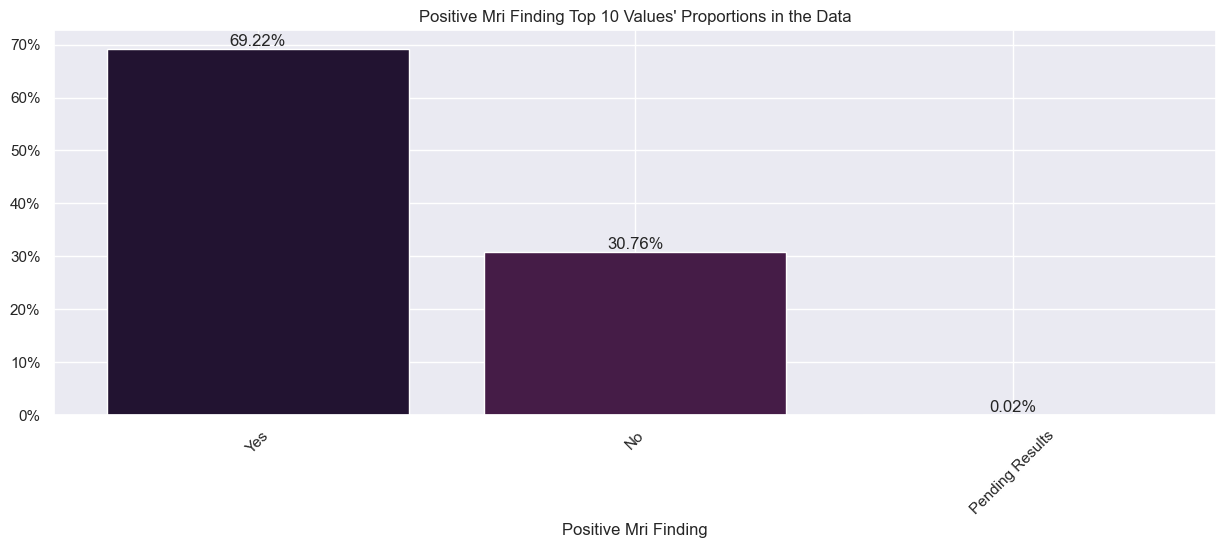

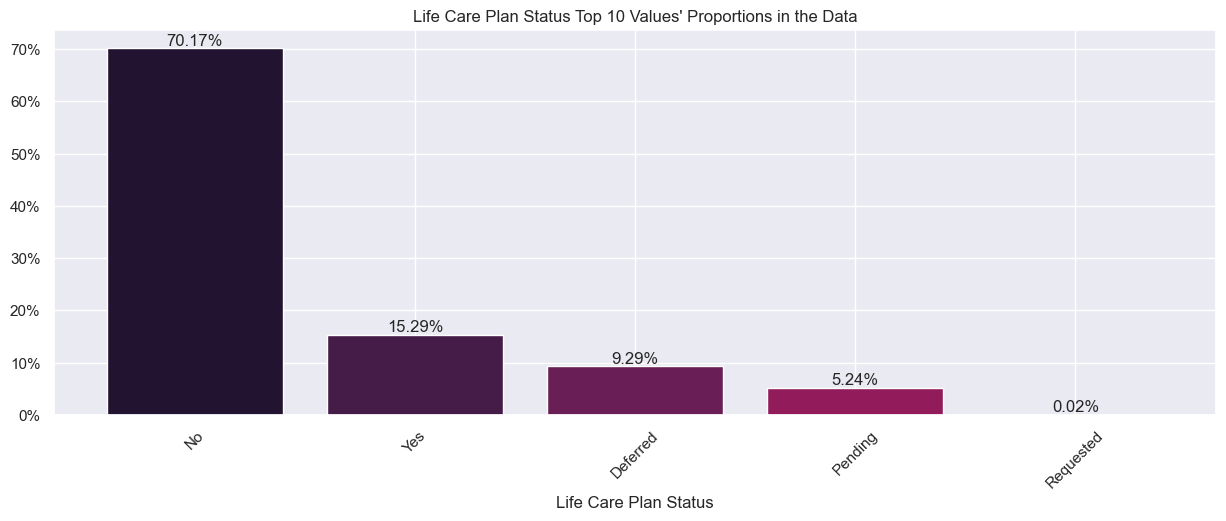

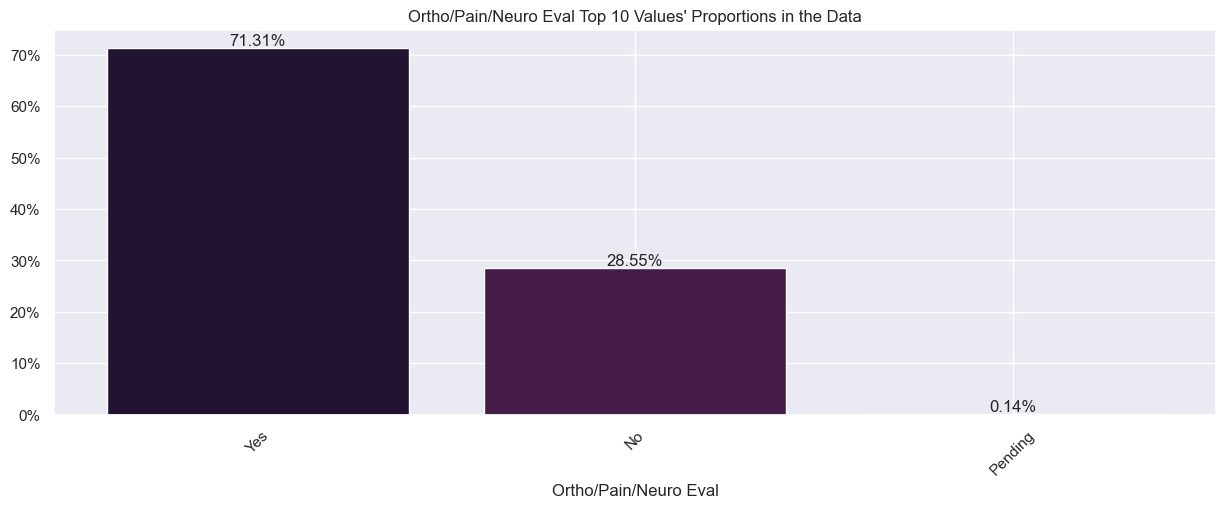

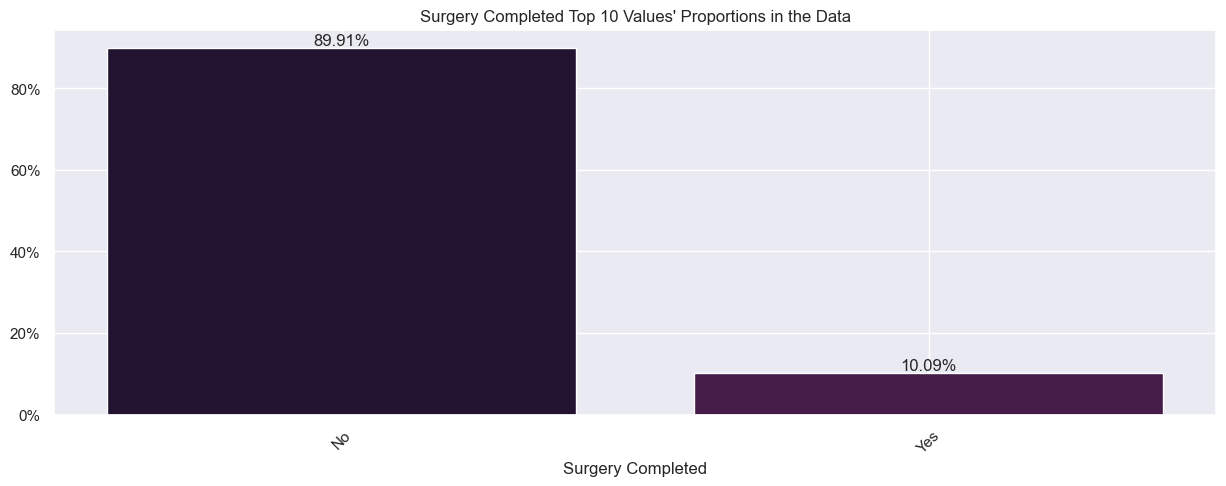

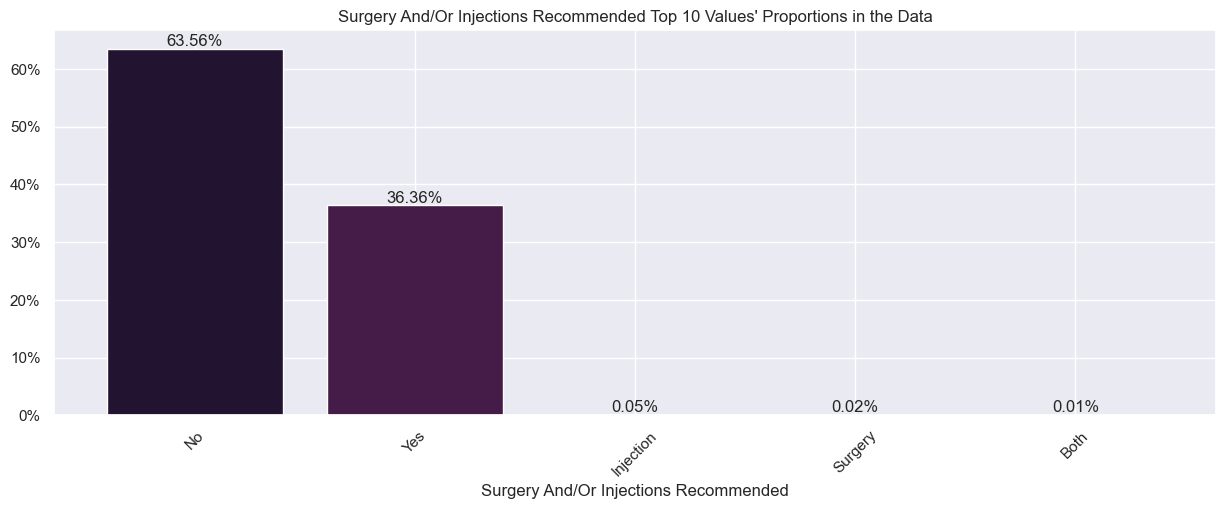

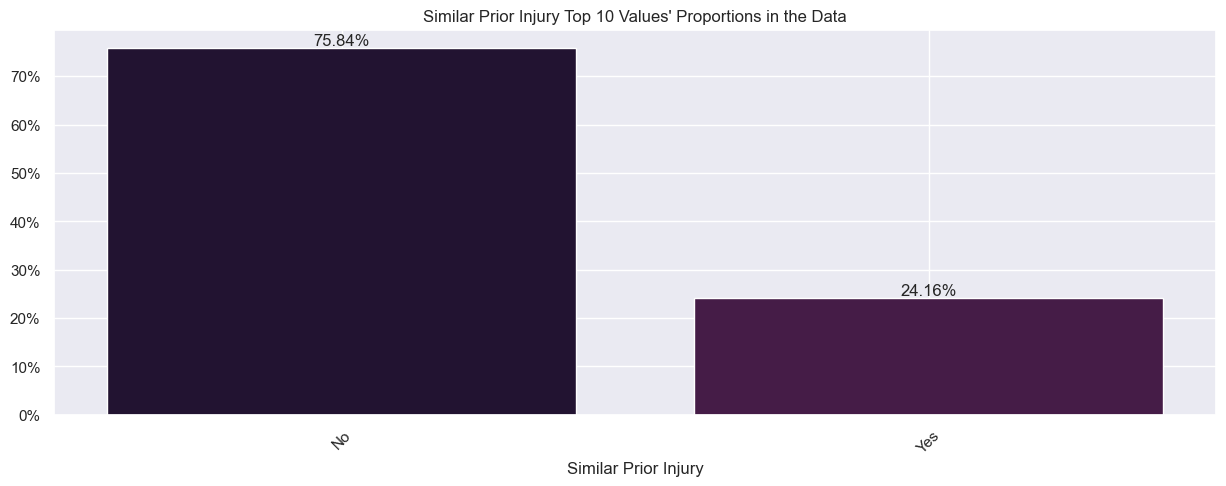

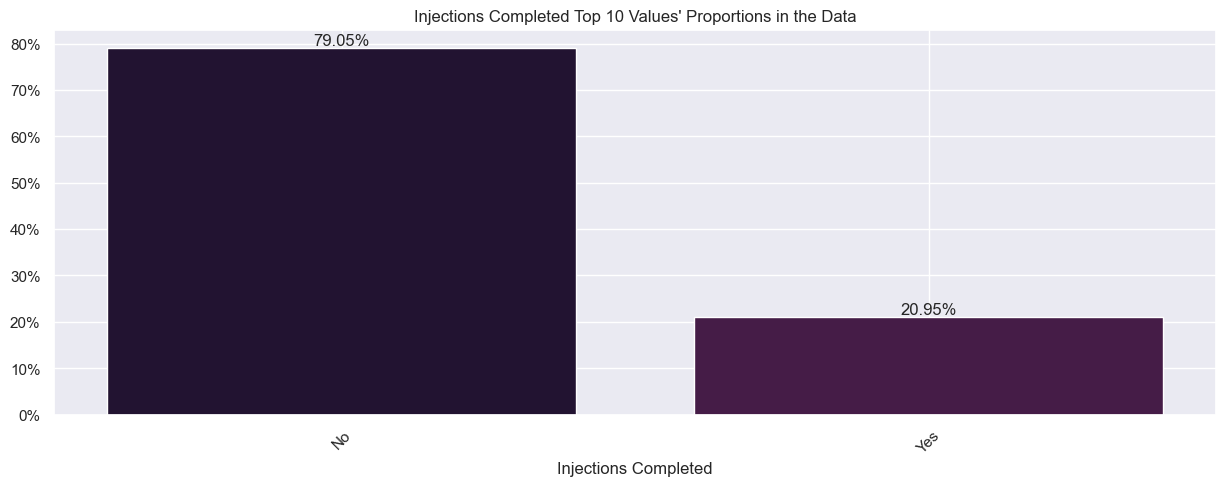

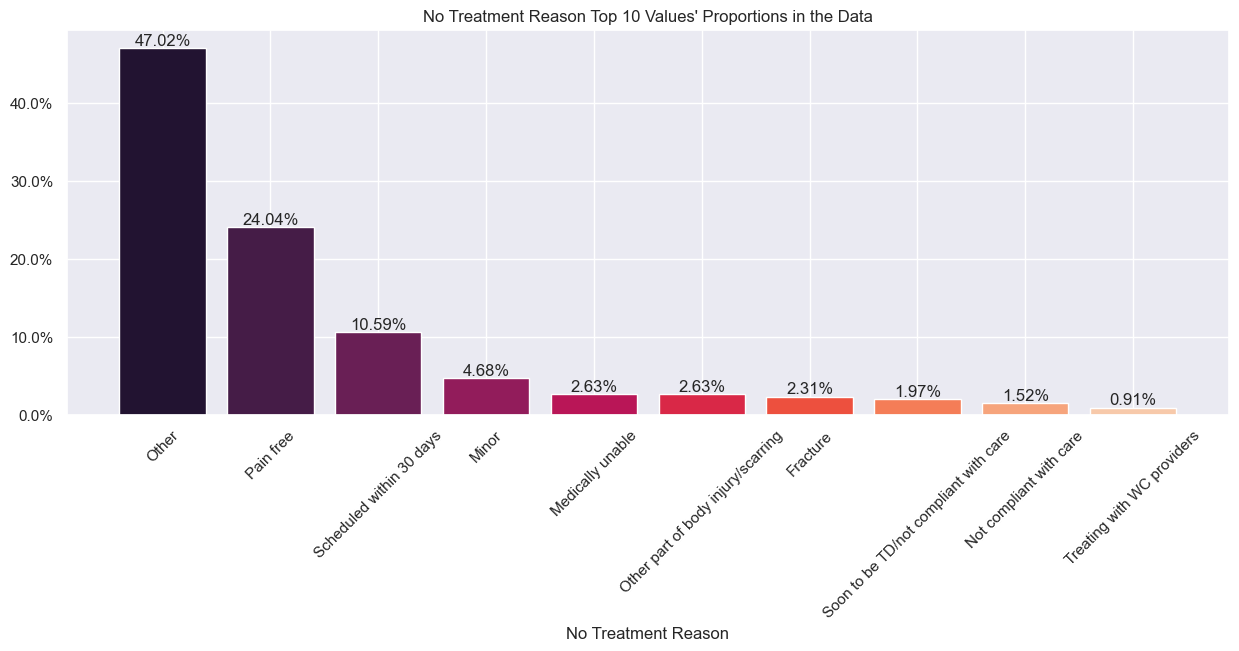

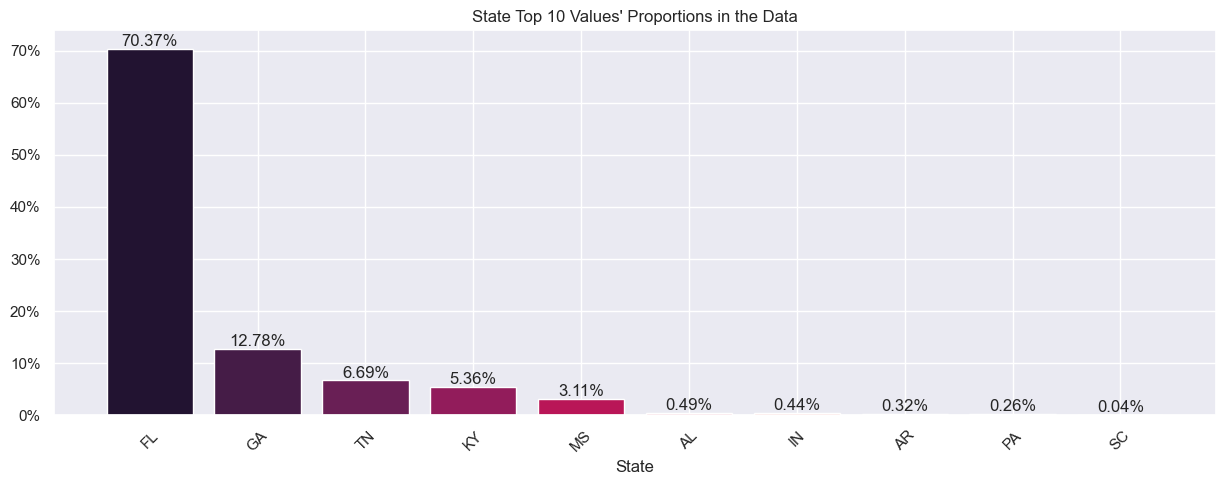

In [208]:
for col in df.select_dtypes(exclude=np.number).columns:
    plot_value_counts(df=df, col=col, title=f"{col.title()} Top 10 Values' Proportions in the Data", xlabel=f"{col.title()}", condition=True)

In [132]:
df[["Net Attorney Fee", "Total Bills", "Total Coverage"]]

Net Attorney Fee  Total Bills  Total Coverage
2              16666.67     30603.62         50000.0
3               9833.33     24253.94       3000000.0
6               2666.66     19342.00         50000.0
8              10000.00     14107.50         50000.0
9               3511.66     12445.88         50000.0
...                 ...          ...             ...
56278           3333.33     33036.25         60000.0
56280          22500.00     23539.00             0.0
56282           6666.67      5600.00       1000000.0
56283           6666.66     20475.06         10000.0
56286          10000.00     38603.04         80000.0

[27380 rows x 3 columns]

In [80]:
pd.read_csv("/Users/samalainabayeva/Documents/Omdena/export.csv")

path                  name  \
0  dbfs:/FileStore/tables/dgshzbe11508270992746/i...  insurance_claims.csv   

     size  
0  266964